<a href="https://colab.research.google.com/github/lamiaakhairyibrahim/ITI_training/blob/main/DBSCAN_Class_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_score

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

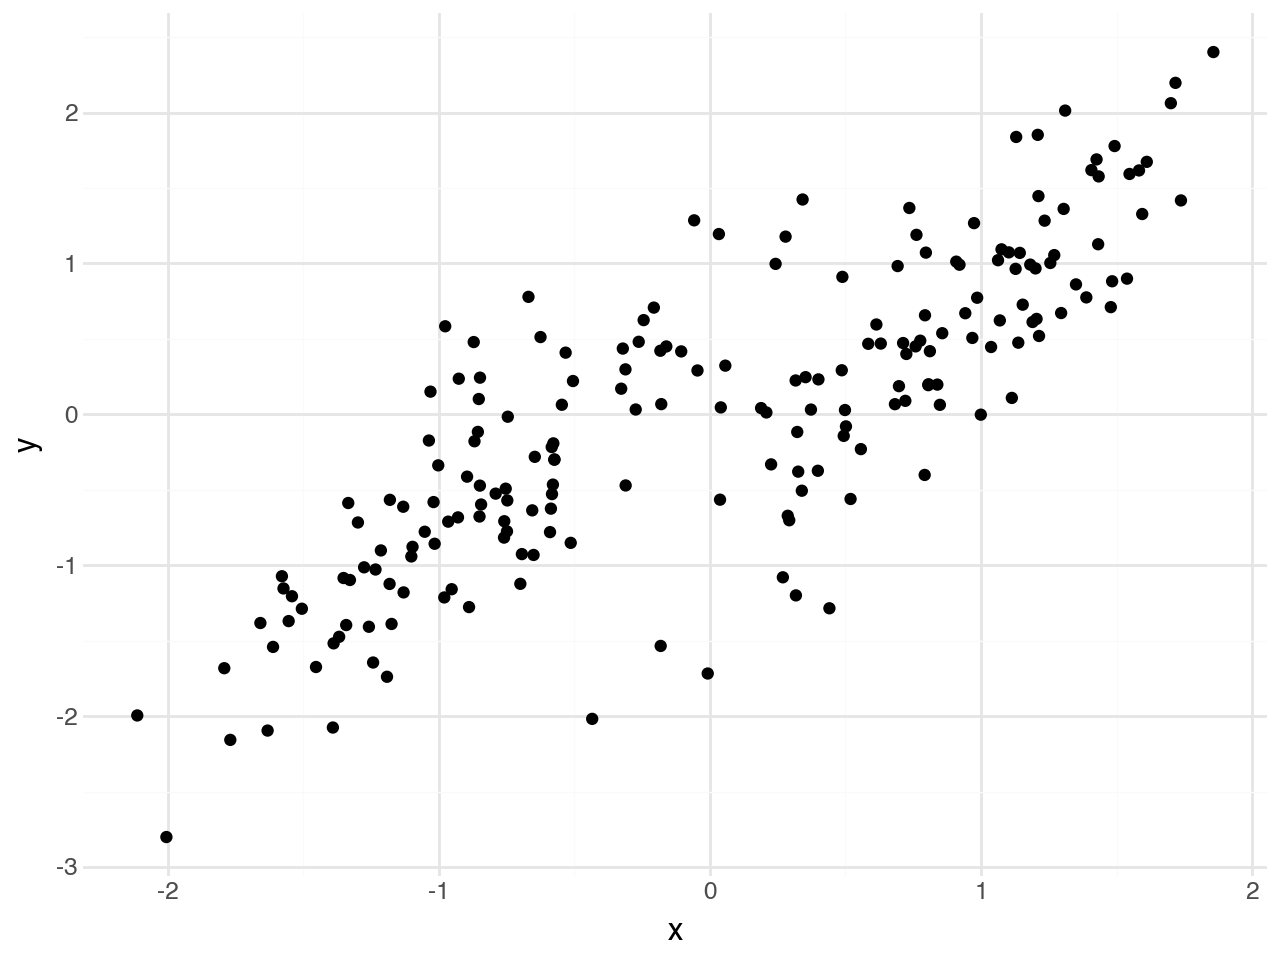

In [78]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

z = StandardScaler()
d1[["x","y"]] = z.fit_transform(d1)

ggplot(d1, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

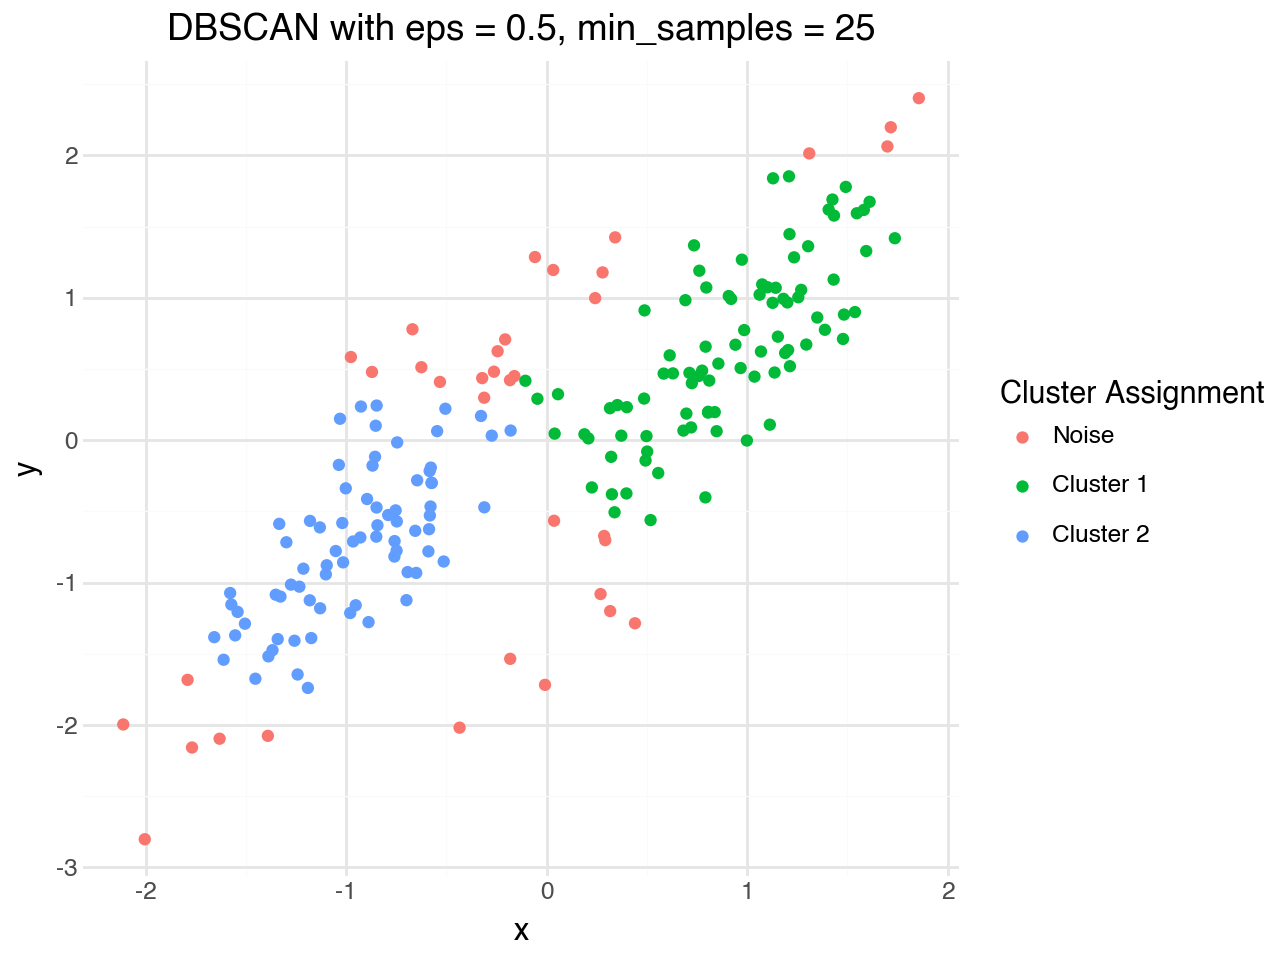

In [79]:
# dbscan and plot
# eps = 0.5, min_samples = 25
db1 = DBSCAN(eps = 0.5, min_samples = 25).fit(d1)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

d1["assignments"] = db1.labels_

(ggplot(d1, aes(x = "x", y = "y", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [80]:
# grab only clustered data points
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["x","y"]], d1_clustered["assignments"])

0.6169609560667532

In [81]:
# overall
silhouette_score(d1[["x","y"]], d1["assignments"])

0.39760284702143056

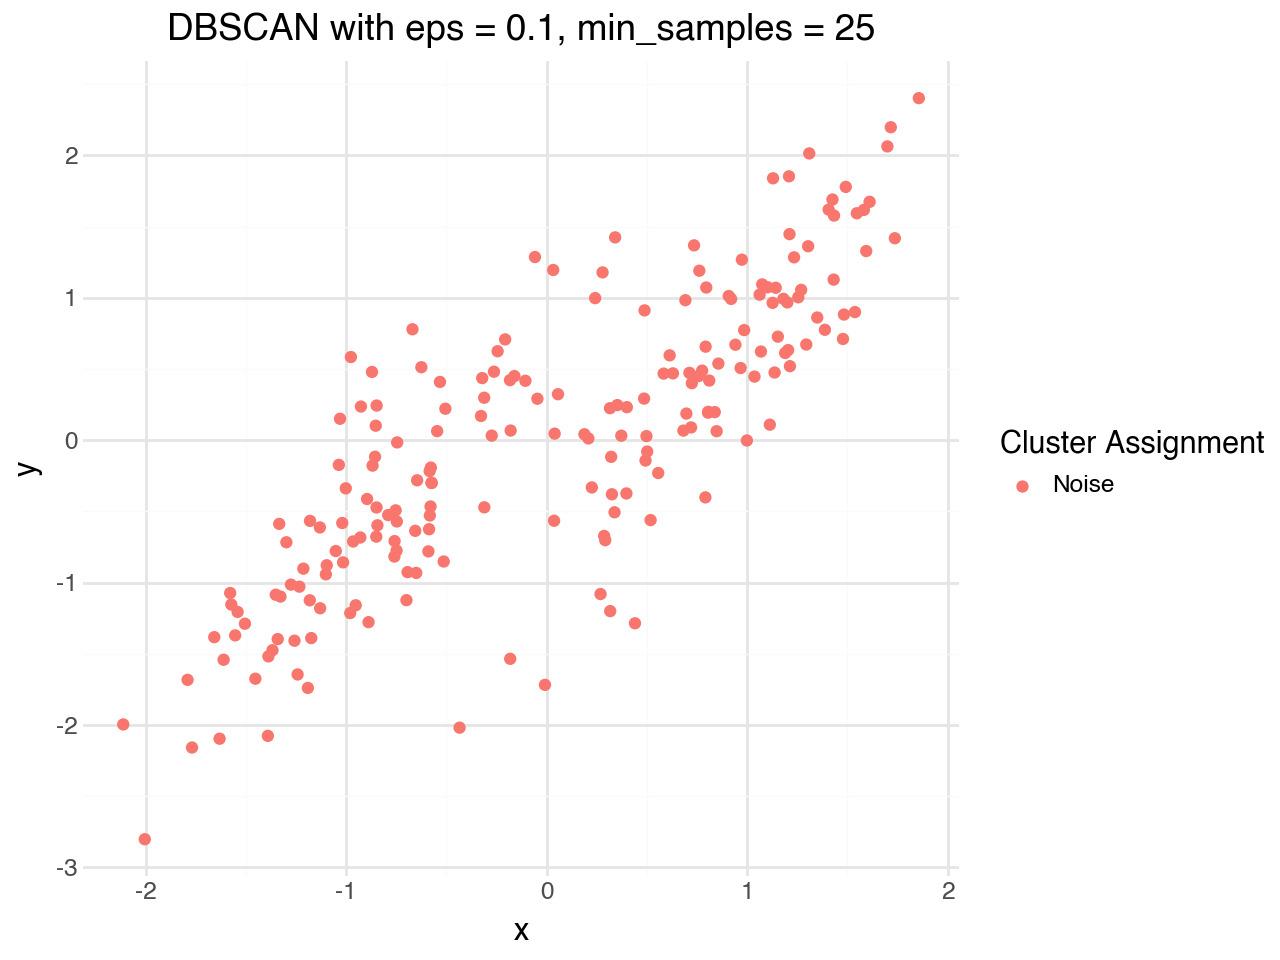

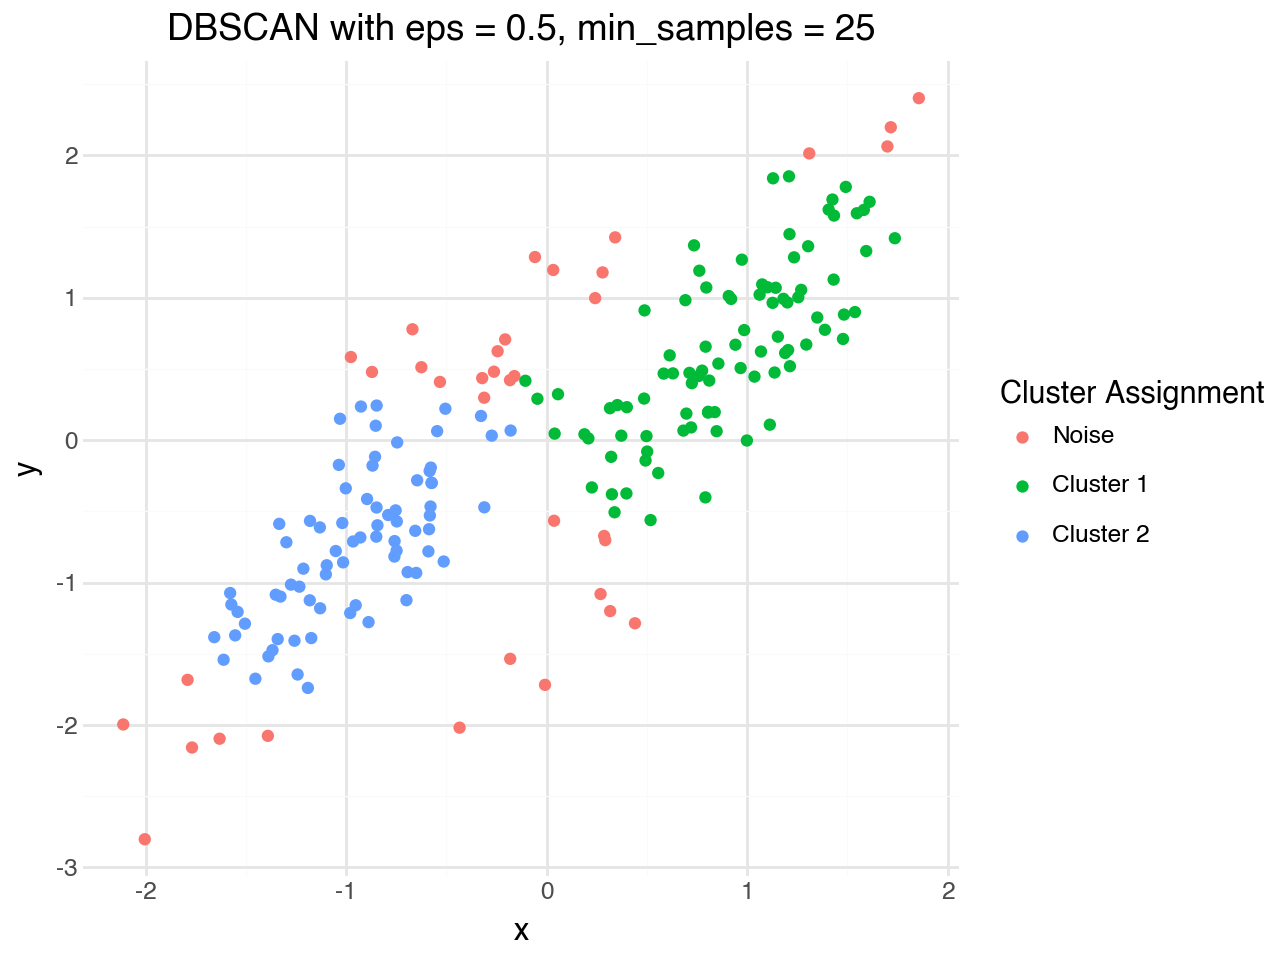

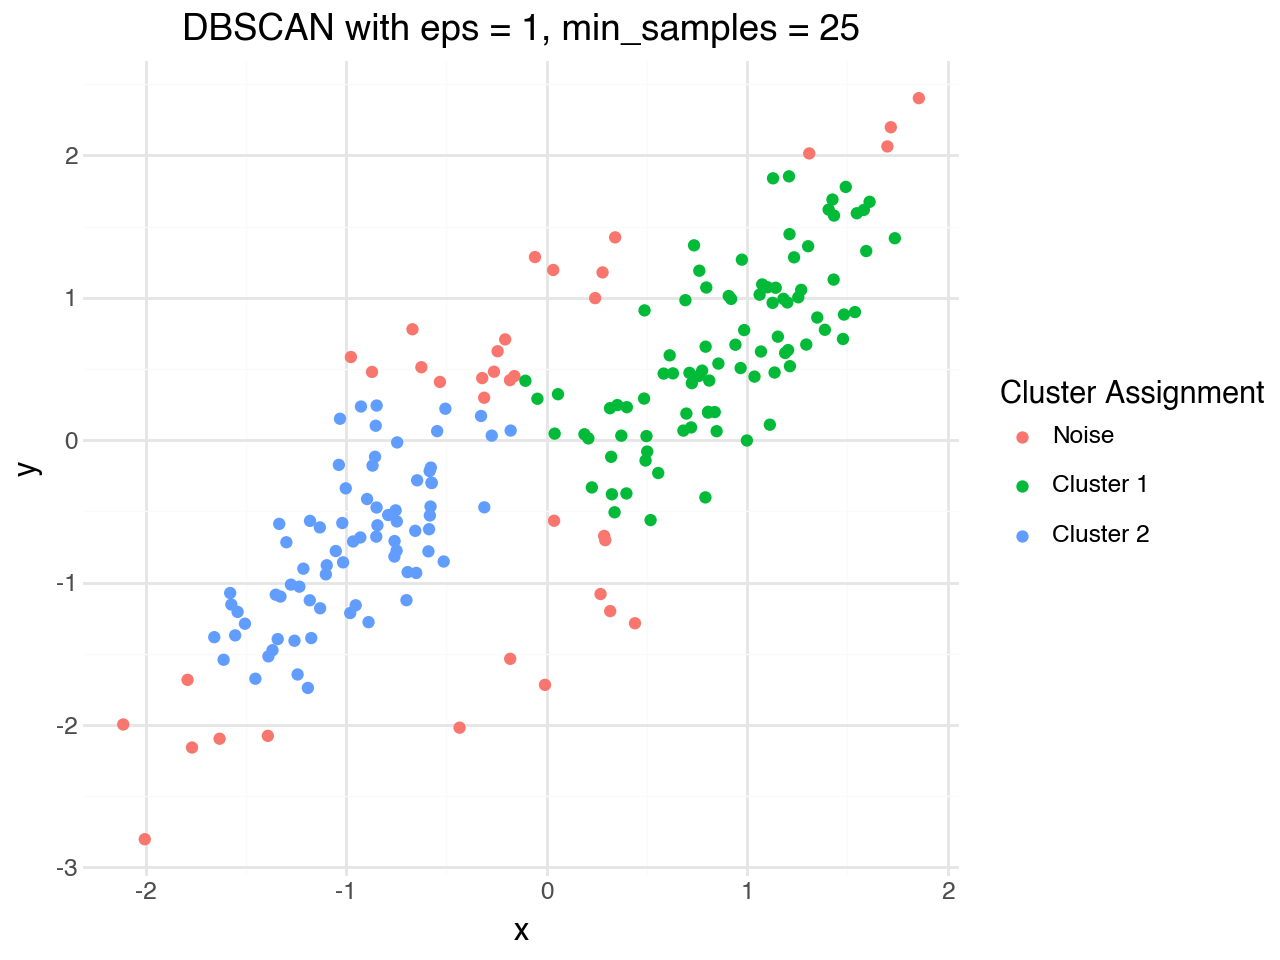

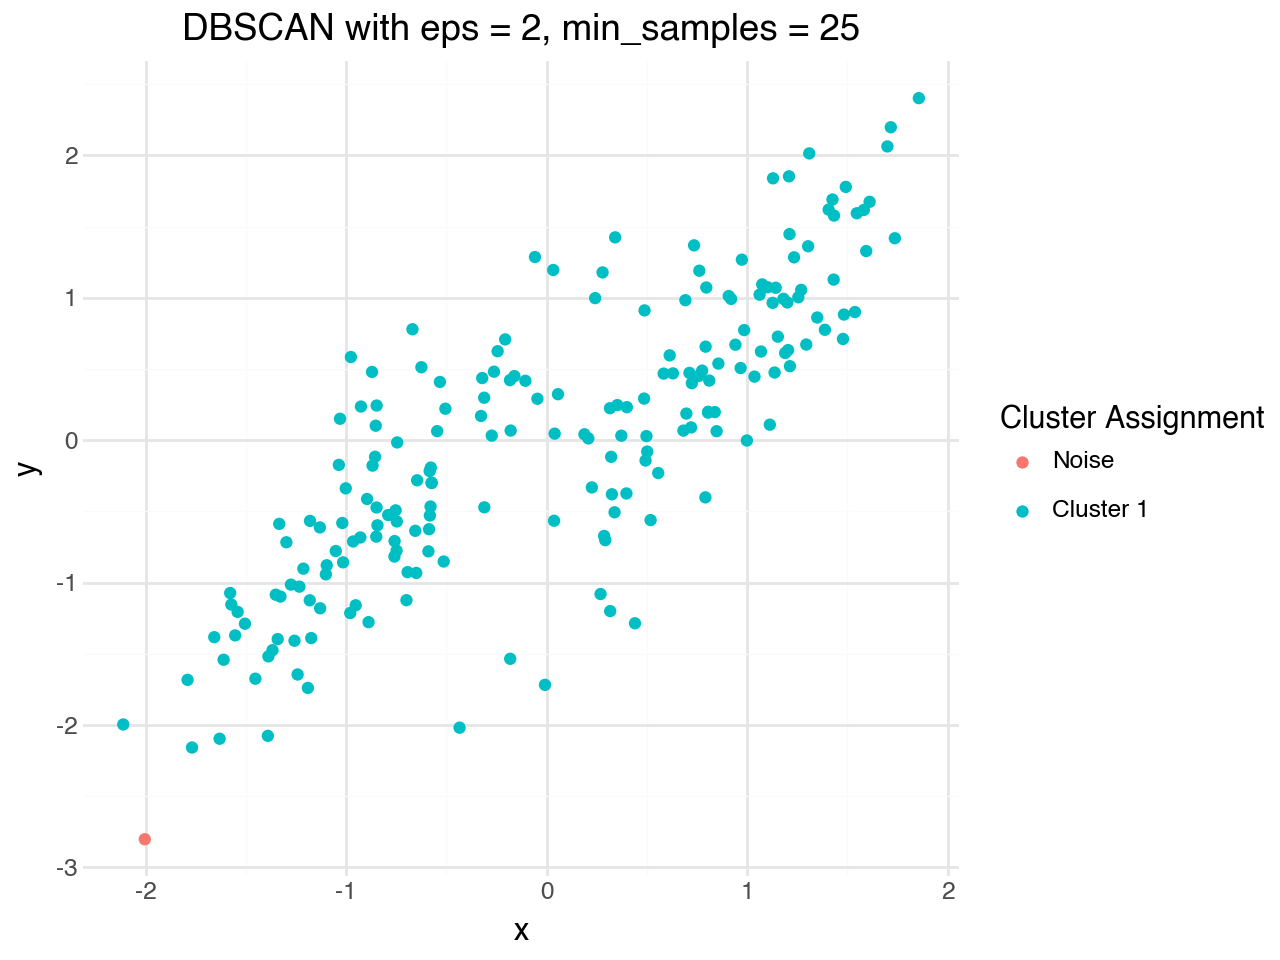

In [82]:
from IPython.display import display

eps = [0.1, 0.5, 1, 2]

for ep in eps:
    db1 = DBSCAN(eps = ep, min_samples = 25).fit(d1)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

    plot_df = d1.copy()
    plot_df["assignments"] = db1.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = {ep}, min_samples = 25"))

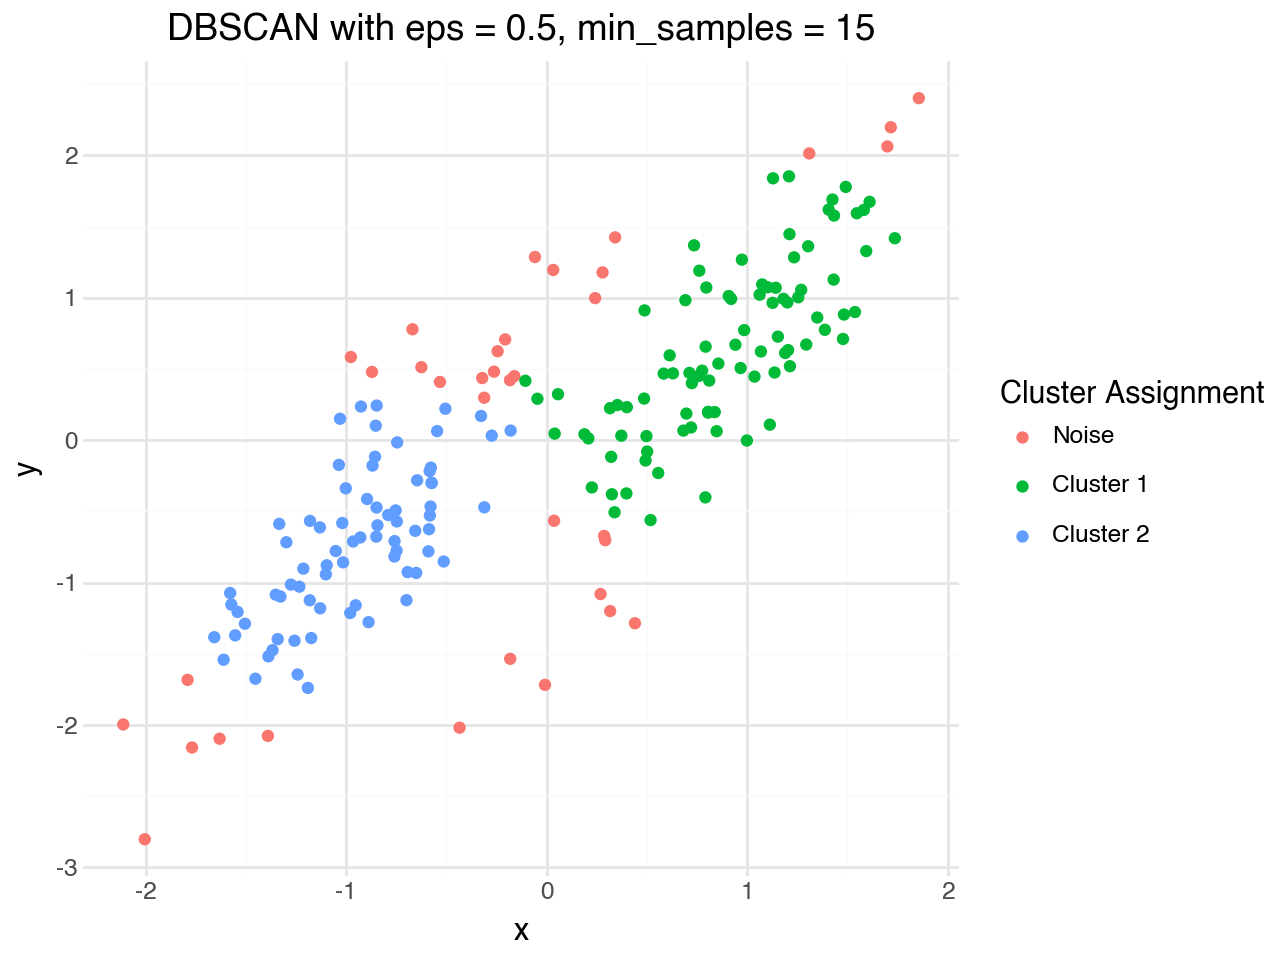

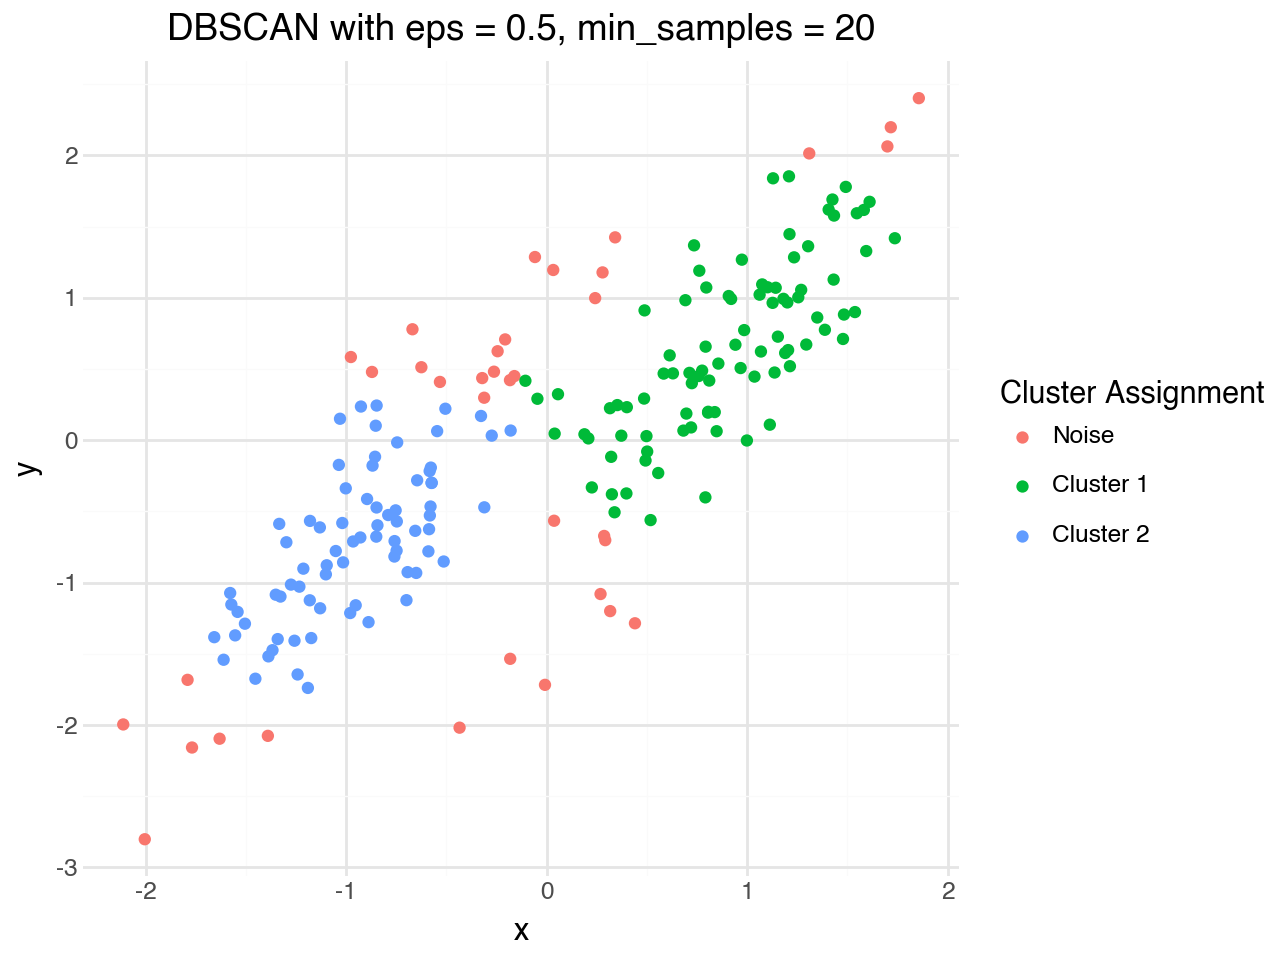

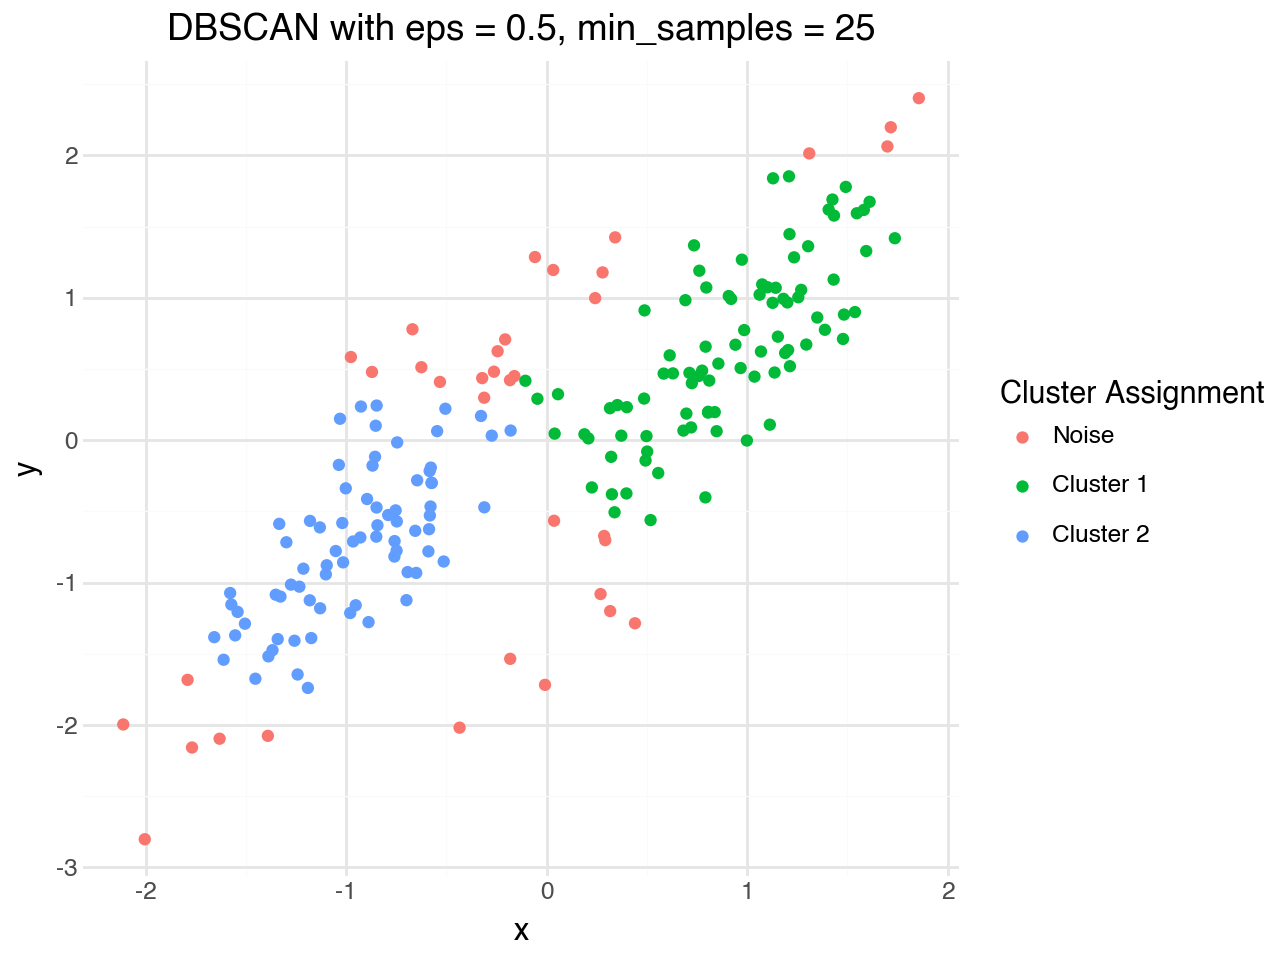

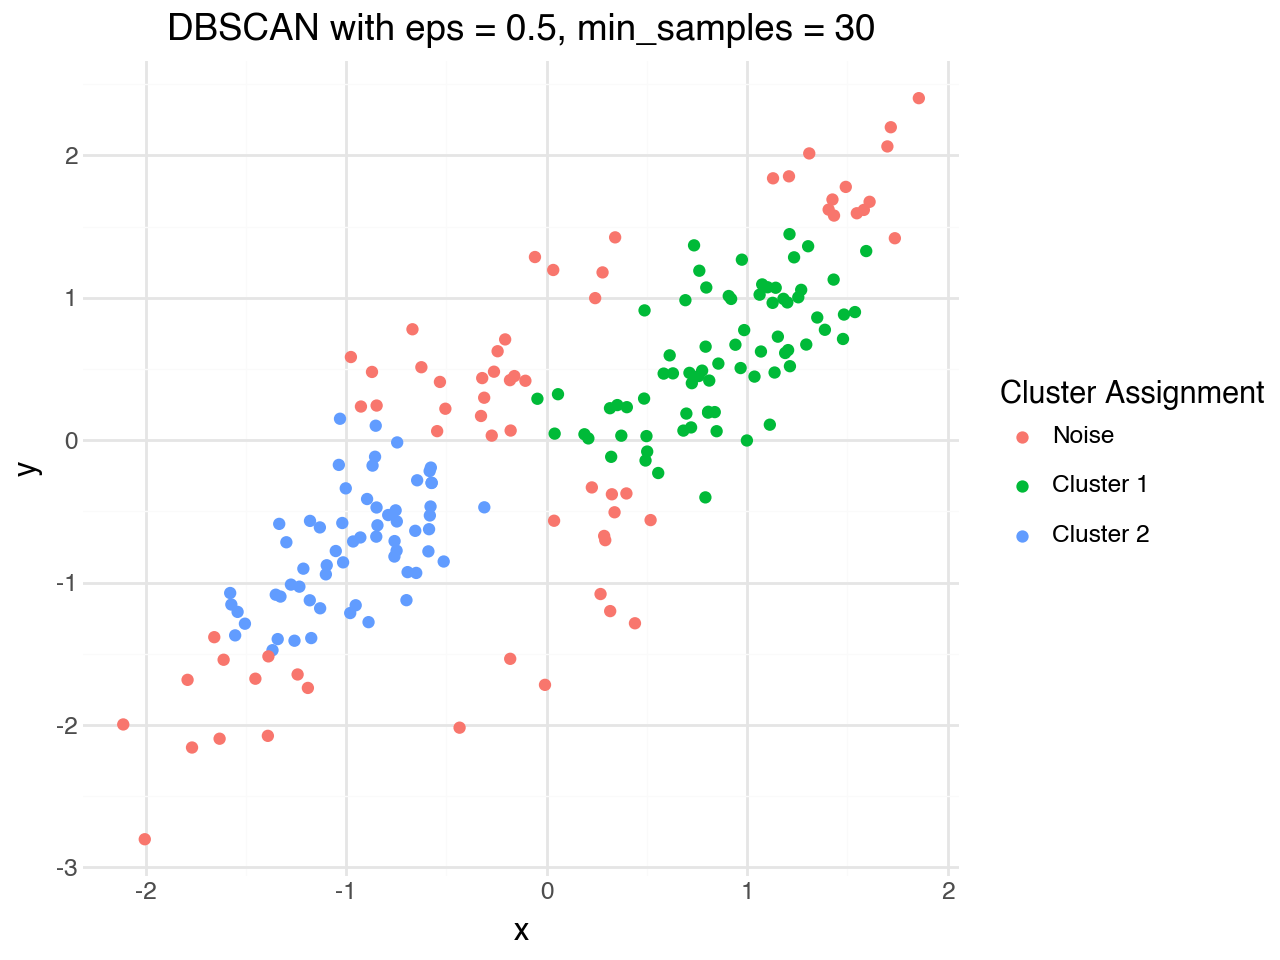

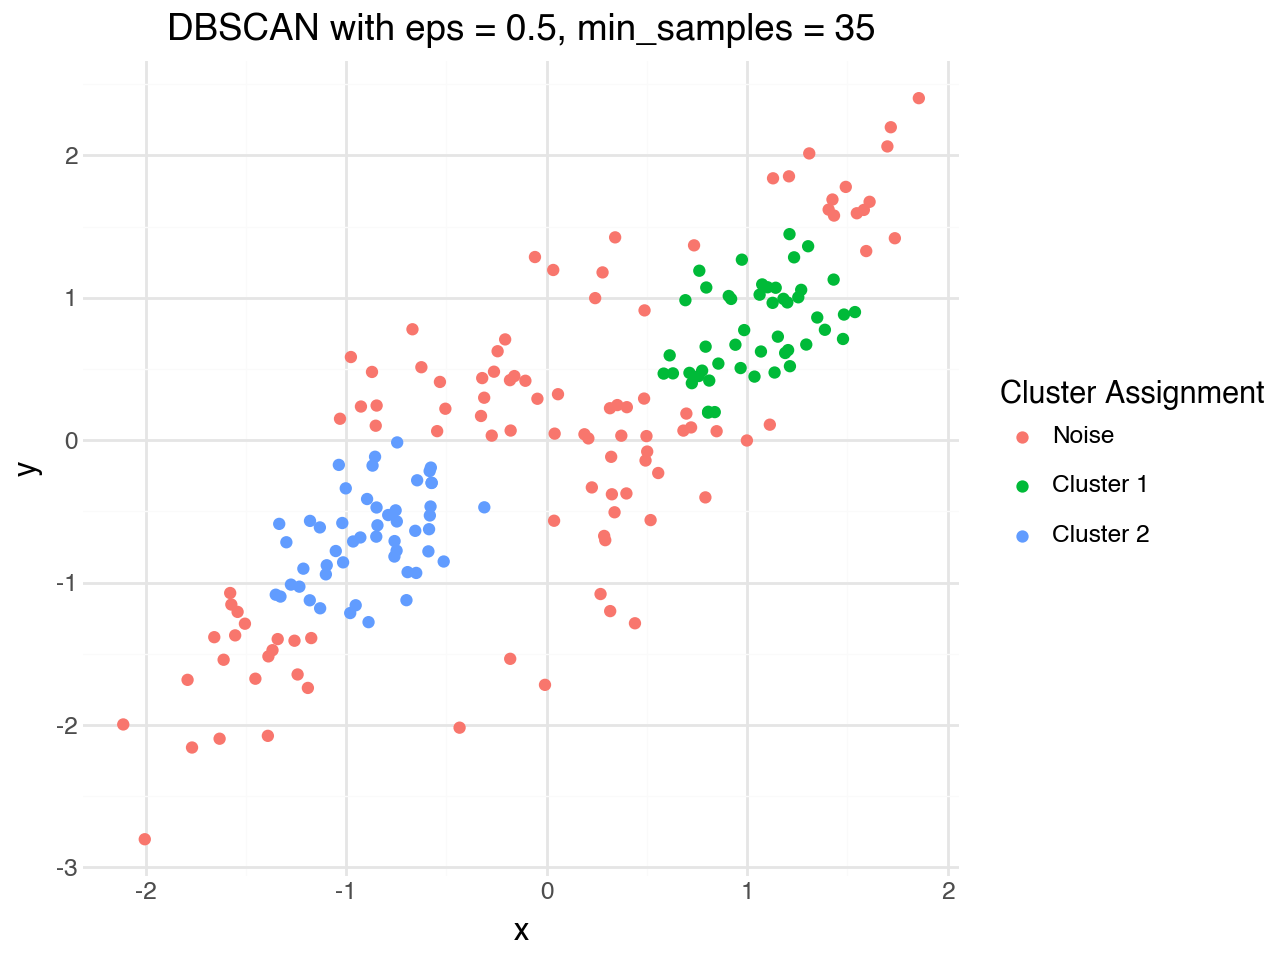

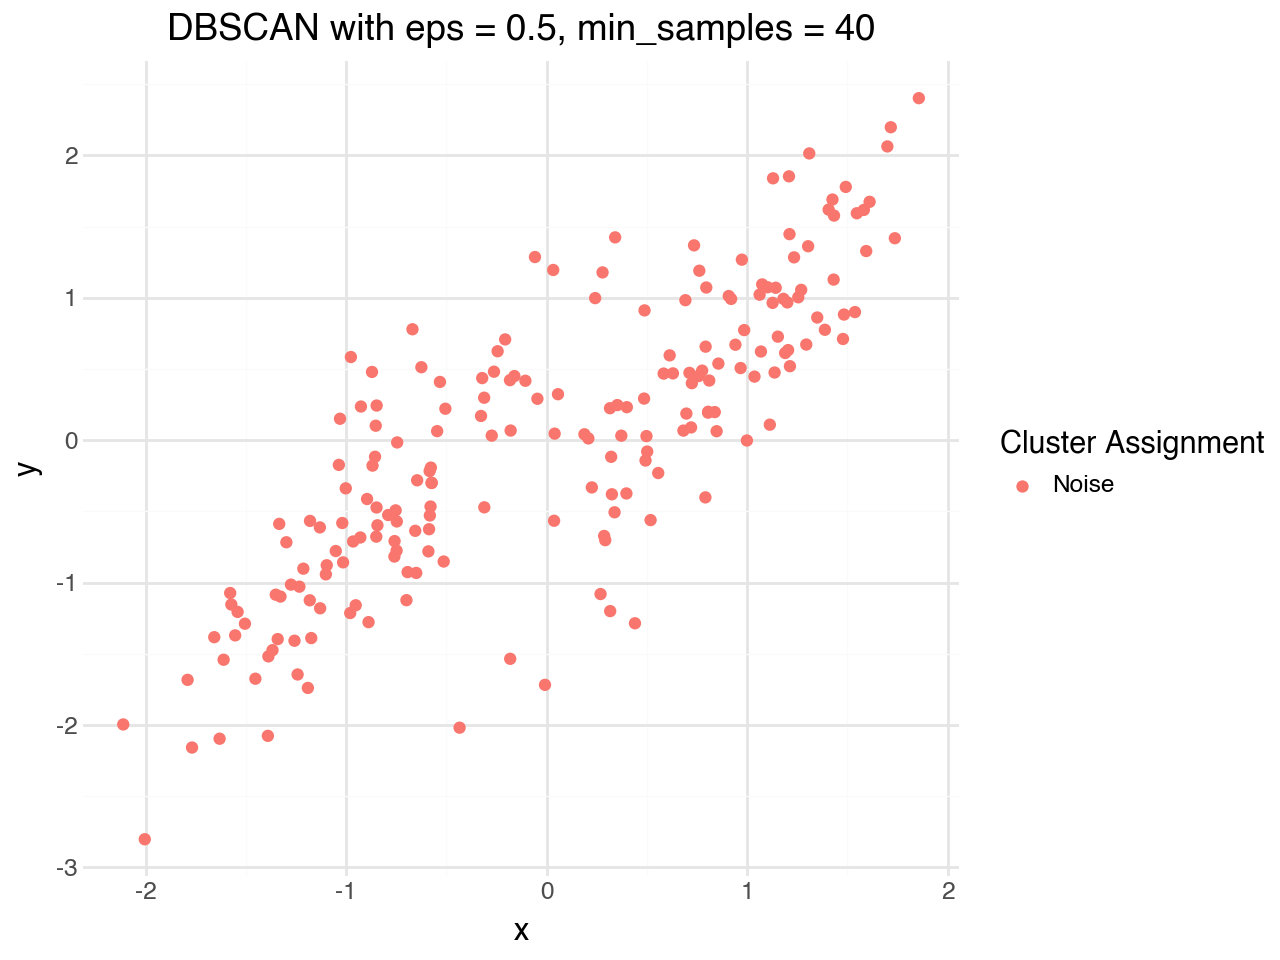

In [83]:
min_samples = [15, 20, 25, 30, 35, 40]

for sample in min_samples:
    db1 = DBSCAN(eps = 0.5, min_samples = sample).fit(d1)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db1.labels_)))]

    plot_df = d1.copy()
    plot_df["assignments"] = db1.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = 0.5, min_samples = {sample}"))

## Dataset 2

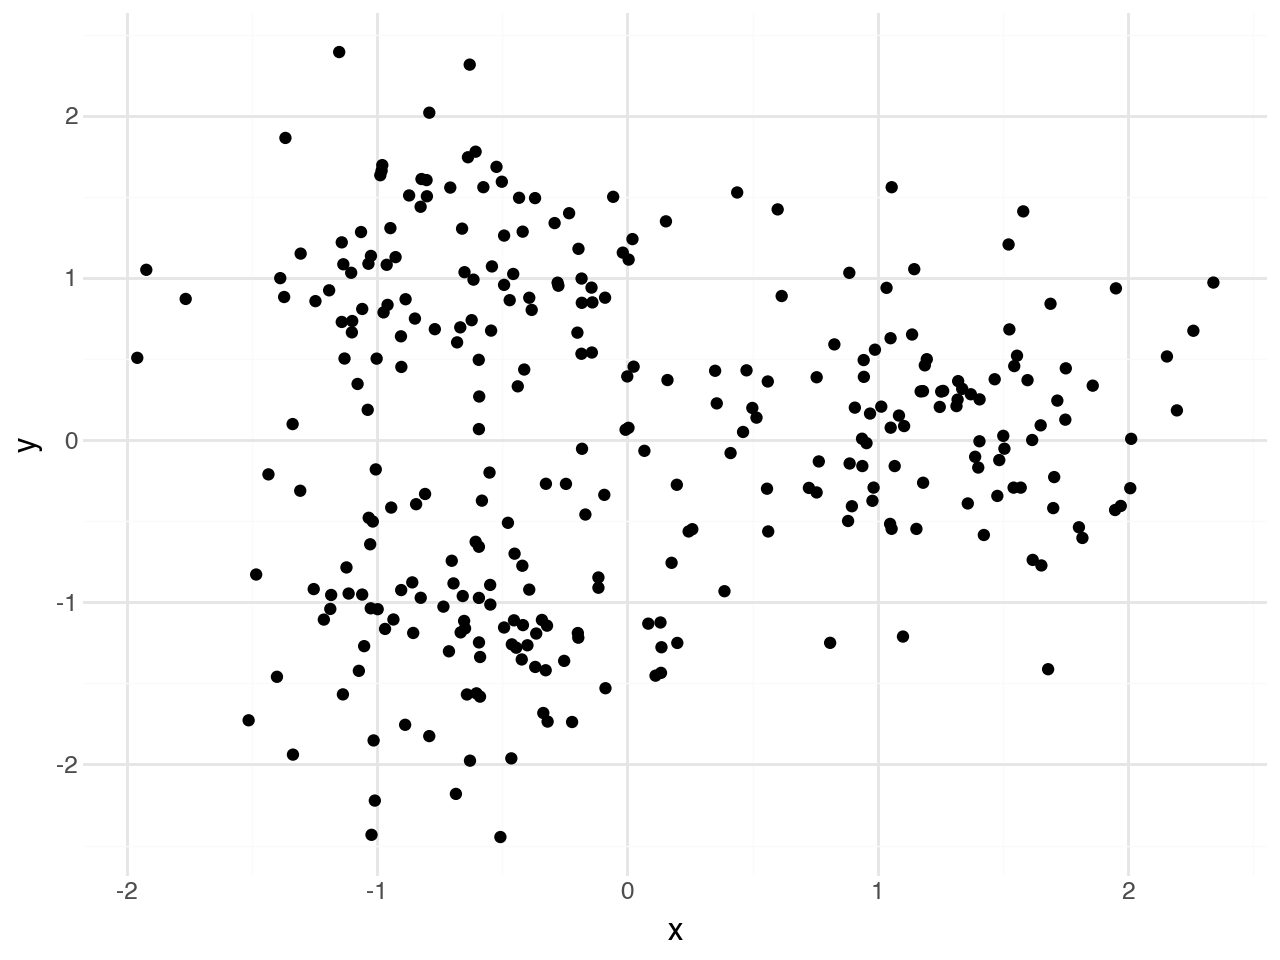

In [84]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

z = StandardScaler()
d2[["x","y"]] = z.fit_transform(d2)

ggplot(d2, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

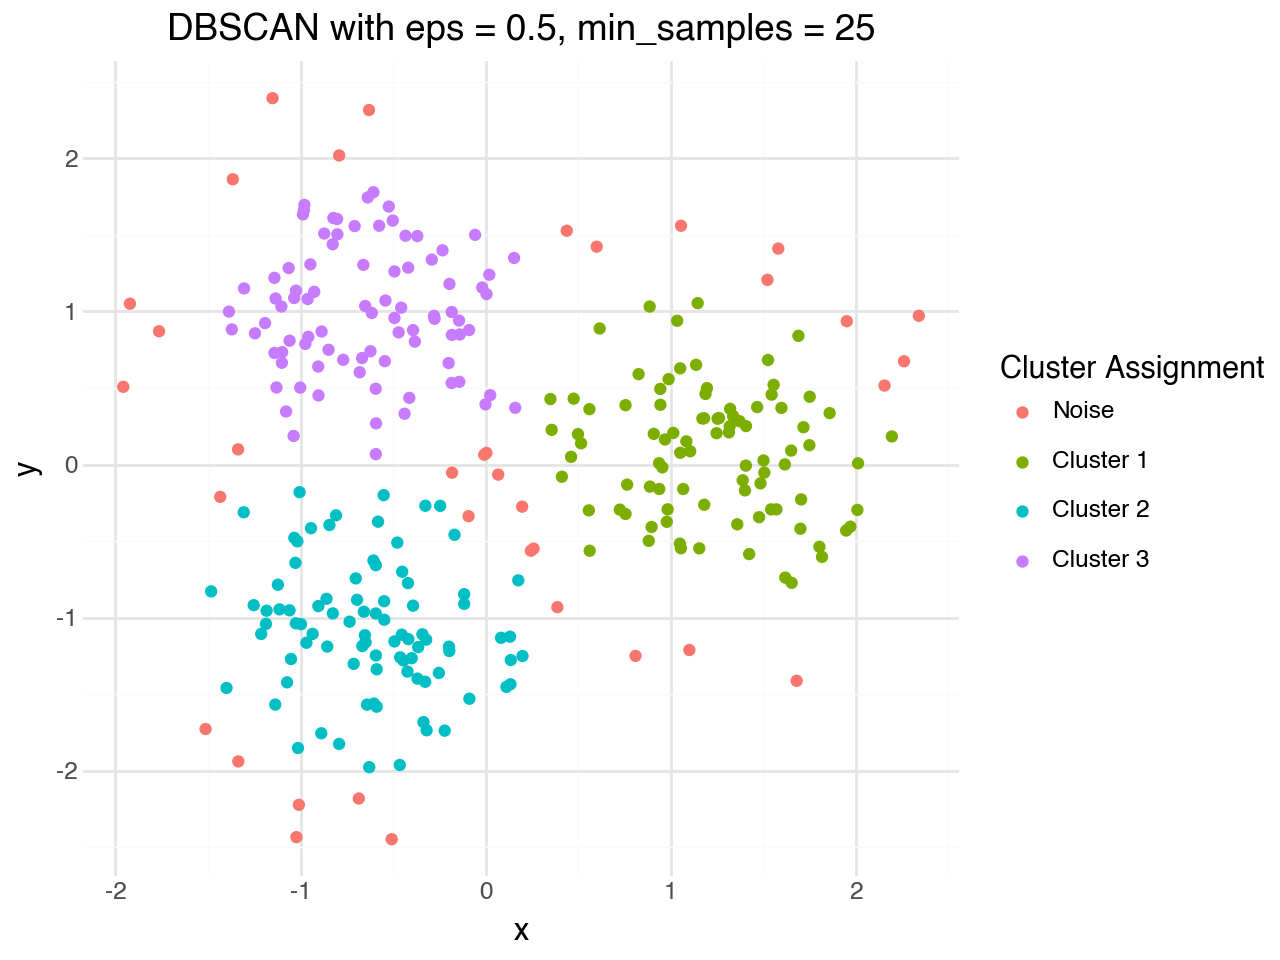

In [85]:
db2 = DBSCAN(eps = 0.5, min_samples = 25).fit(d2)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

d2["assignments"] = db2.labels_
(ggplot(d2, aes(x = "x", y = "y", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 25"))

In [86]:
# grab only clustered data points
d2_clustered = d2.loc[(d2.assignments >= 0)]

print(silhouette_score(d2_clustered[["x","y"]], d2_clustered["assignments"]))

# overall
print(silhouette_score(d2[["x","y"]], d2["assignments"]))

0.6140043544818719
0.4803831307840633


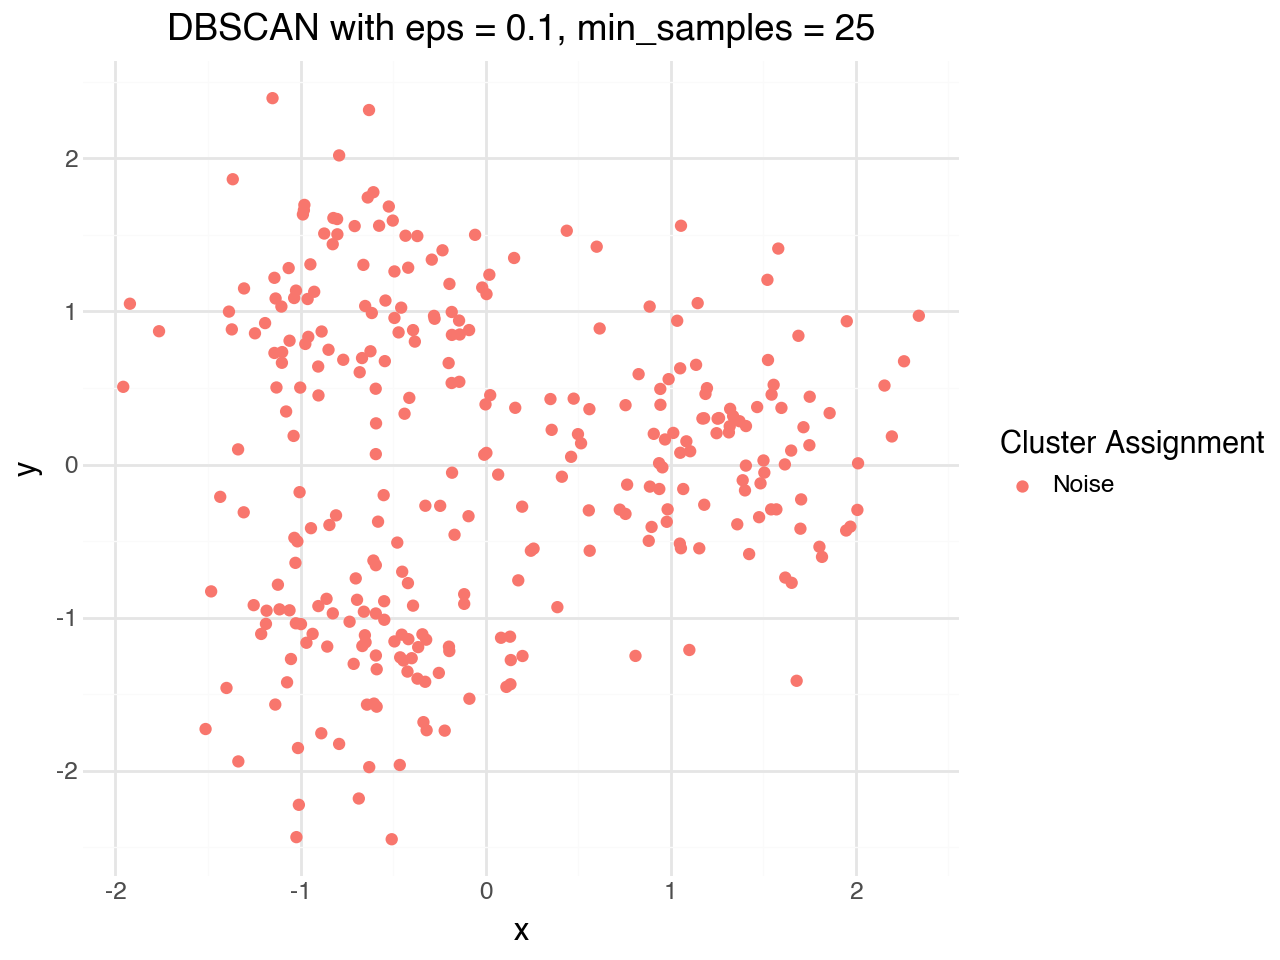

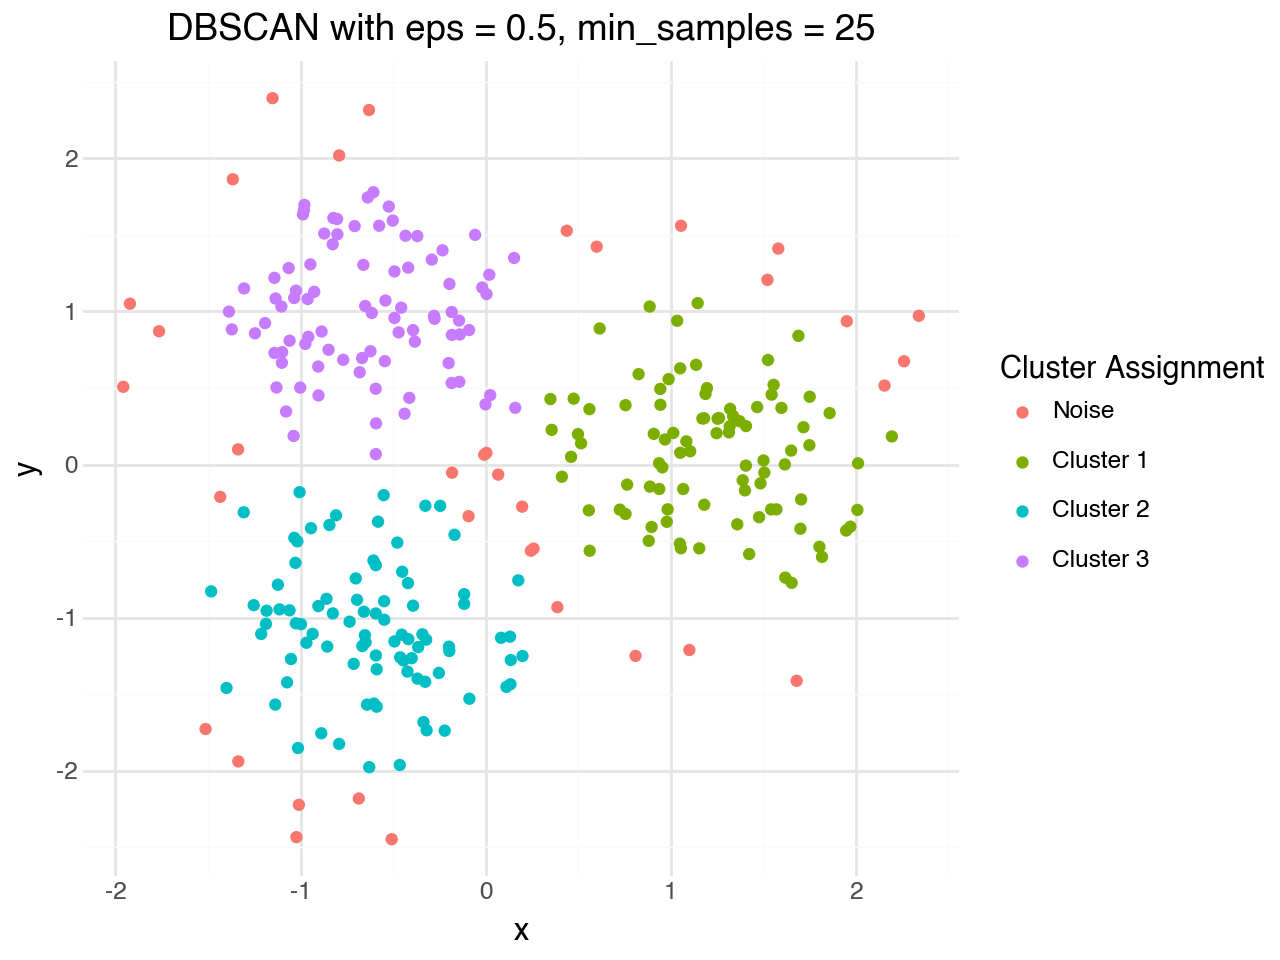

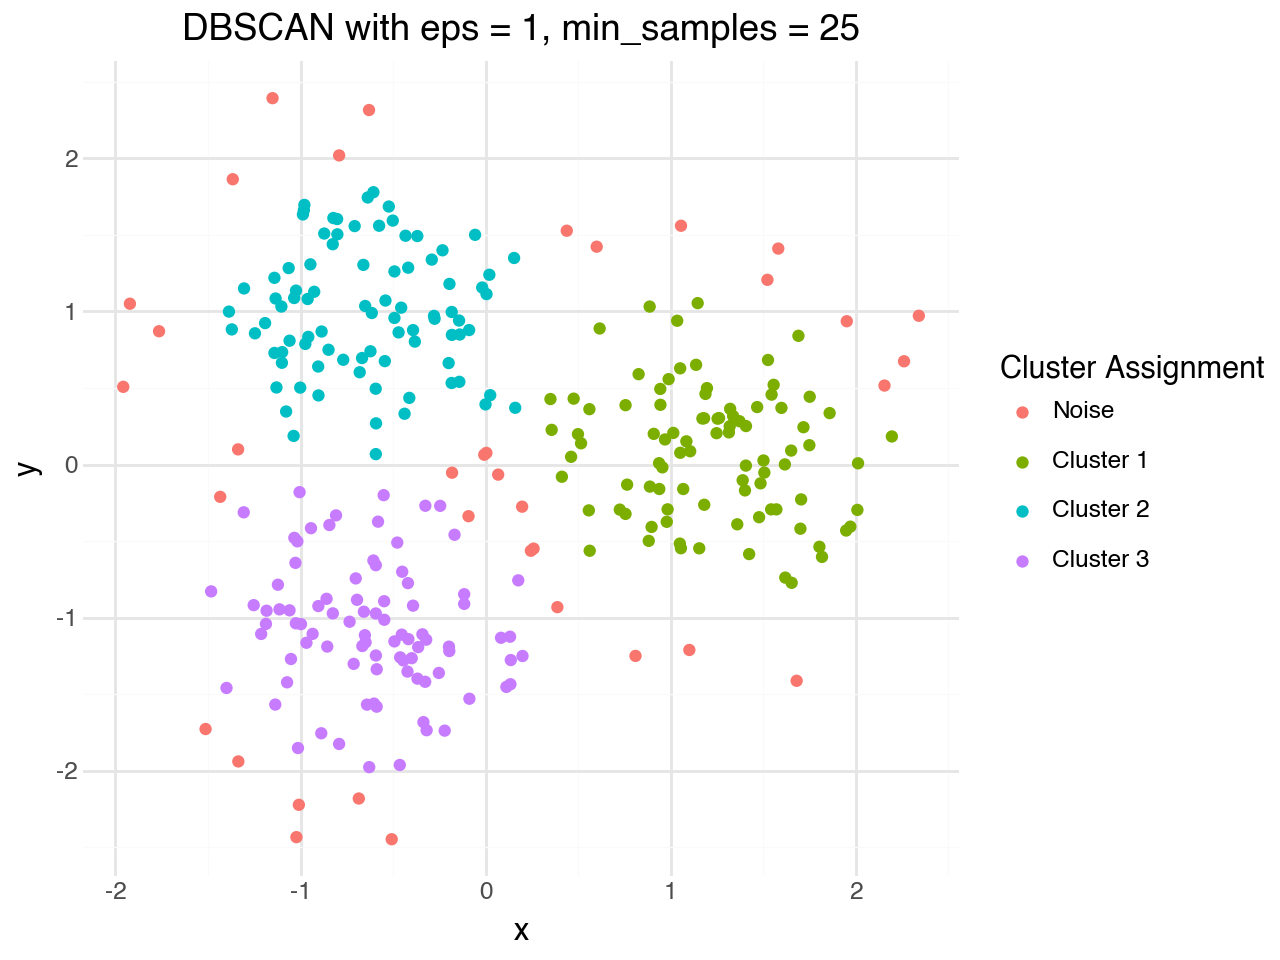

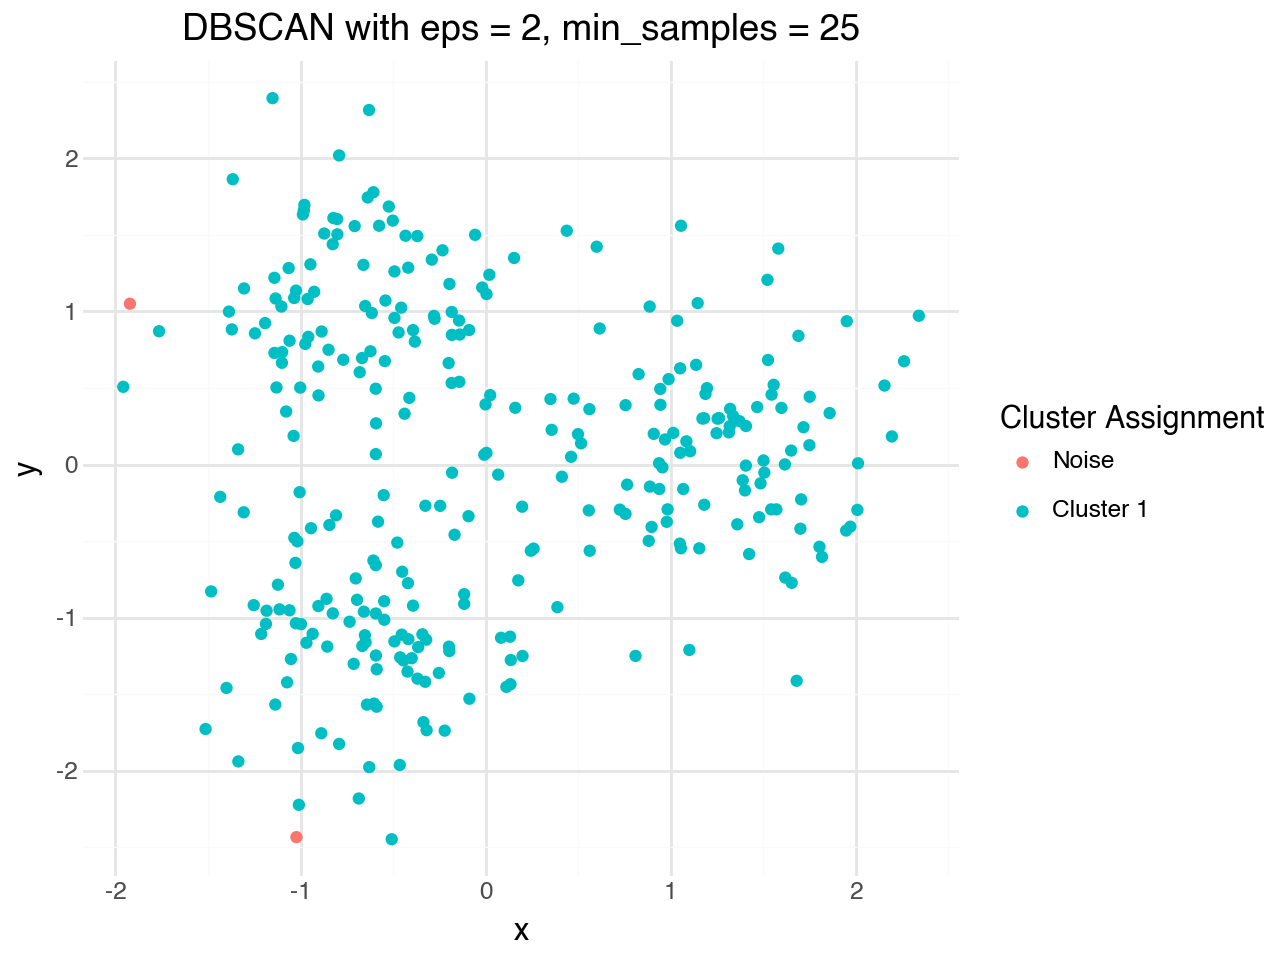

In [87]:
for ep in eps:
    db2 = DBSCAN(eps = ep, min_samples = 25).fit(d2)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

    plot_df = d2.copy()
    plot_df["assignments"] = db2.labels_
    
    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = {ep}, min_samples = 25"))

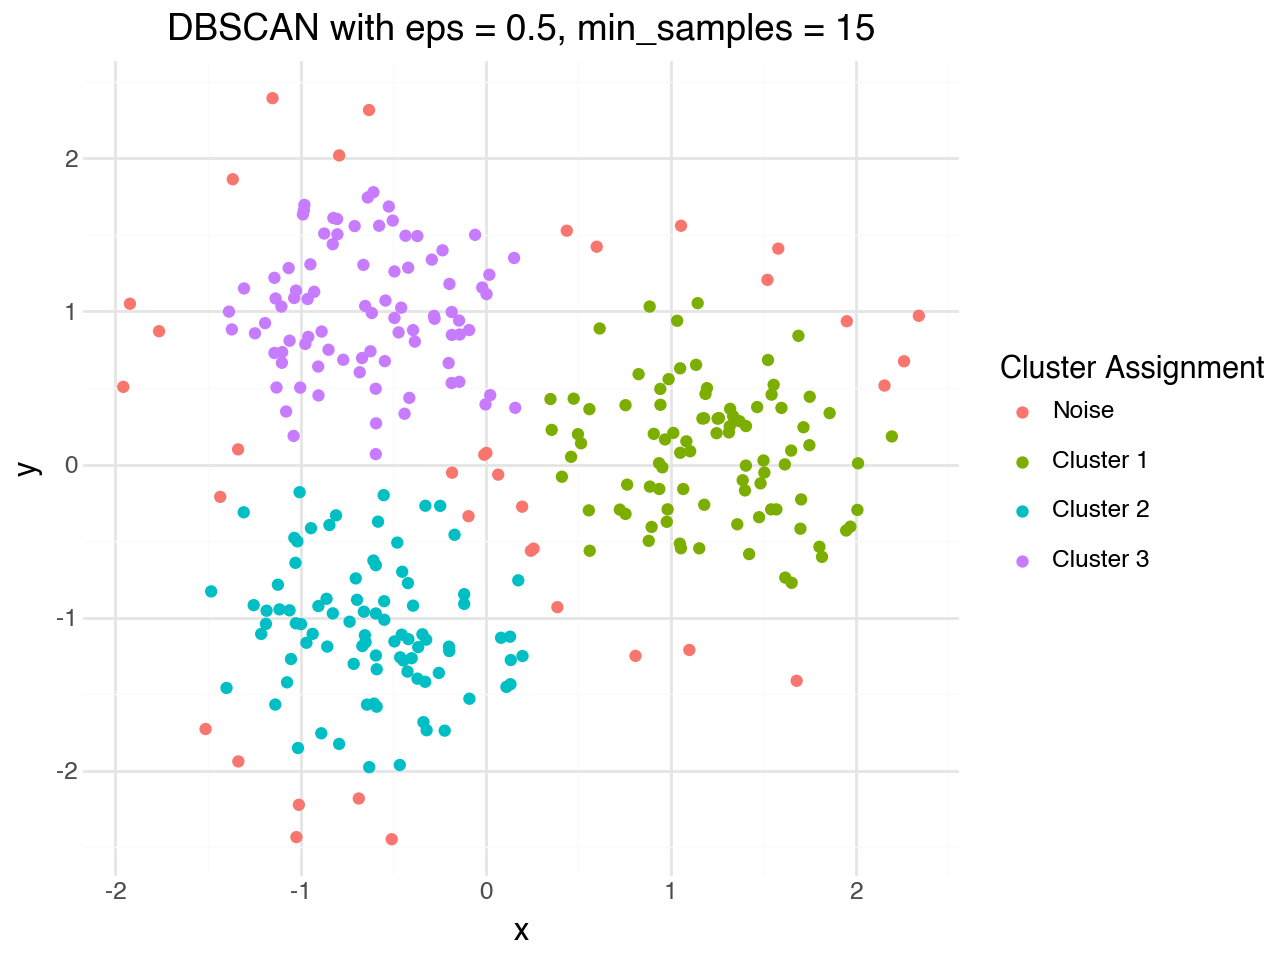

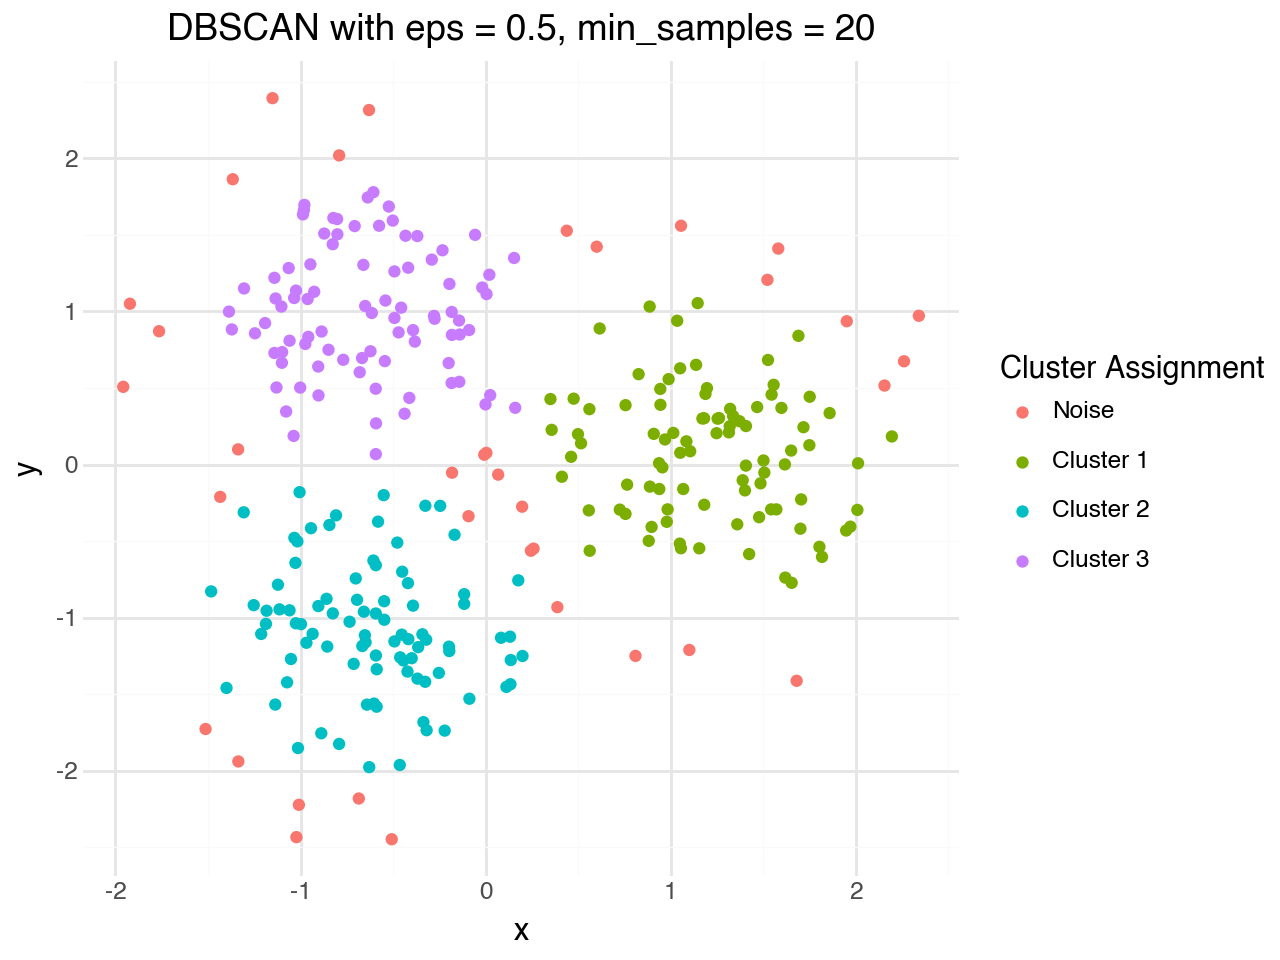

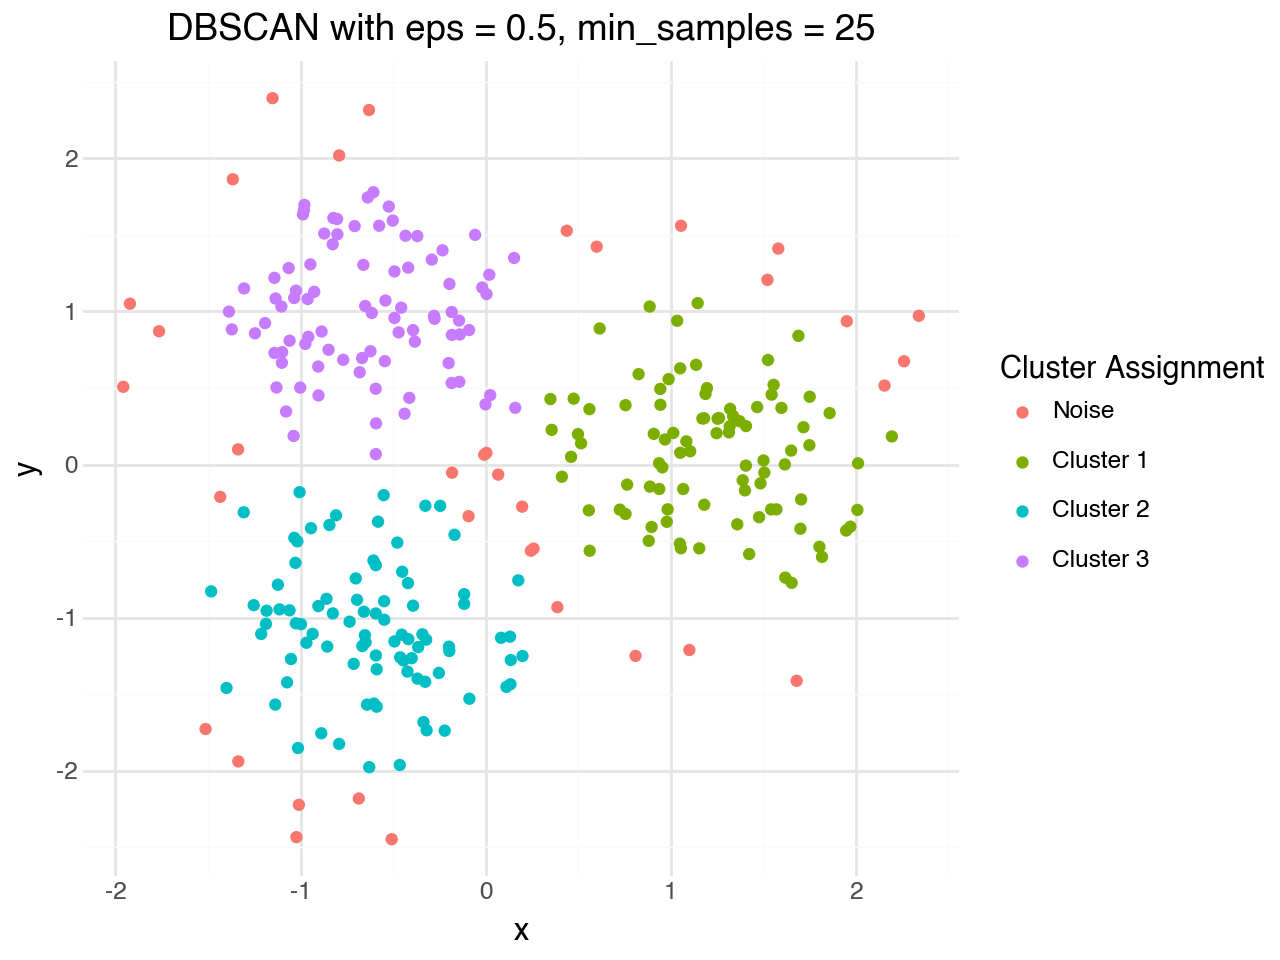

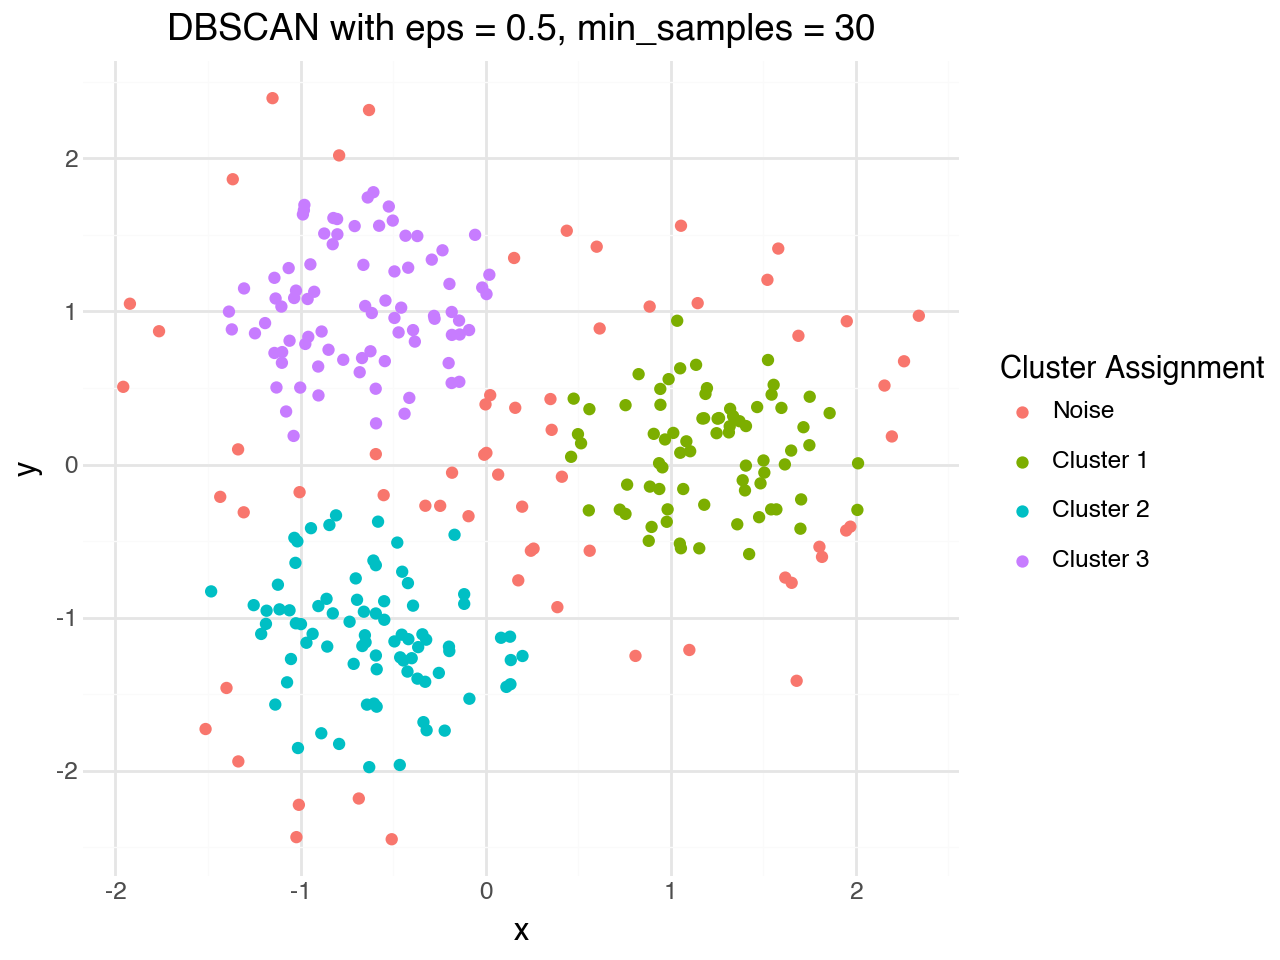

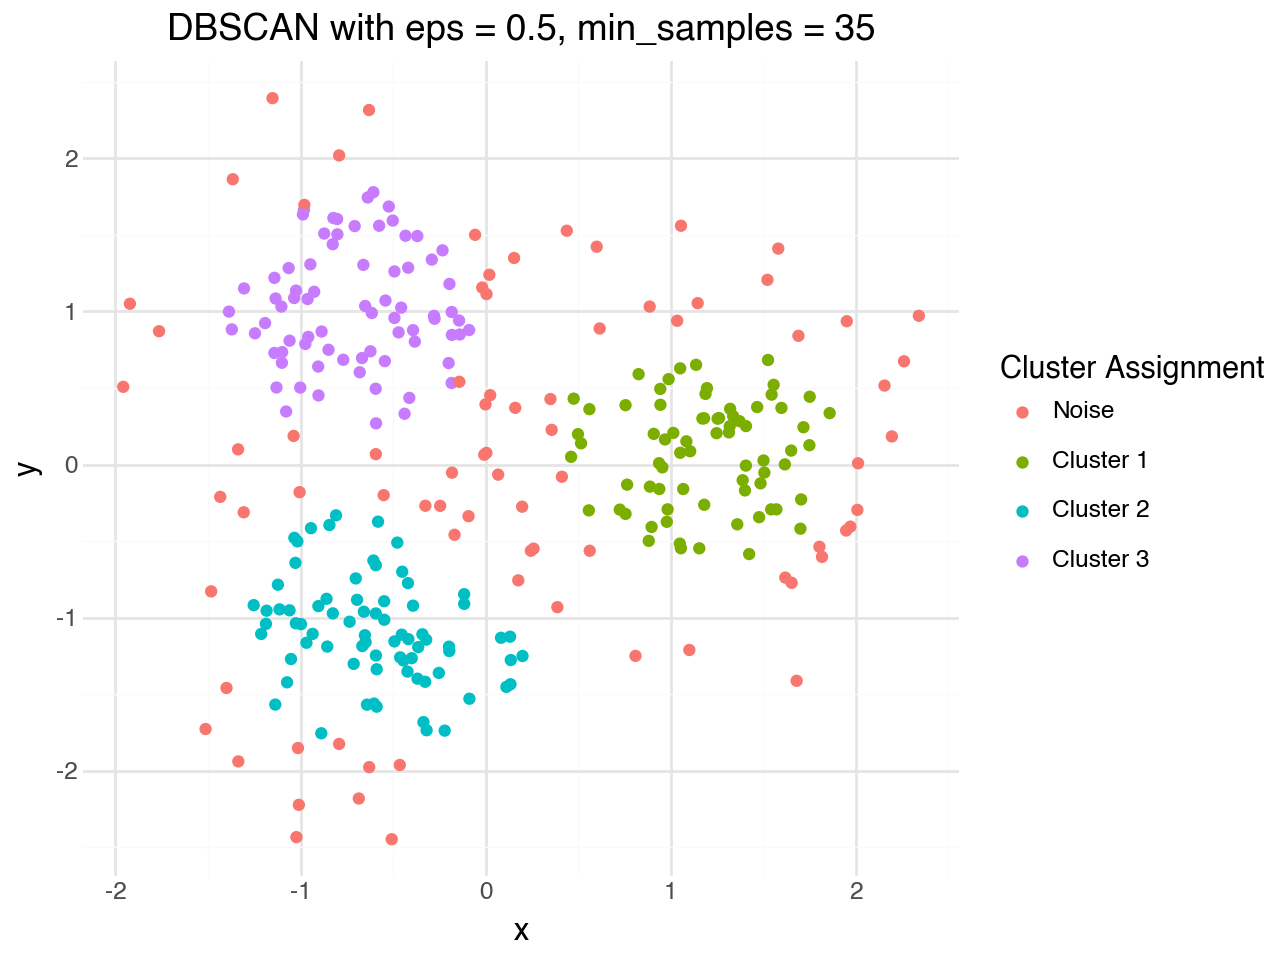

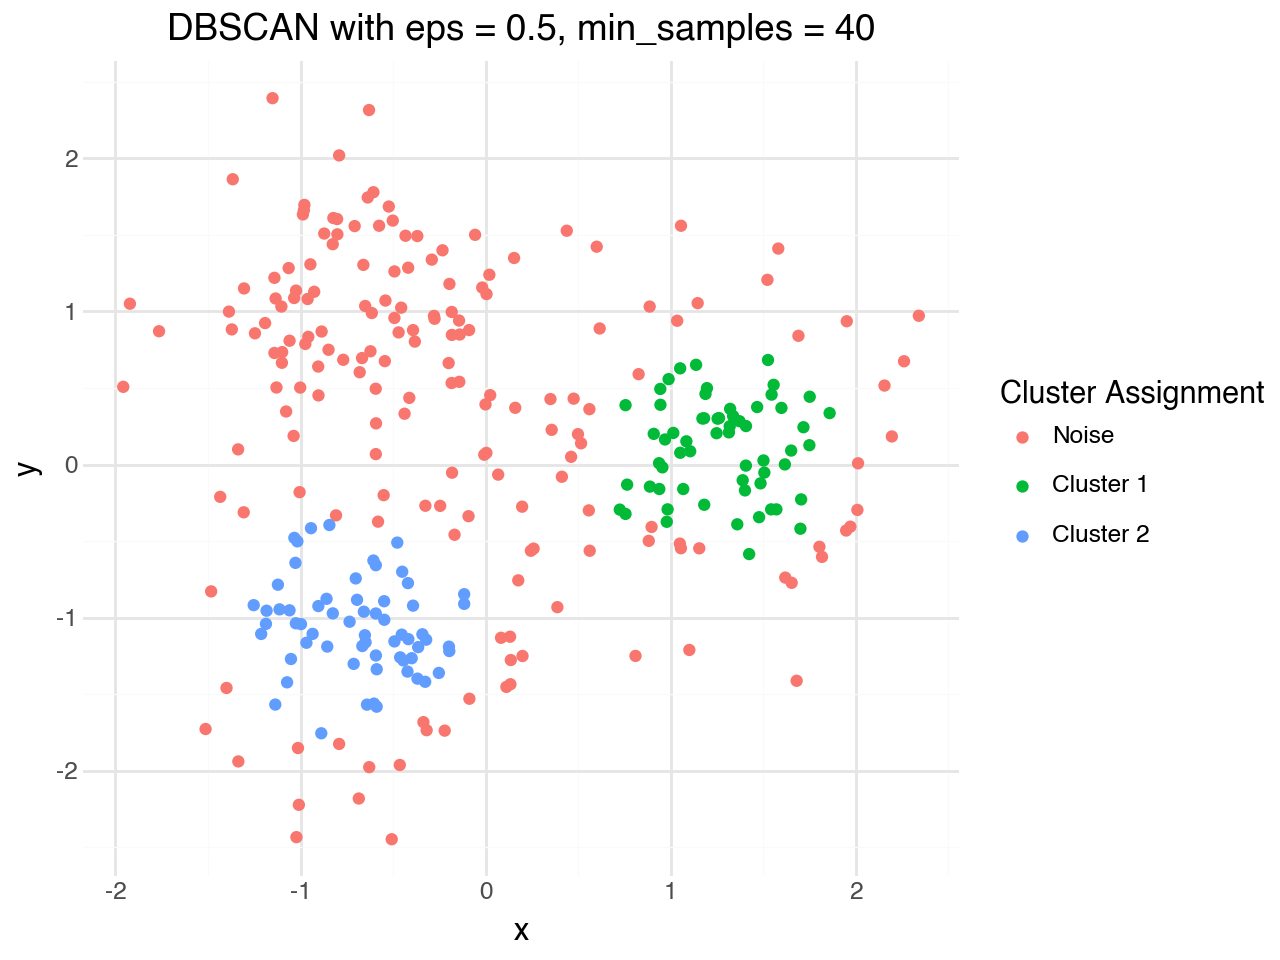

In [88]:
for sample in min_samples:
    db2 = DBSCAN(eps = 0.5, min_samples = sample).fit(d2)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db2.labels_)))]

    plot_df = d2.copy()
    plot_df["assignments"] = db2.labels_
    
    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = 0.5, min_samples = {sample}"))

## Dataset 3

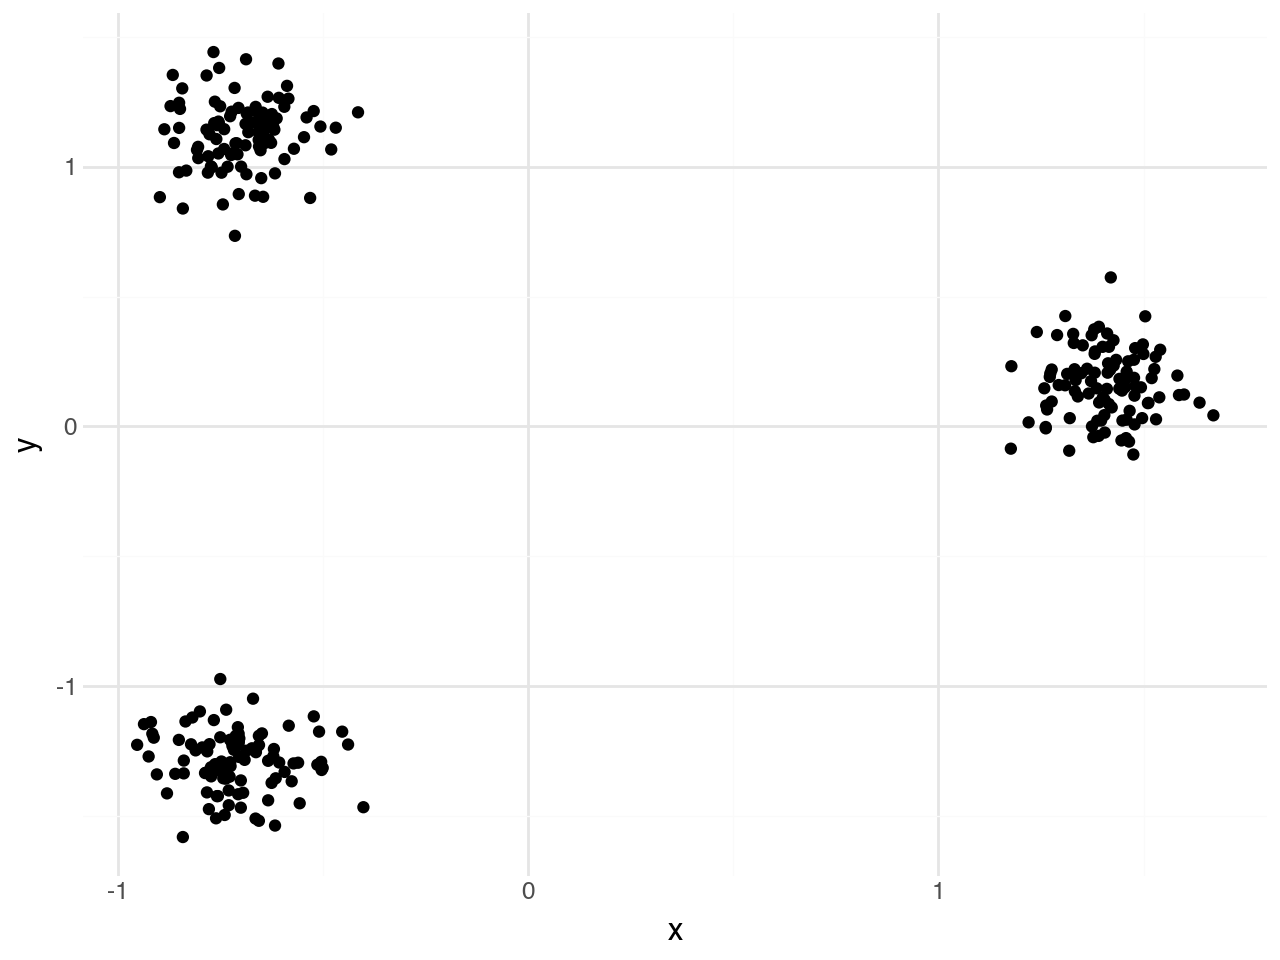

In [89]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

z = StandardScaler()
d3[["x","y"]] = z.fit_transform(d3)

ggplot(d3, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

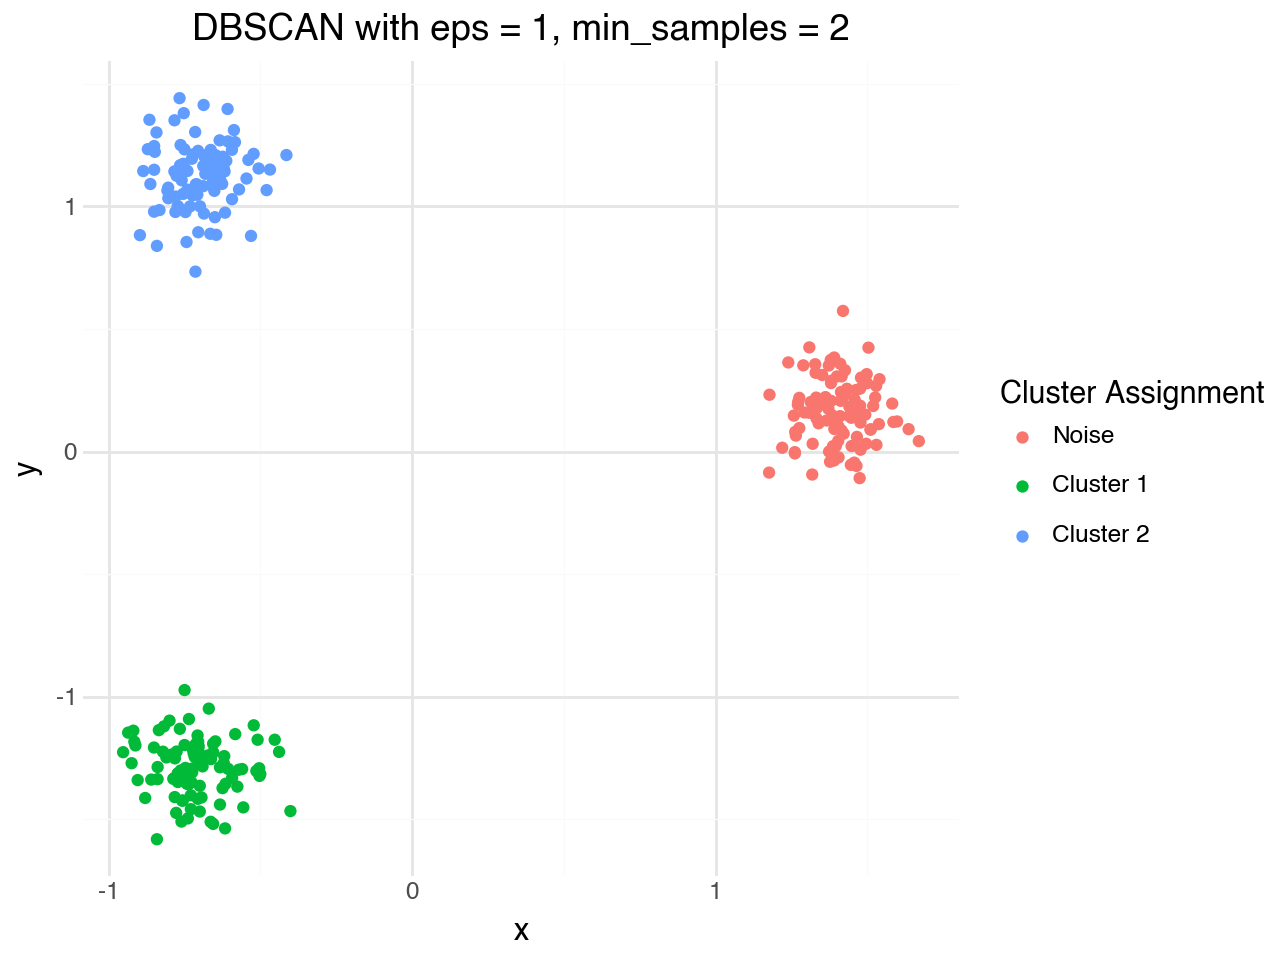

In [90]:
# eps = 1, min_samples = 2
db3 = DBSCAN(eps = 1, min_samples = 2).fit(d3)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

d3["assignments"] = db3.labels_

(ggplot(d3, aes(x = "x", y = "y", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
labs(title = "DBSCAN with eps = 1, min_samples = 2"))

In [91]:
# grab only clustered data points
d3_clustered = d3.loc[(d3.assignments >= 0)]

print(silhouette_score(d3_clustered[["x","y"]], d3_clustered["assignments"]))

# overall
print(silhouette_score(d3[["x","y"]], d3["assignments"]))

0.913619050733588
0.913619050733588


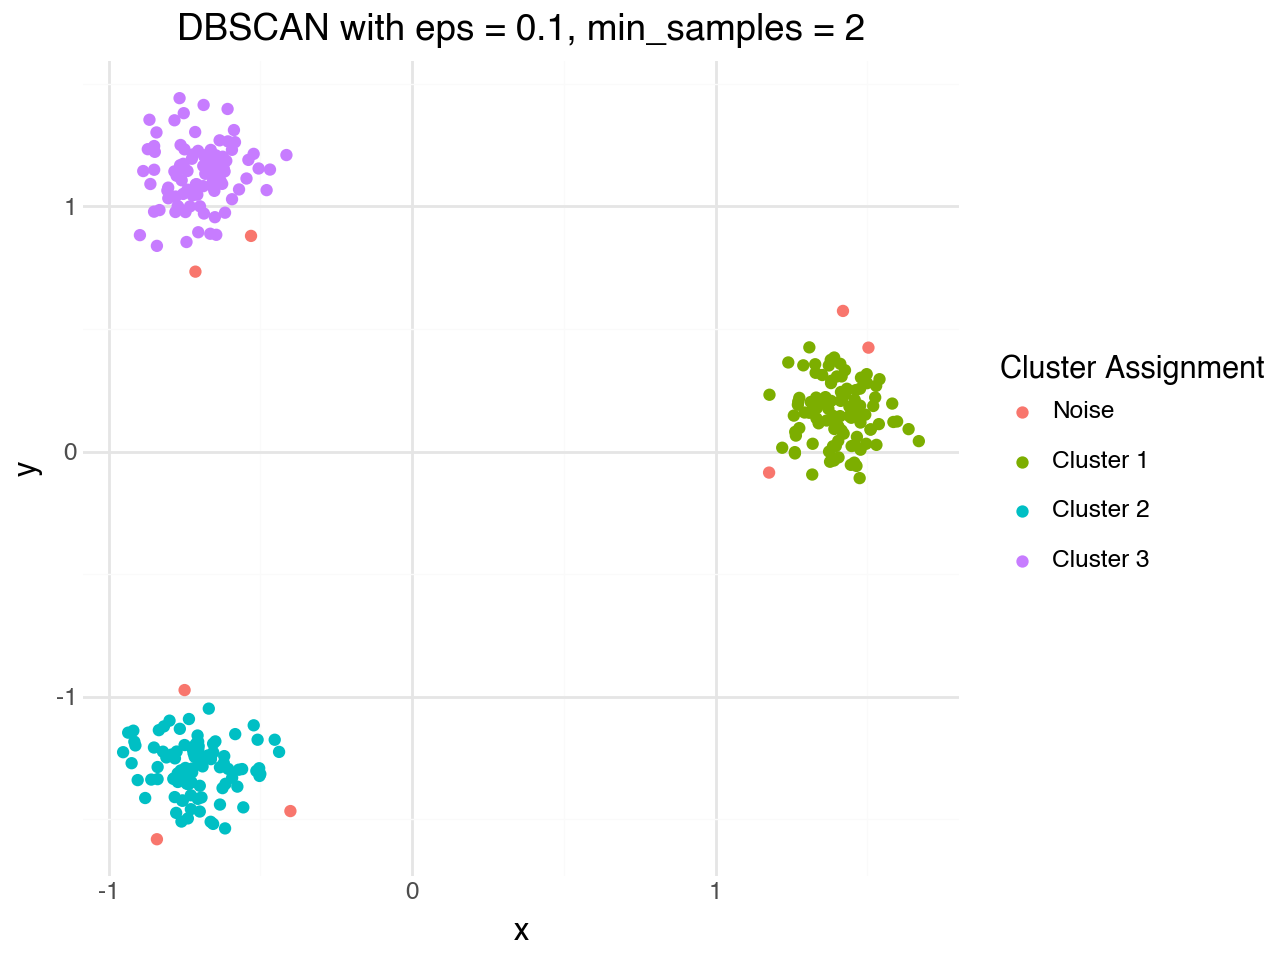

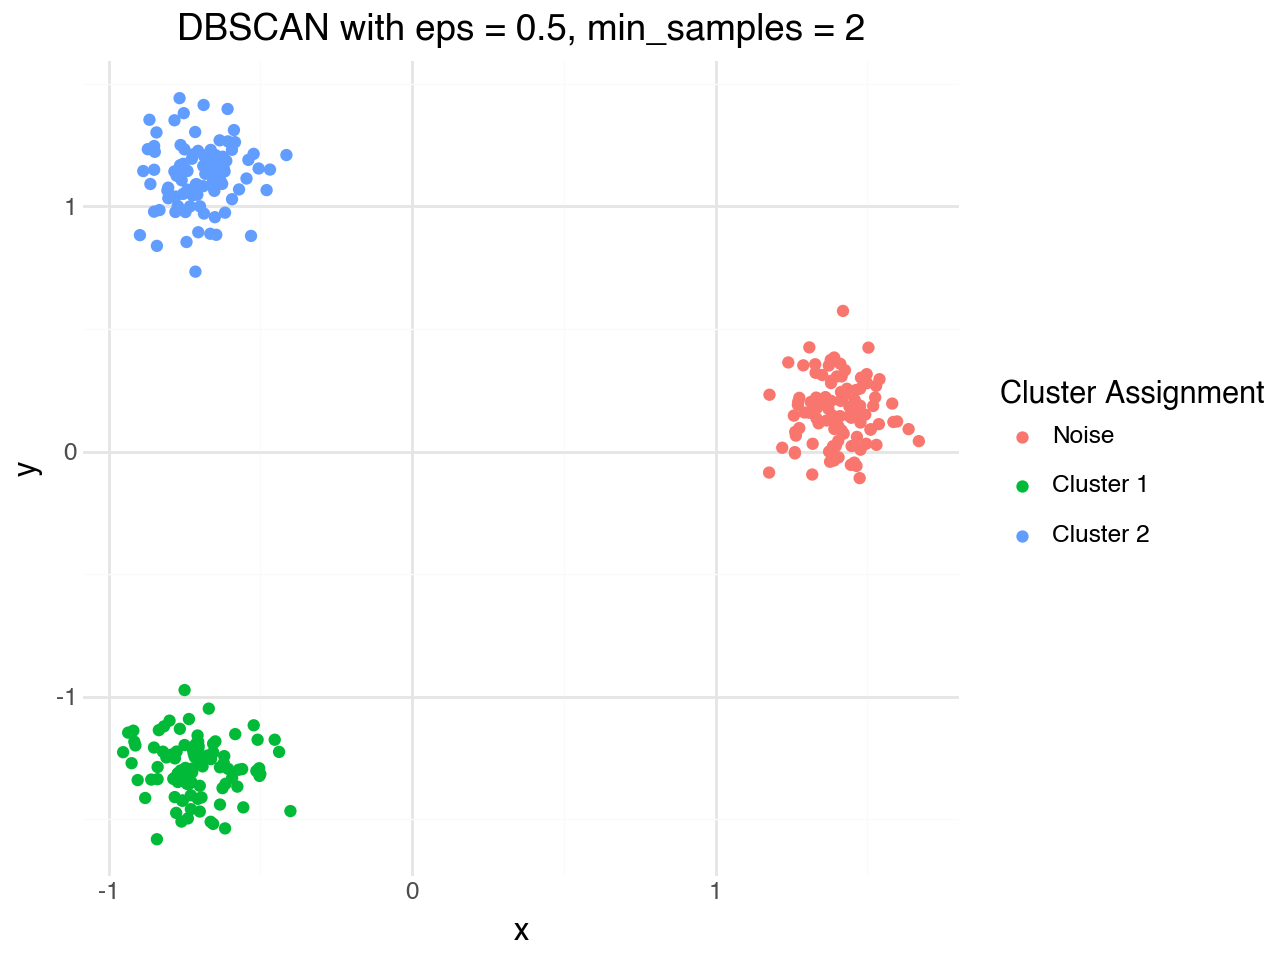

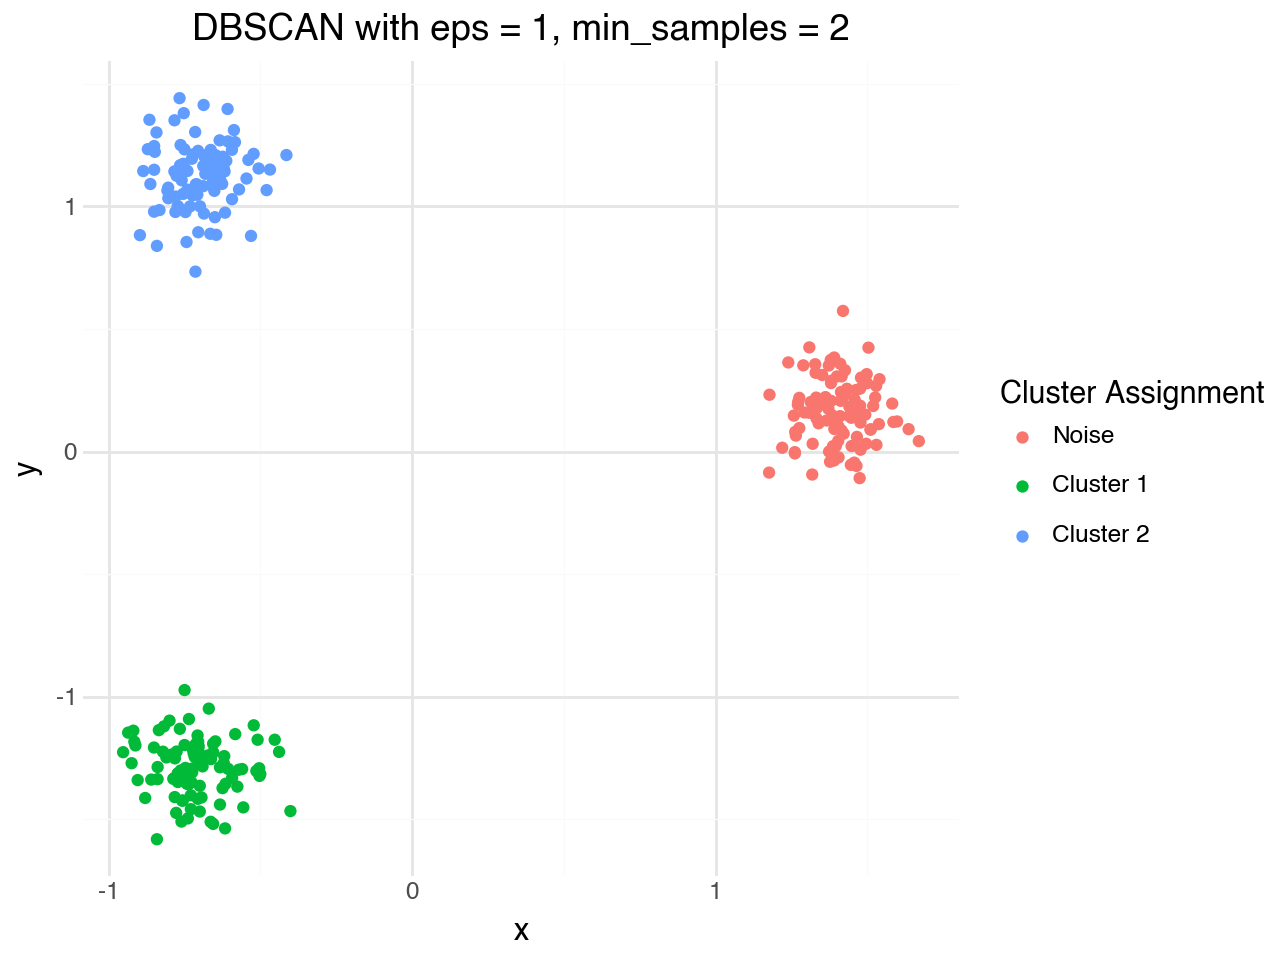

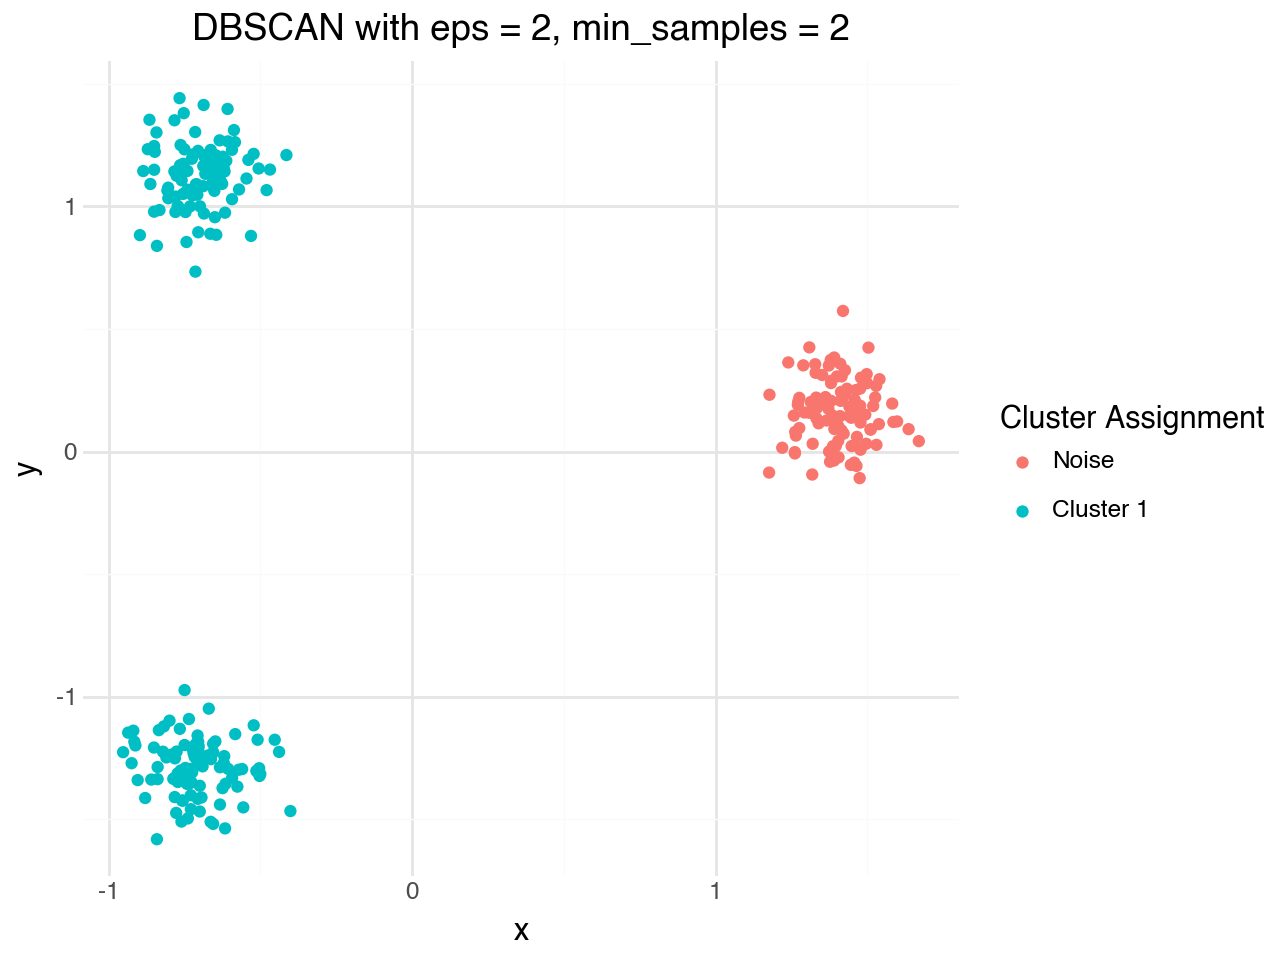

In [92]:
for ep in eps:

    db3 = DBSCAN(eps = ep, min_samples = 2).fit(d3)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

    plot_df = d3.copy()
    plot_df["assignments"] = db3.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = {ep}, min_samples = 2"))

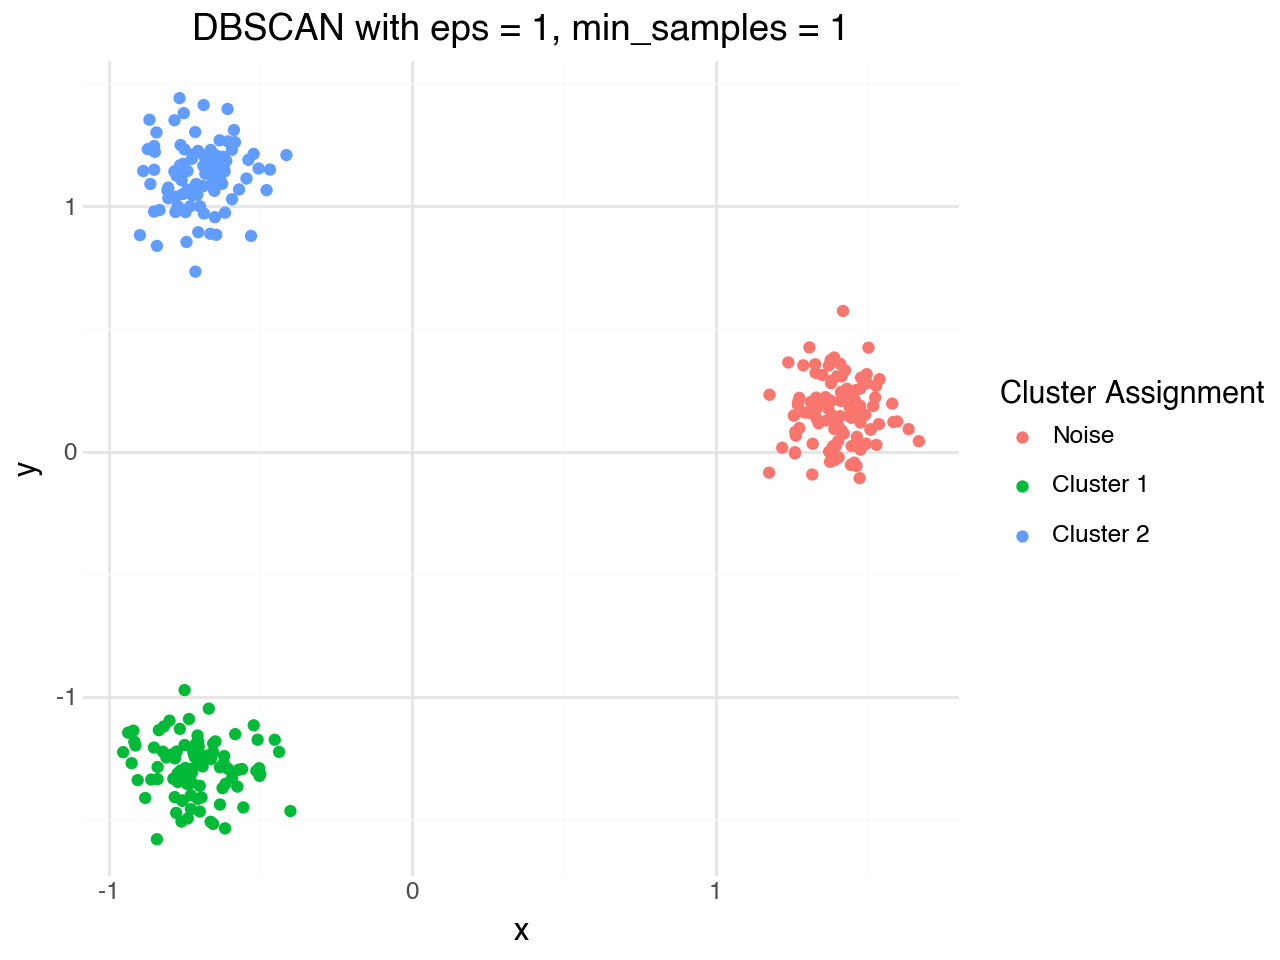

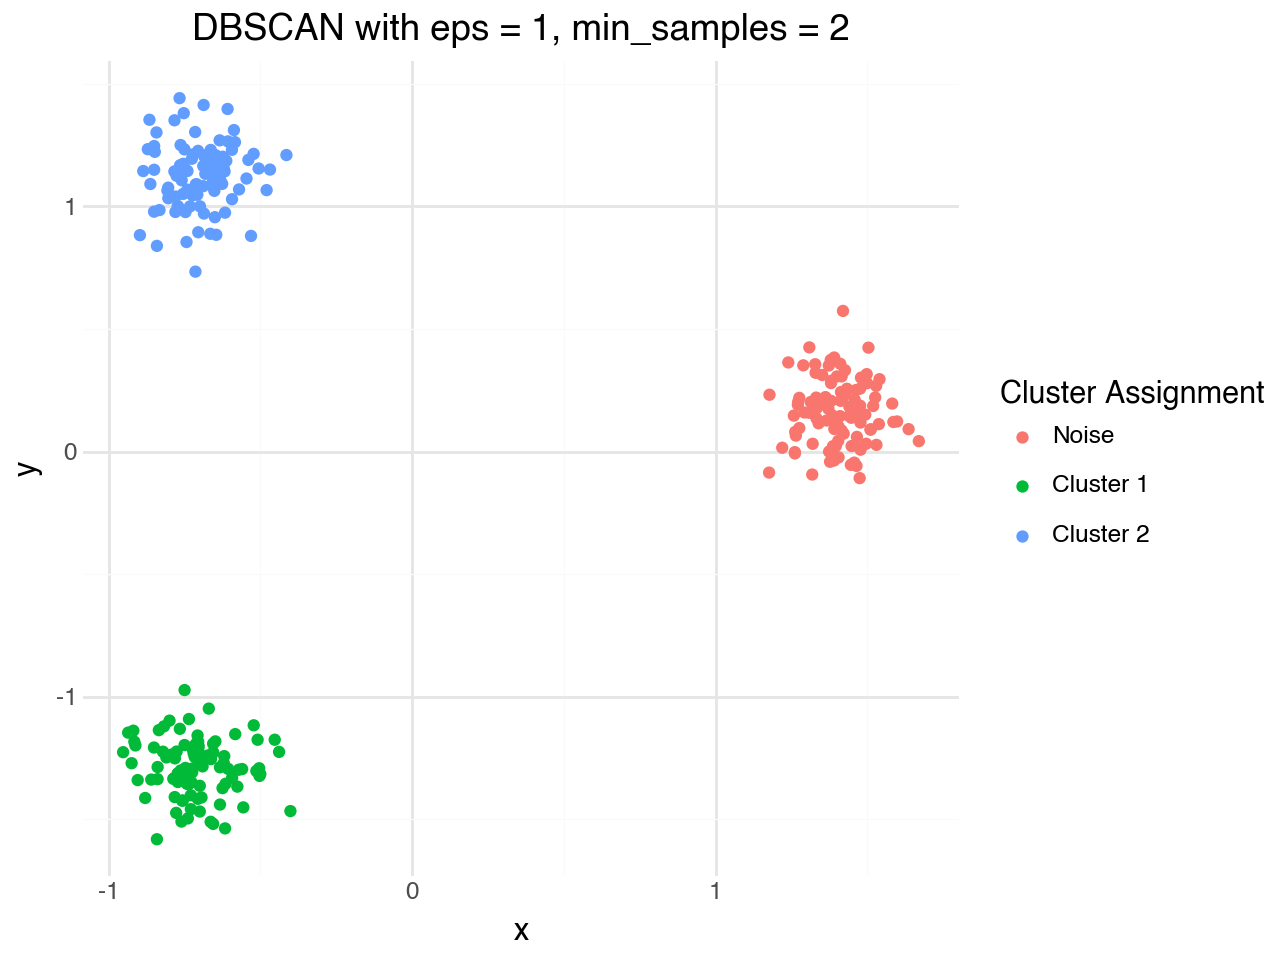

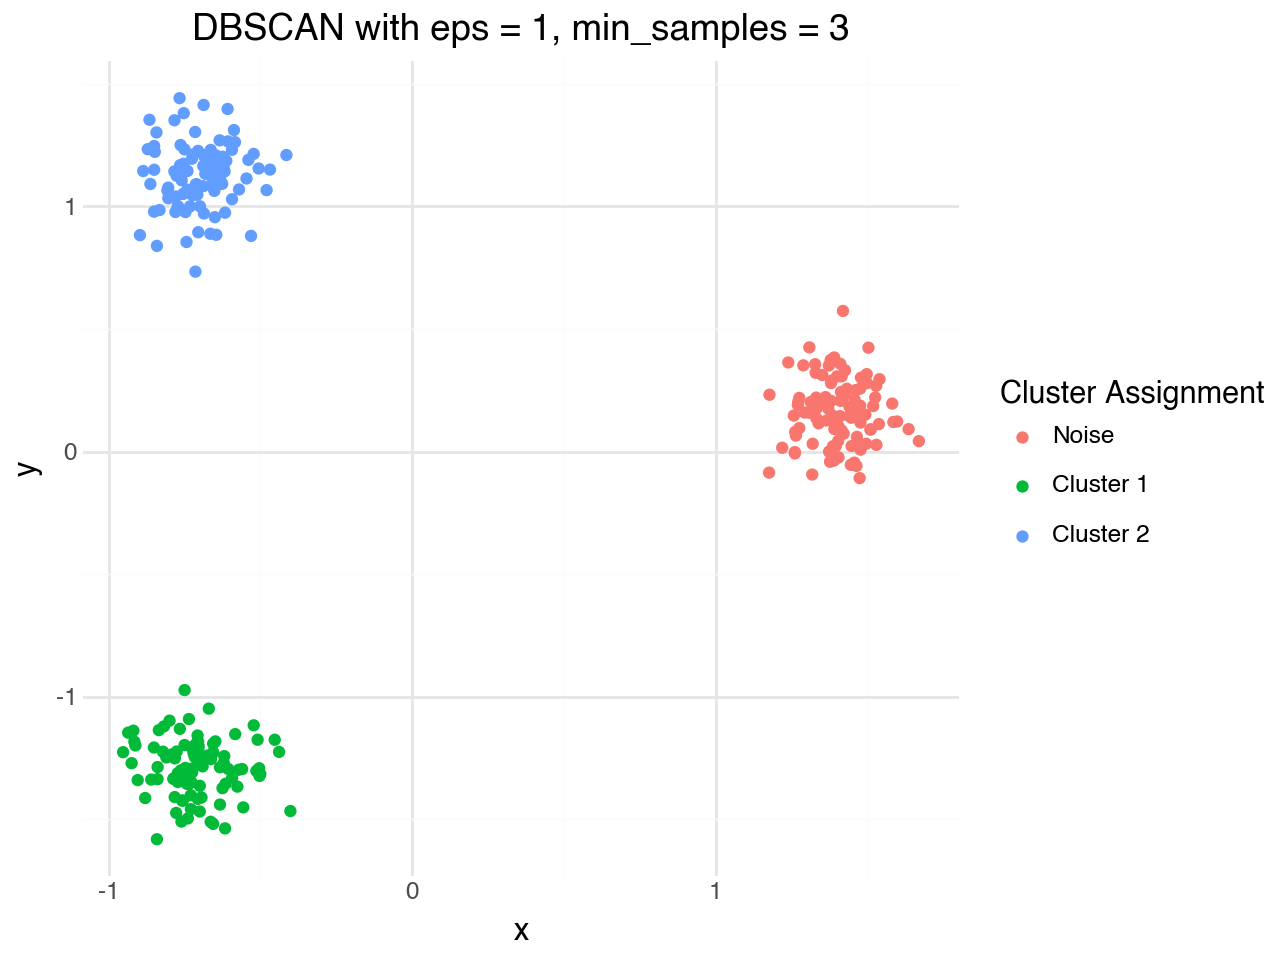

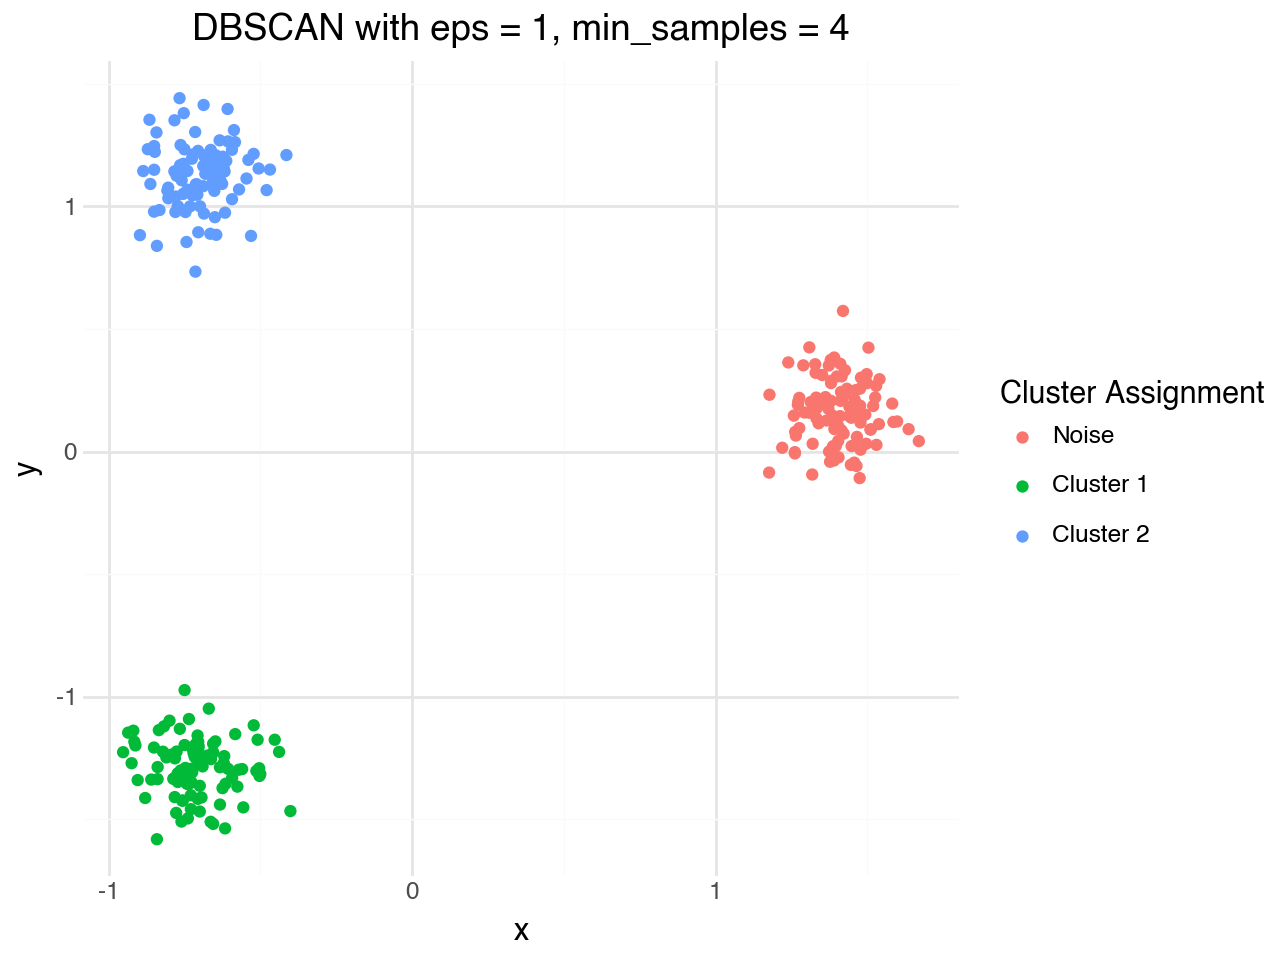

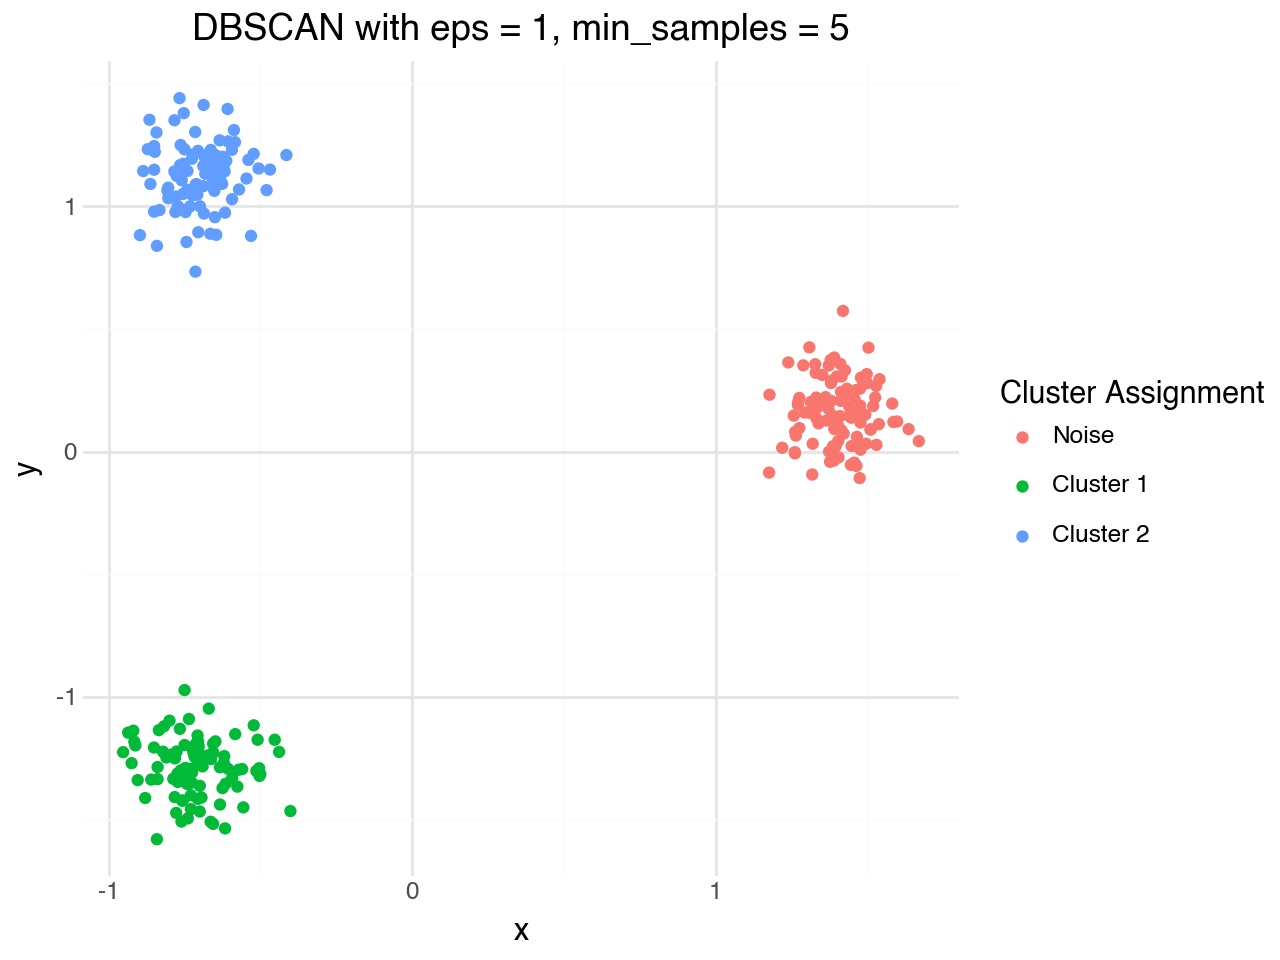

In [93]:
min_samples = [1, 2, 3, 4, 5]

for sample in min_samples:
    db3 = DBSCAN(eps = 1, min_samples = sample).fit(d3)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db3.labels_)))]

    plot_df = d3.copy()
    plot_df["assignments"] = db3.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = 1, min_samples = {sample}"))

## Dataset 4

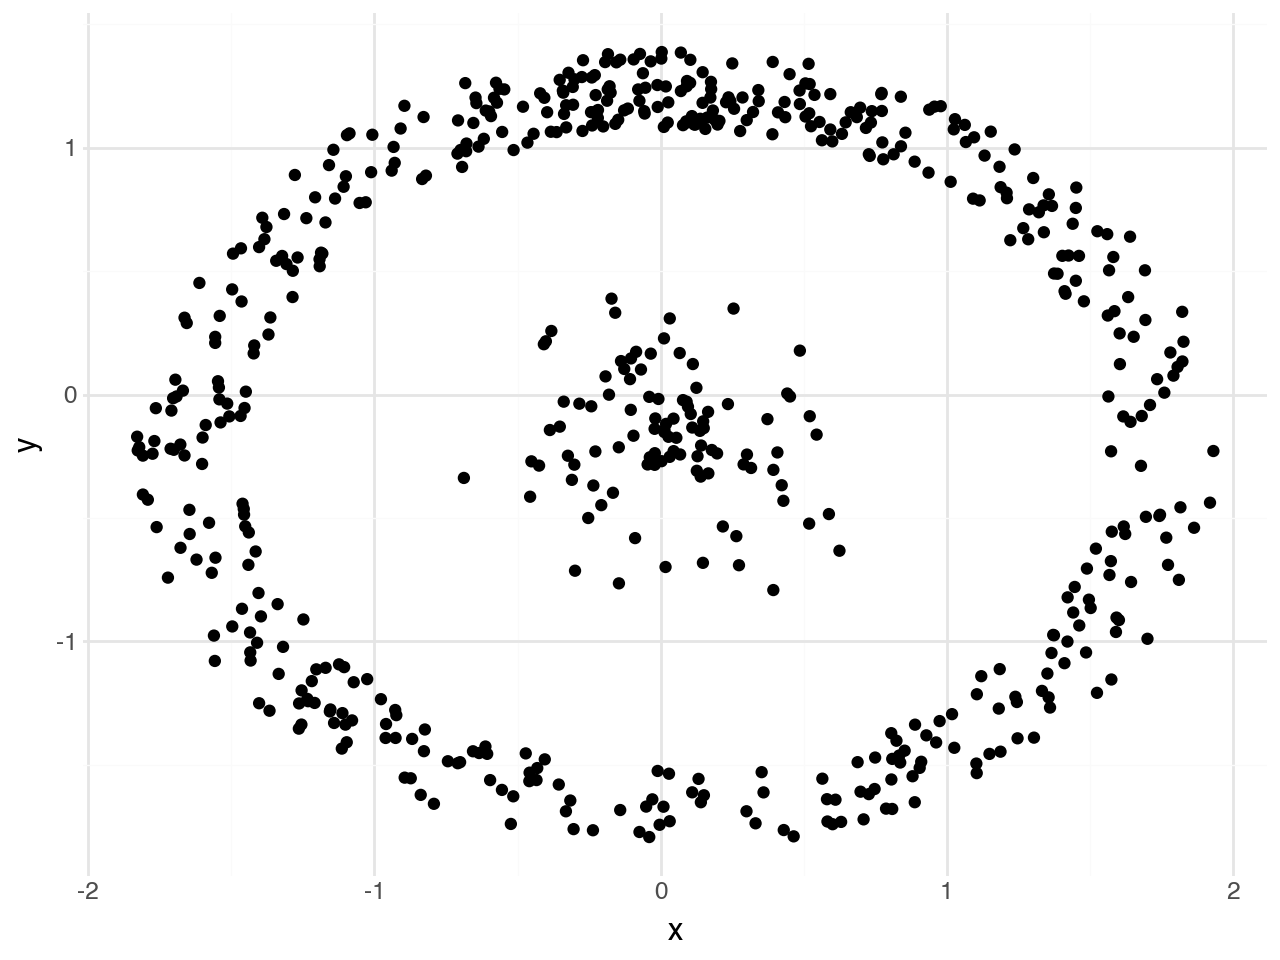

In [94]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

z = StandardScaler()
d4[["x","y"]] = z.fit_transform(d4)

ggplot(d4, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

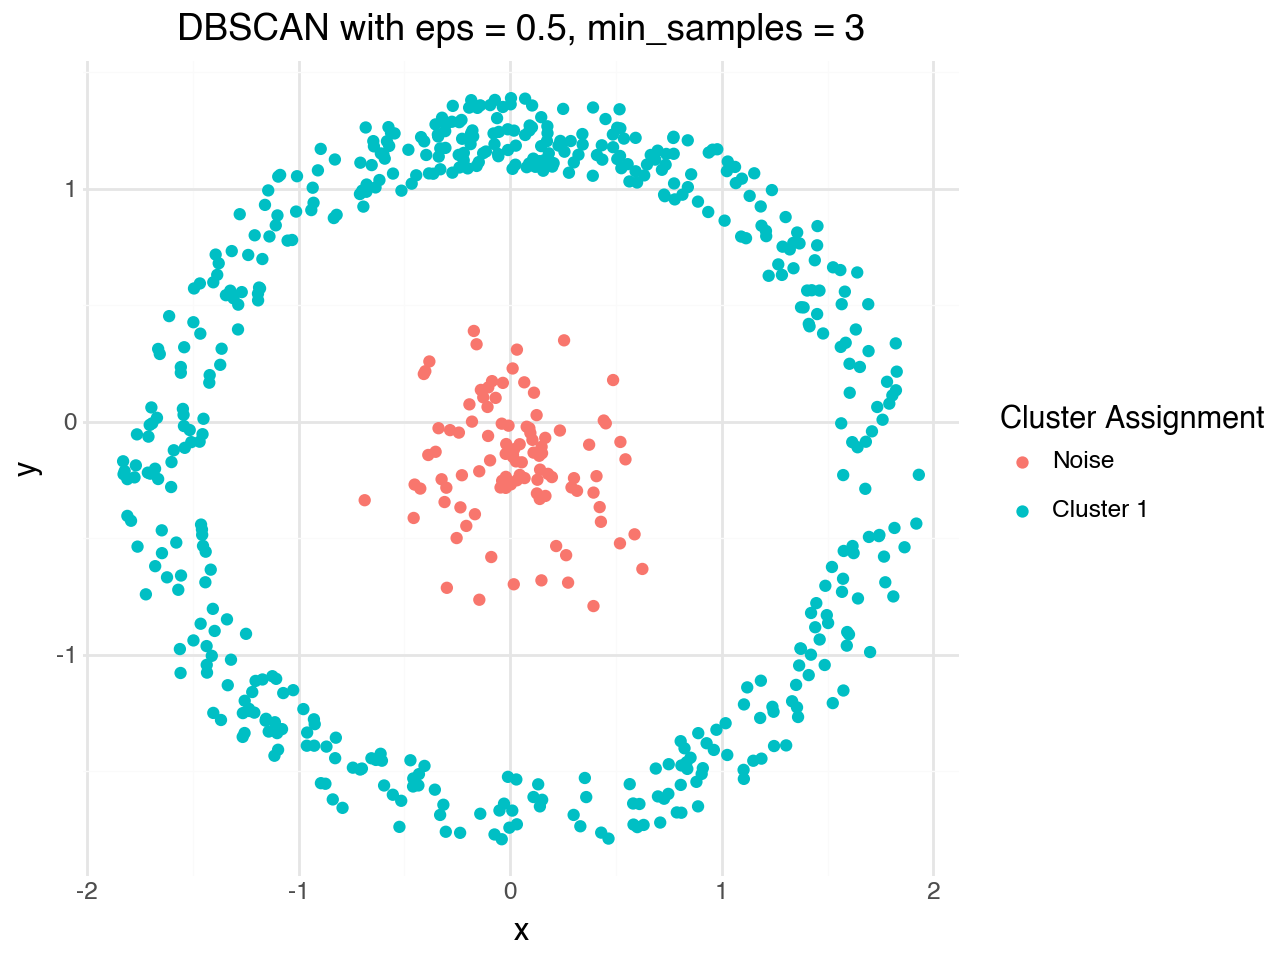

In [95]:
db4 = DBSCAN(eps = 0.5, min_samples = 3).fit(d4)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db4.labels_)))]

d4["assignments"] = db4.labels_

(ggplot(d4, aes(x = "x", y = "y", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 3"))

In [96]:
# grab only clustered data points
d4_clustered = d4.loc[(d4.assignments >= 0)]

print(silhouette_score(d4_clustered[["x","y"]], d4_clustered["assignments"]))

# overall
print(silhouette_score(d4[["x","y"]], d4["assignments"]))

-0.042911477754913246
-0.042911477754913246


### Compare

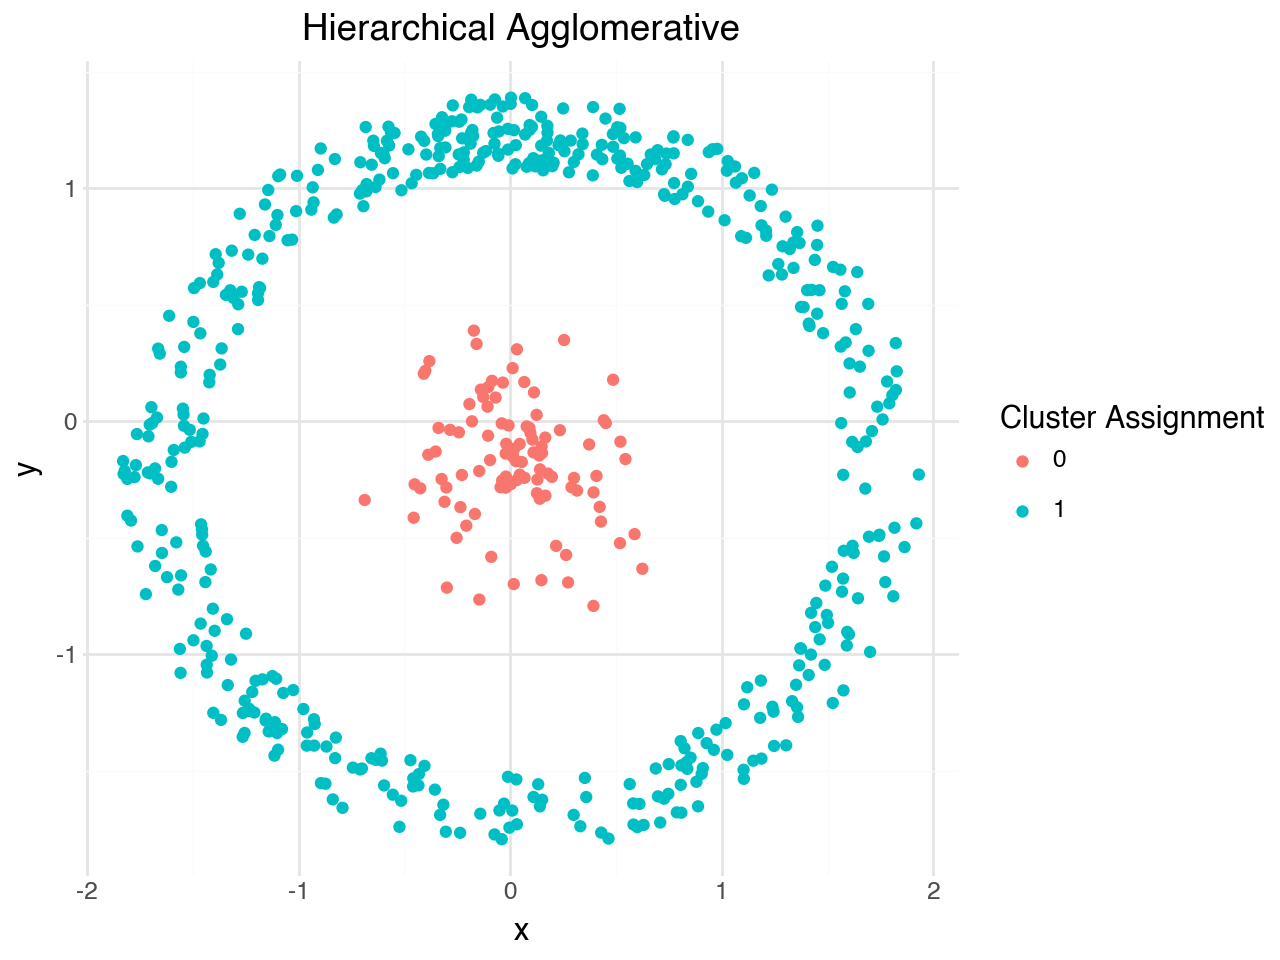

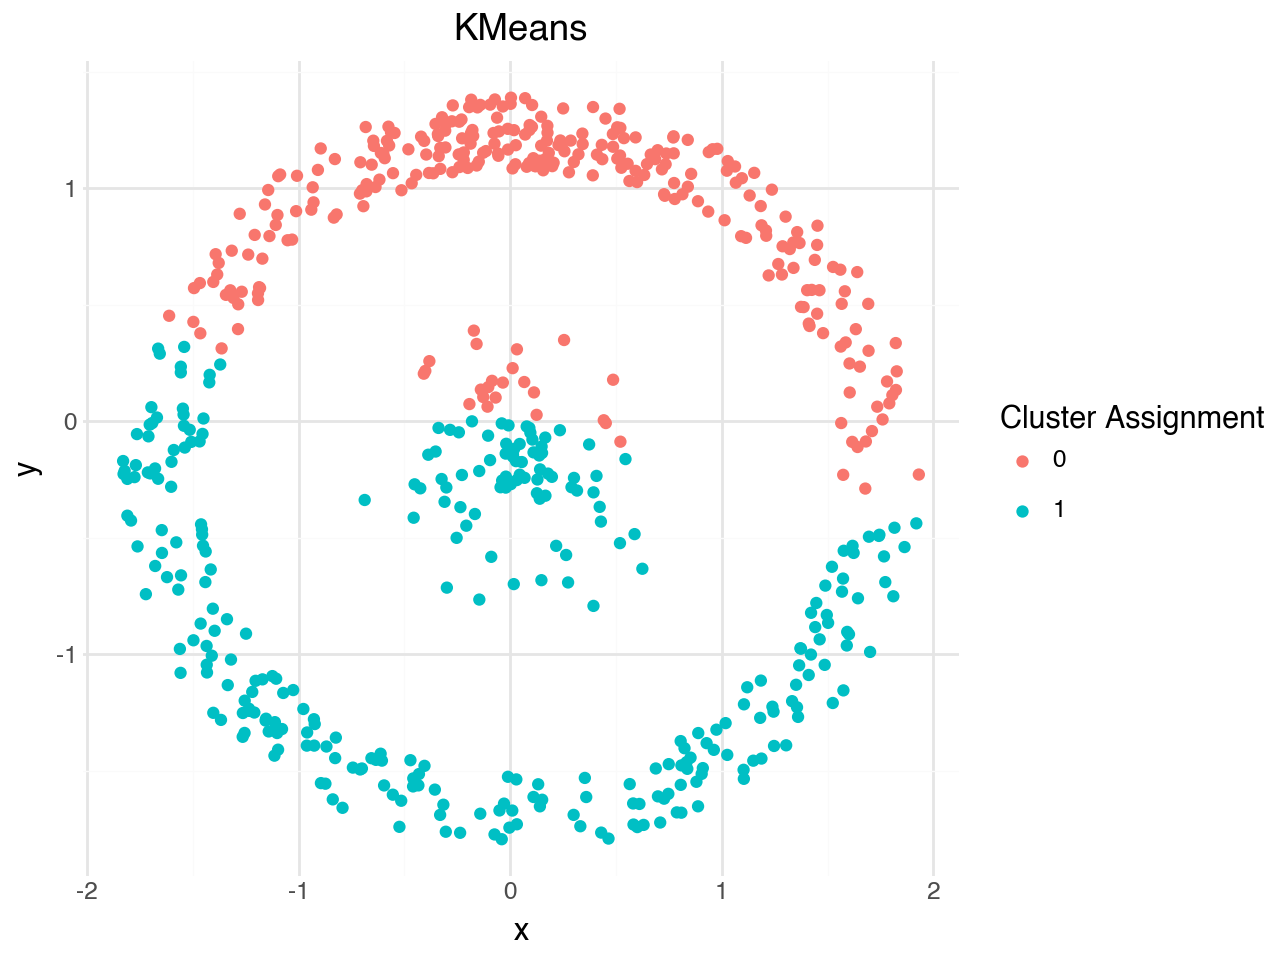

In [97]:
from sklearn.cluster import AgglomerativeClustering, KMeans

from plotnine import ggplot, aes, geom_point, theme_minimal, scale_color_discrete, theme, element_blank, labs

link = ['ward', 'complete', 'average', 'single']

hac = AgglomerativeClustering(n_clusters=2, linkage=link[3])
km = KMeans(n_clusters=2, n_init=10)


hac.fit(d4[["x", "y"]])
km.fit(d4[["x", "y"]])



d4["hac"] = hac.labels_
d4["km"] = km.labels_



p1 = (
    ggplot(d4, aes(x="x", y="y", color="factor(hac)"))
    + geom_point()
    + theme_minimal()
    + scale_color_discrete(name="Cluster Assignment")
    + labs(title="Hierarchical Agglomerative")
)


p2 = (
    ggplot(d4, aes(x="x", y="y", color="factor(km)"))
    + geom_point()
    + theme_minimal()
    + scale_color_discrete(name="Cluster Assignment")
    + labs(title="KMeans")
)





display(p1)
display(p2)



## Dataset 5

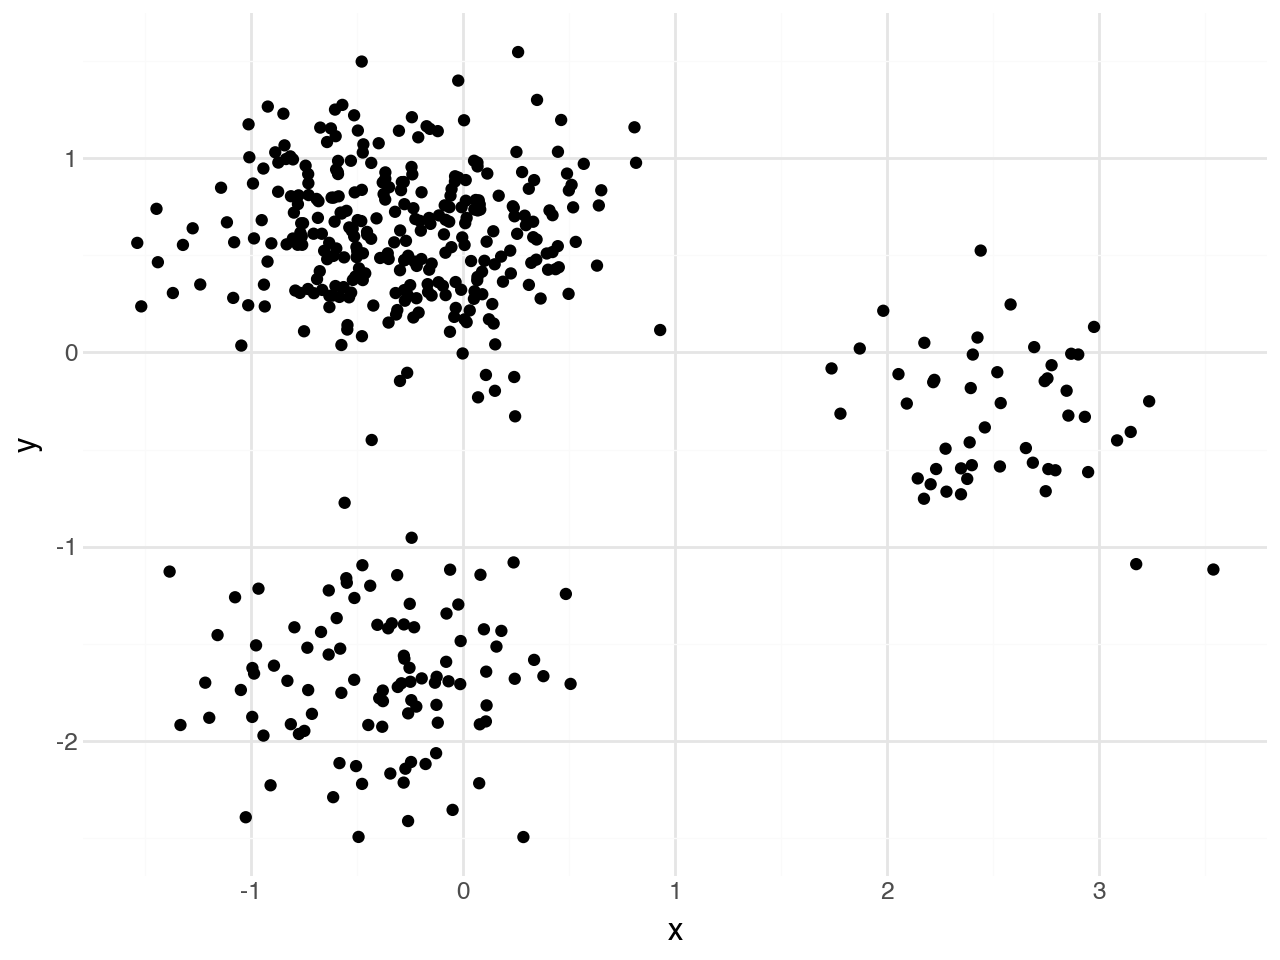

In [98]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

z = StandardScaler()
d5[["x","y"]] = z.fit_transform(d5)

ggplot(d5, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

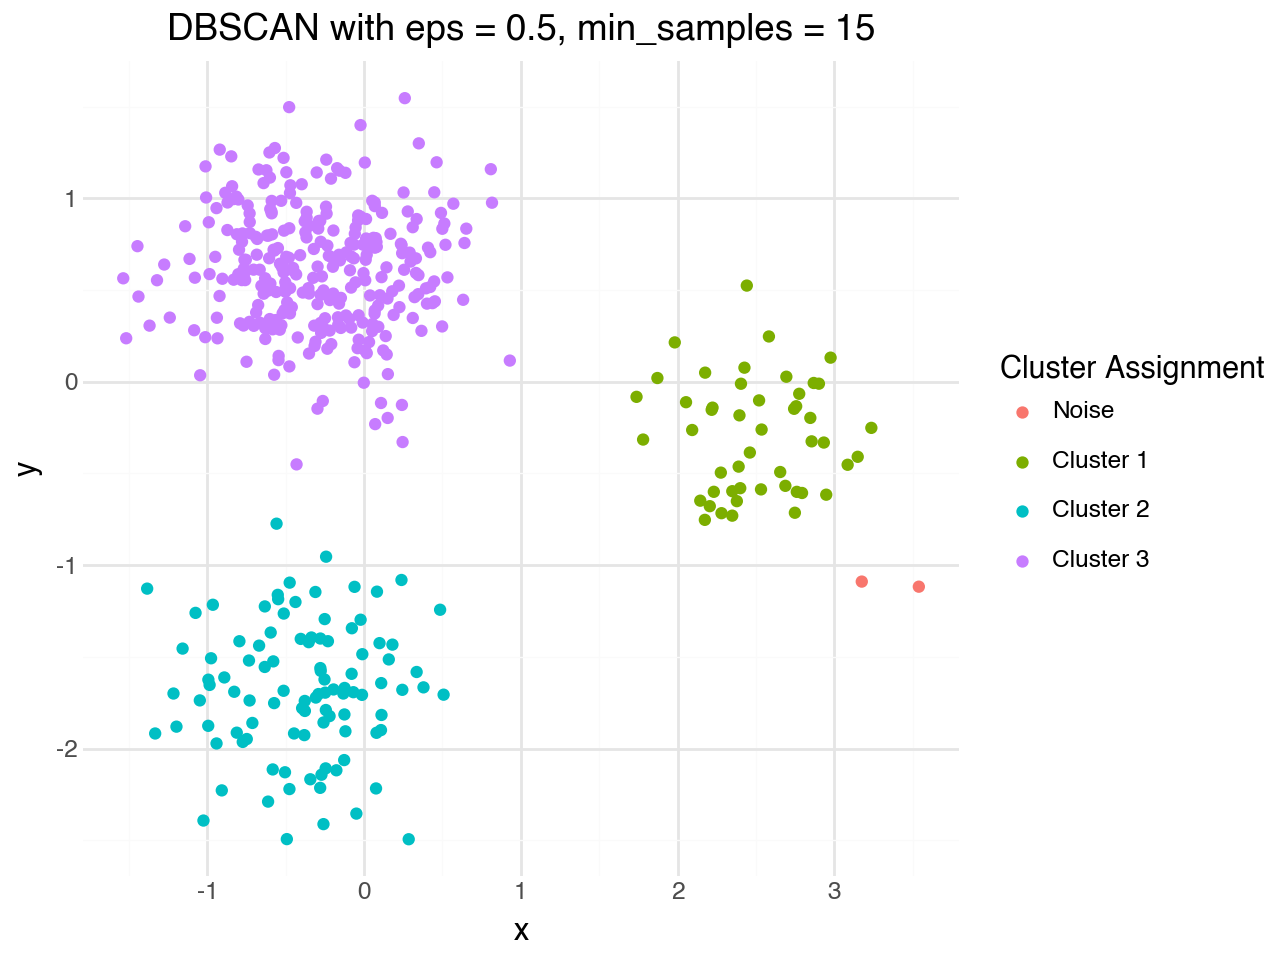

In [99]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

d5["assignments"] = db5.labels_

(ggplot(d5, aes(x = "x", y = "y", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
labs(title = "DBSCAN with eps = 0.5, min_samples = 15"))

In [100]:
# grab only clustered data points
d5_clustered = d5.loc[(d5.assignments >= 0)]

print(silhouette_score(d5_clustered[["x","y"]], d5_clustered["assignments"]))

# overall
print(silhouette_score(d5[["x","y"]], d5["assignments"]))

0.7048131054311416
0.6714107830551044


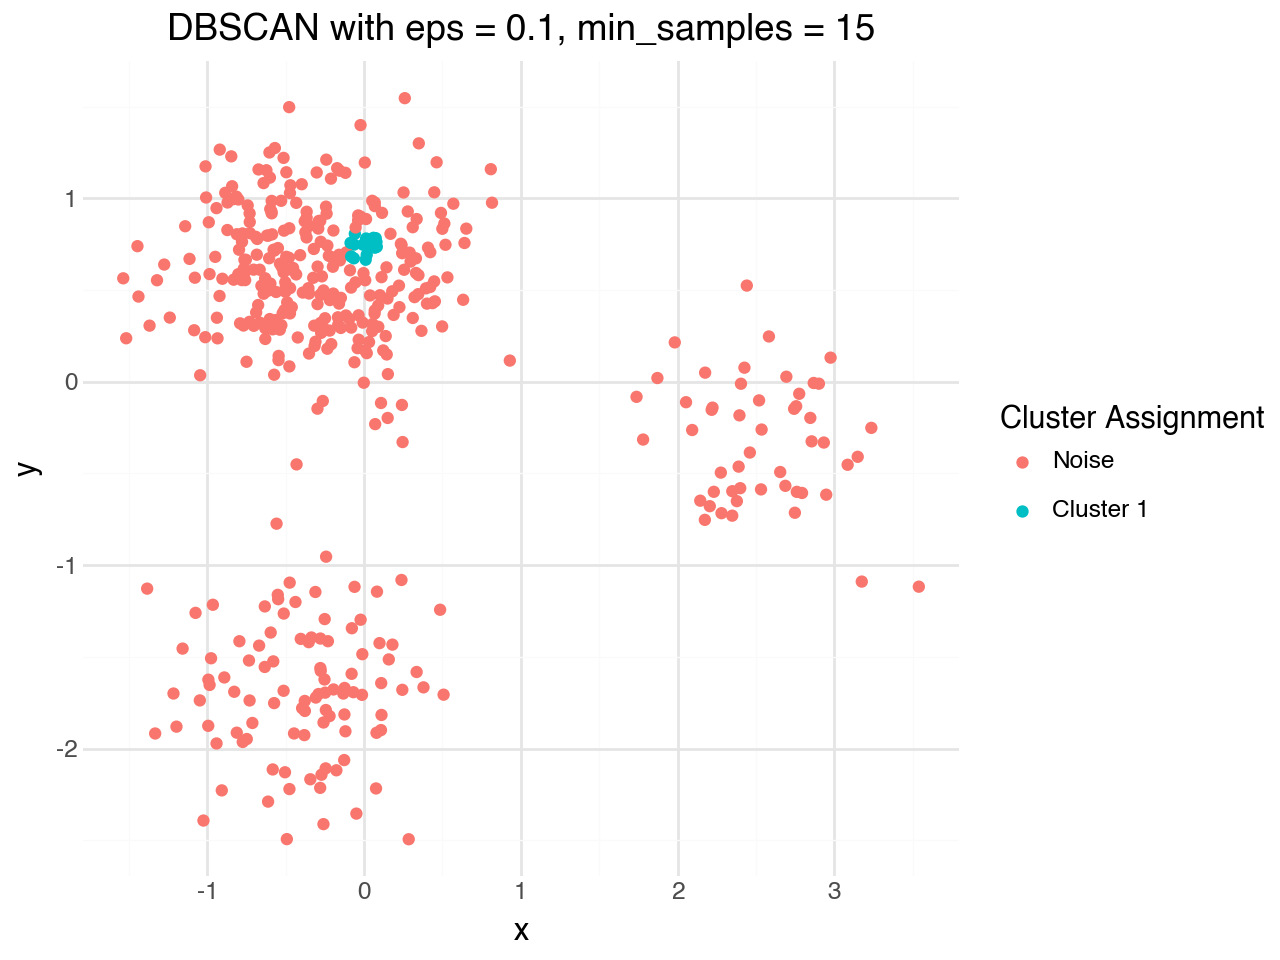

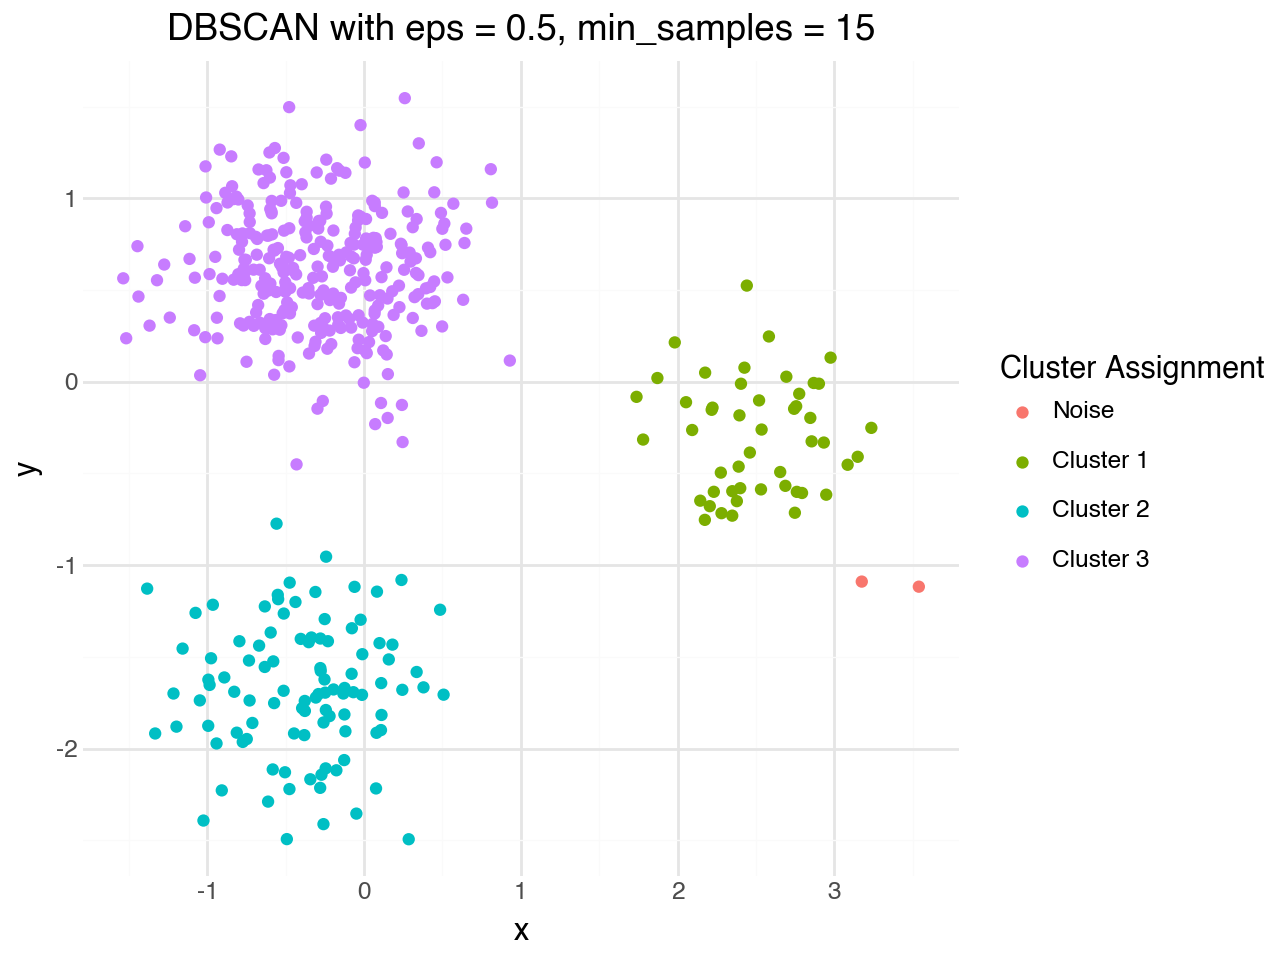

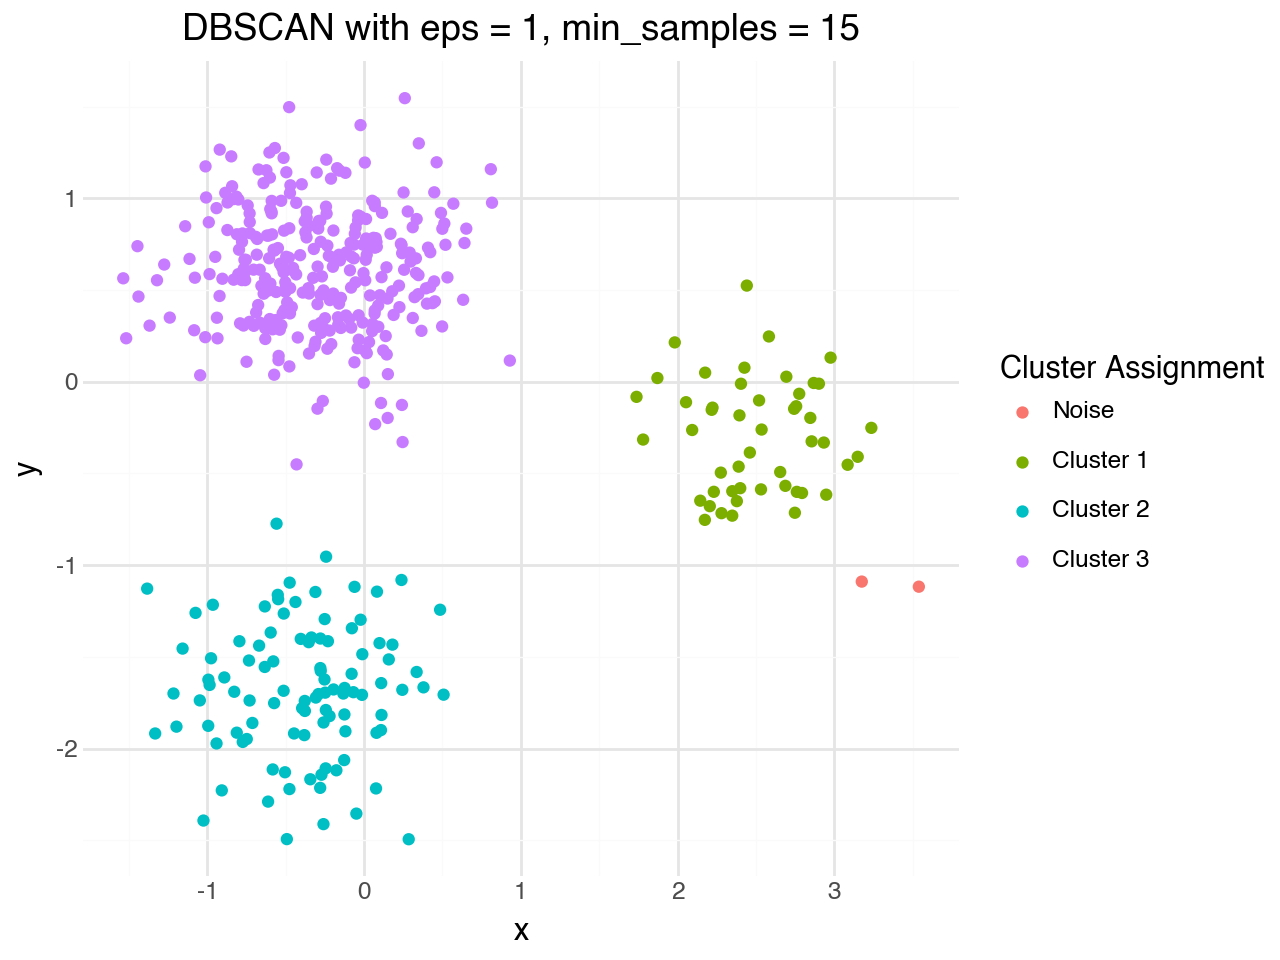

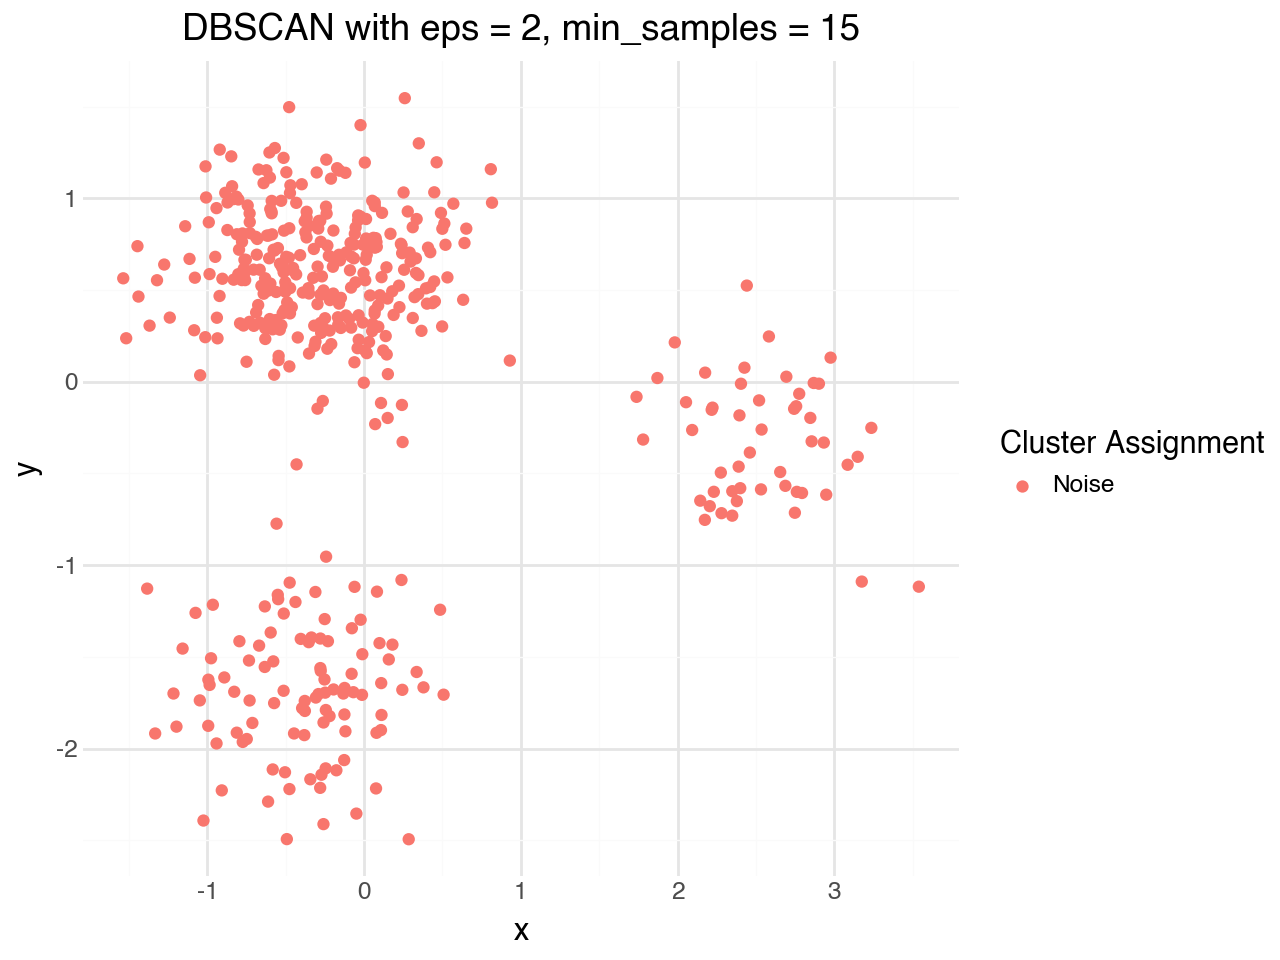

In [108]:
for ep in eps:
    db5 = DBSCAN(eps = ep, min_samples = 15).fit(d5)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

    plot_df = d5.copy()
    plot_df["assignments"] = db5.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = {ep}, min_samples = 15"))

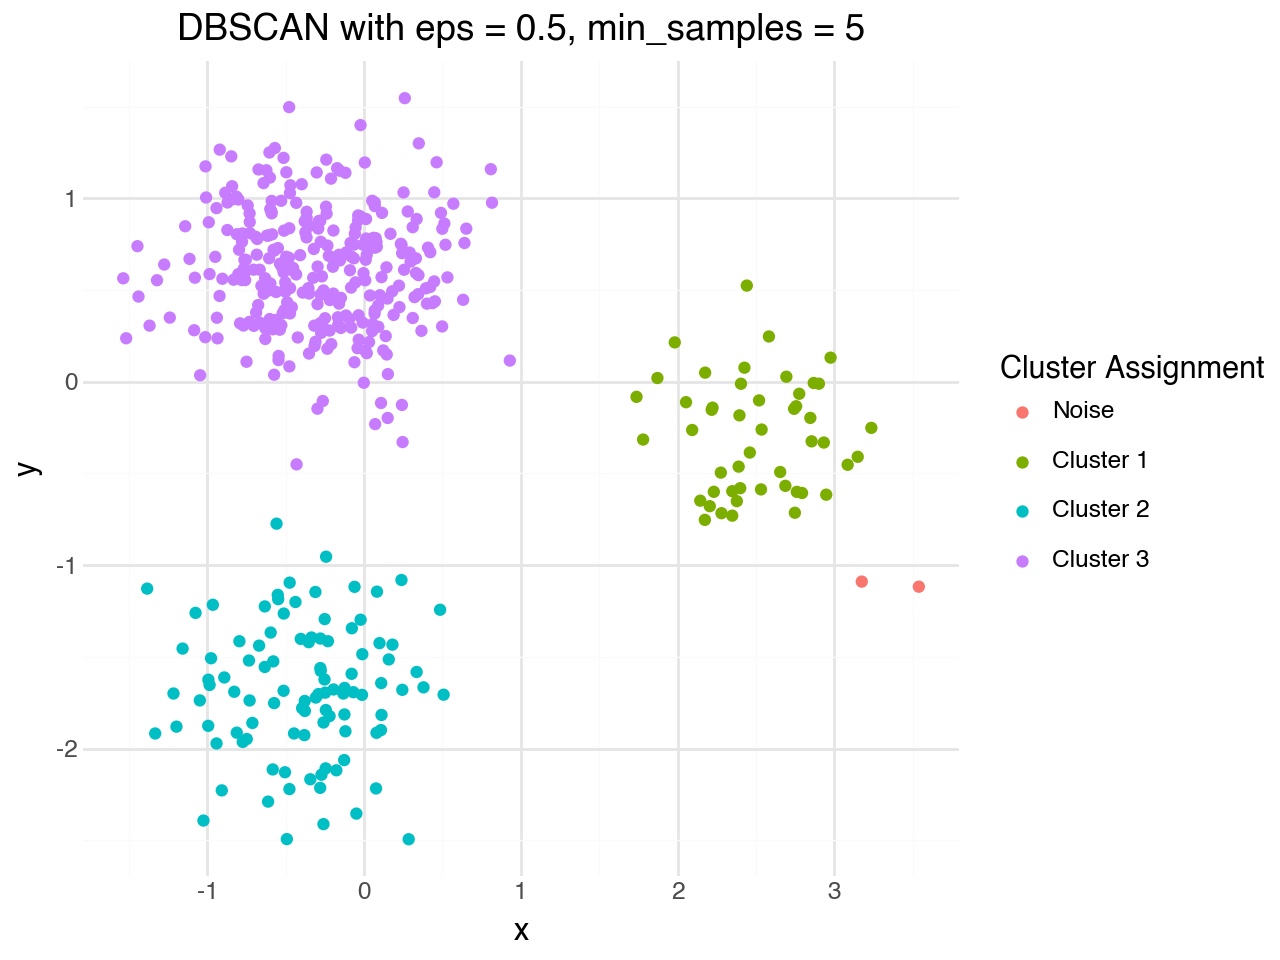

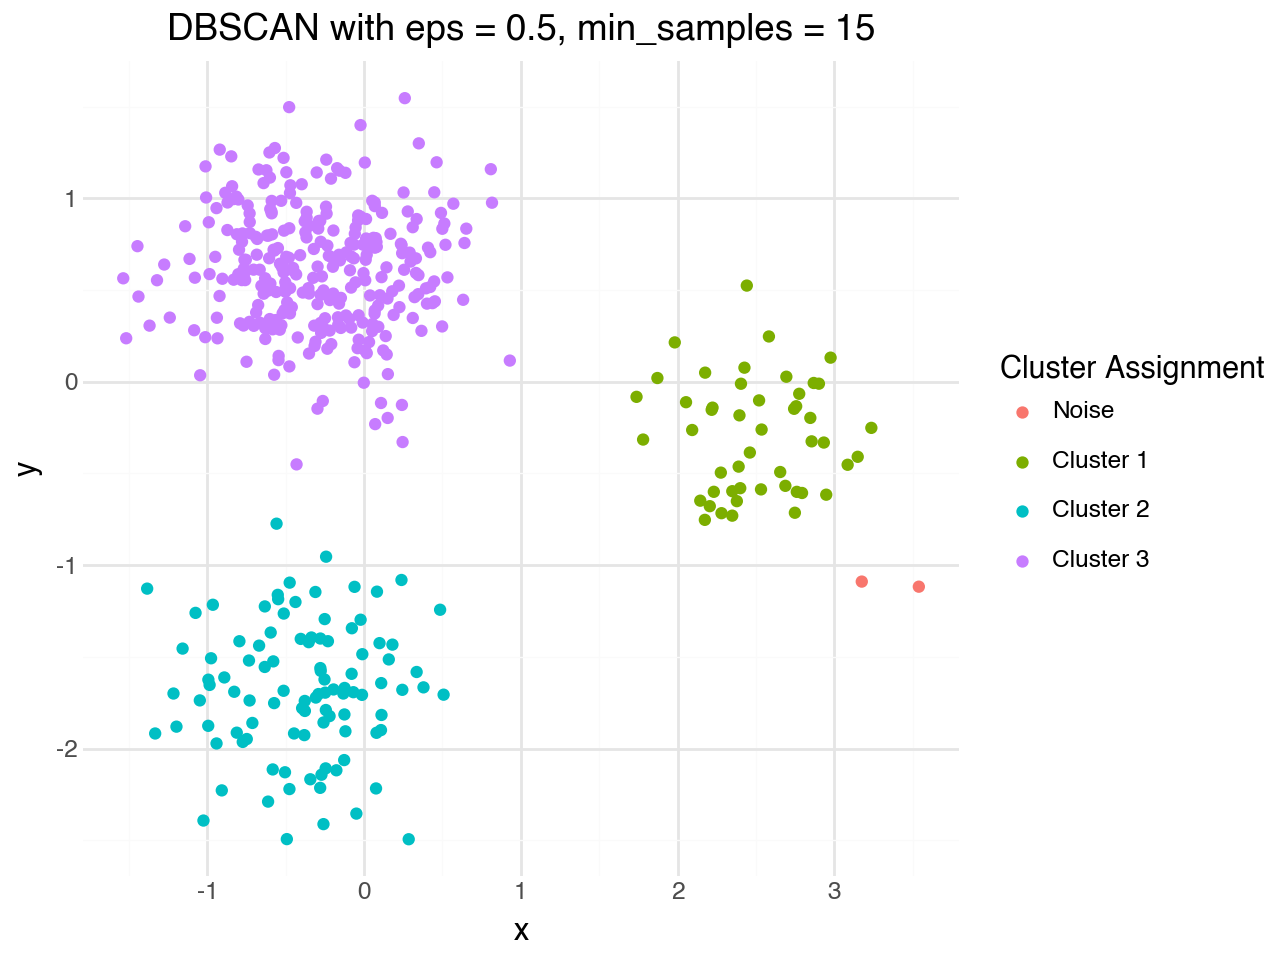

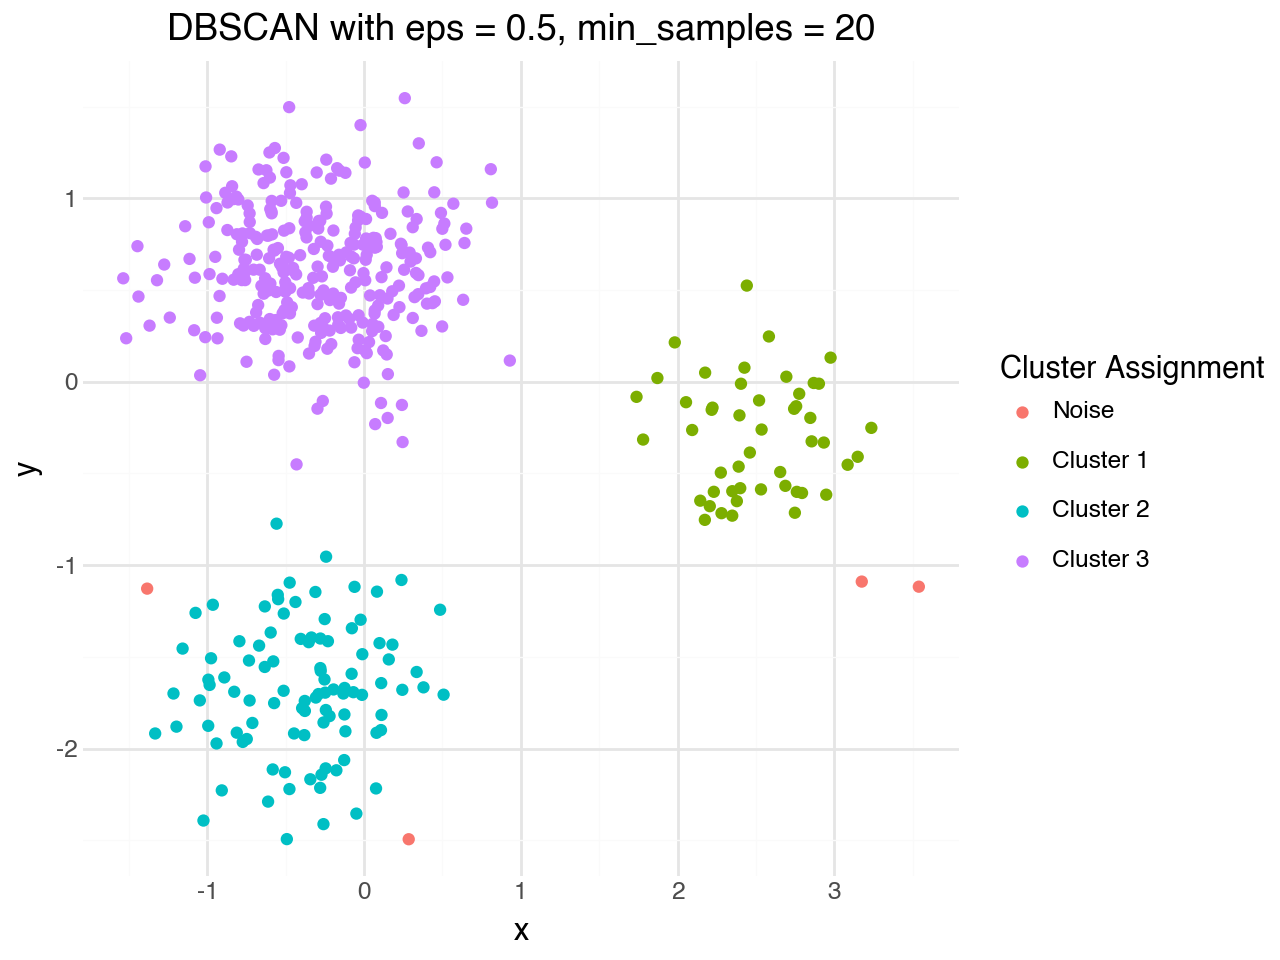

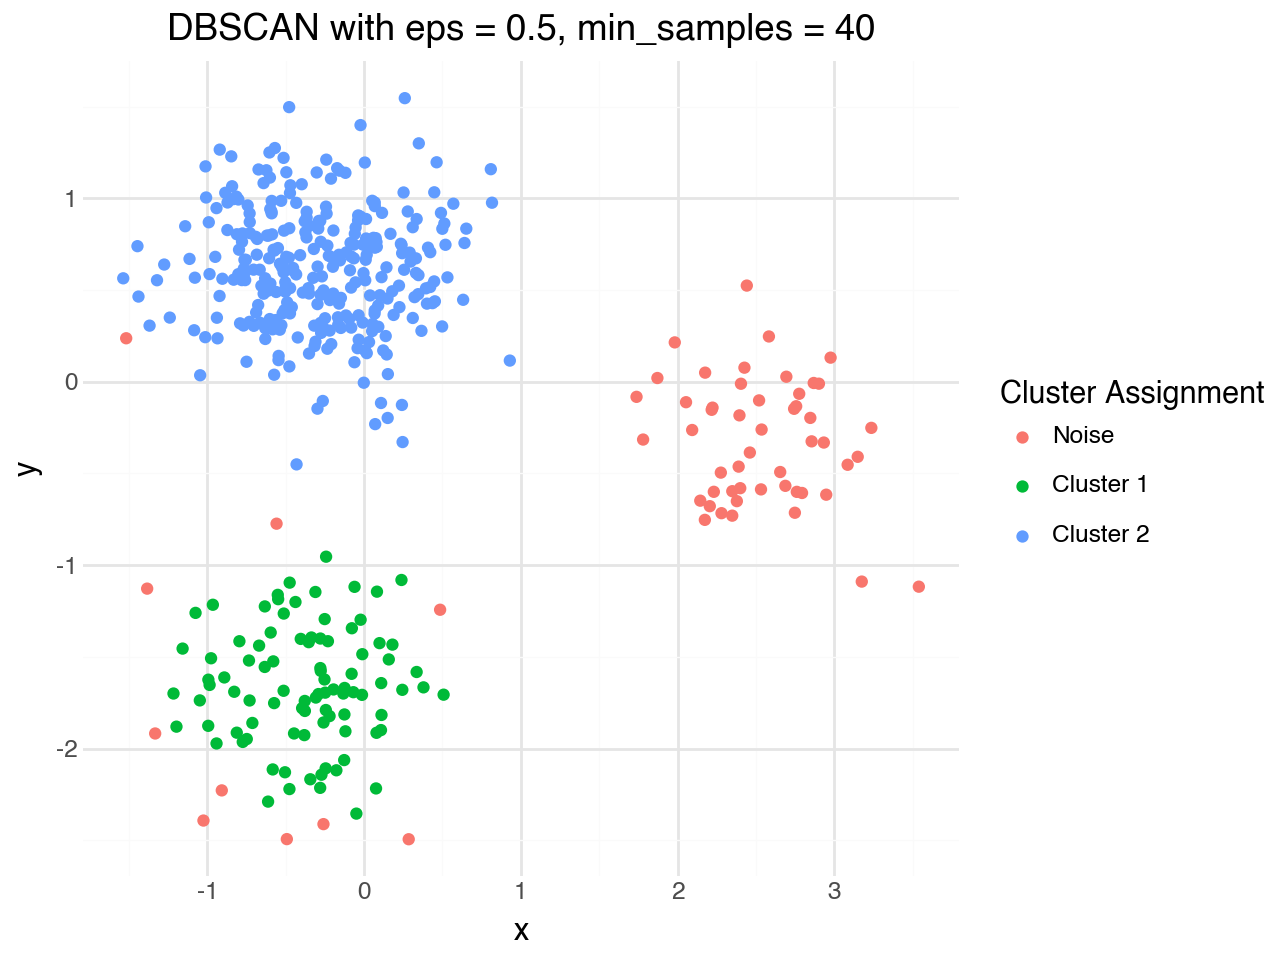

In [111]:
min_samples = [5, 15, 20, 40]

for sample in min_samples:
    db5 = DBSCAN(eps = 0.5, min_samples = sample).fit(d5)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db5.labels_)))]

    plot_df = d5.copy()
    plot_df["assignments"] = db5.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = 0.5, min_samples = {sample}"))

# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

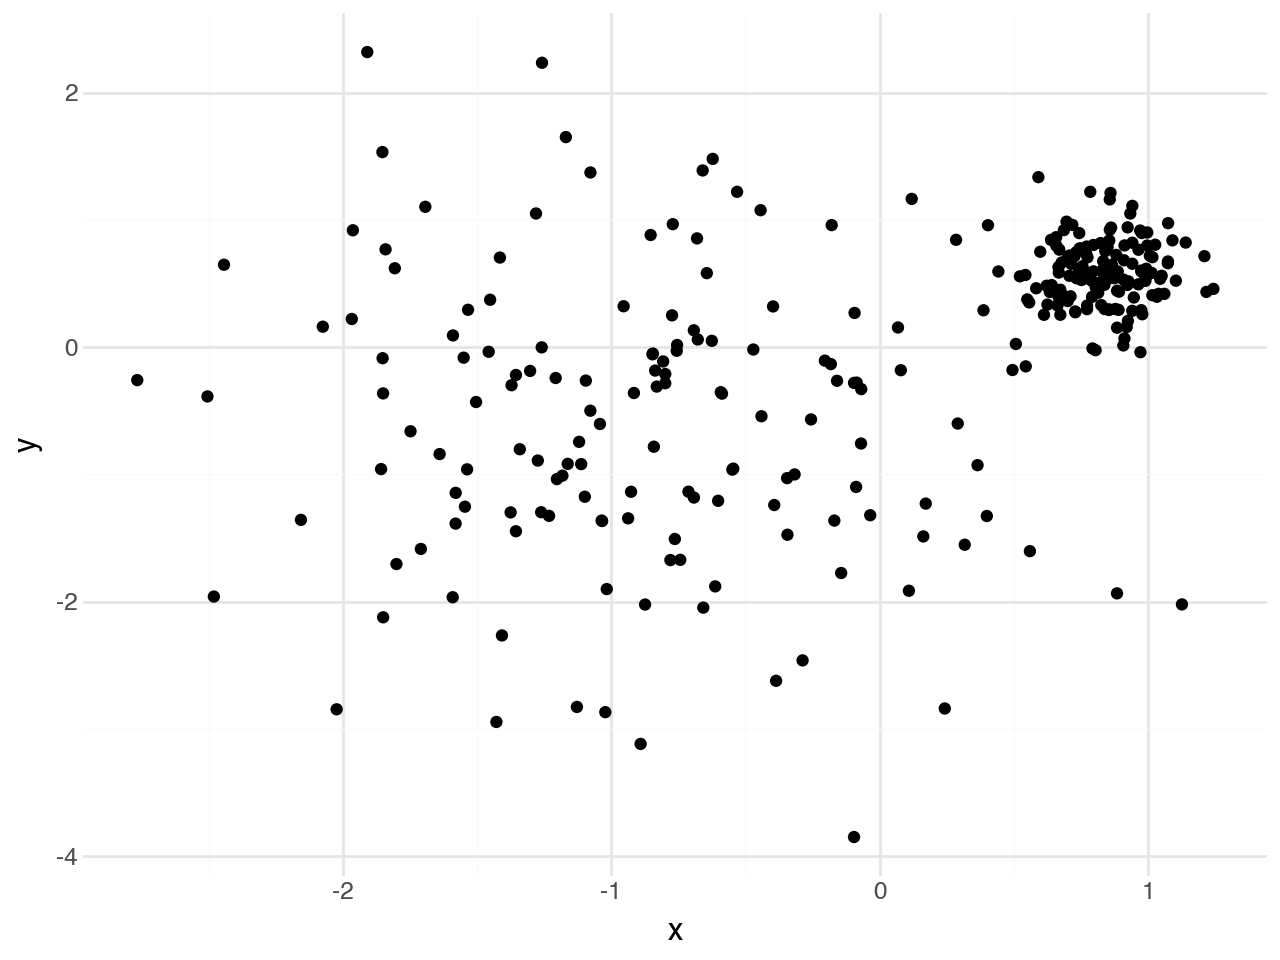

In [101]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")

z = StandardScaler()
d6[["x","y"]] = z.fit_transform(d6)

ggplot(d6, aes(x = "x", y = "y")) + geom_point() + theme_minimal()

In [116]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(n_neighbors=mins + 1)

nn.fit(d6)

distances, neighbors = nn.kneighbors(d6)

distances

array([[0.        , 0.03690981, 0.04037236, 0.04597748],
       [0.        , 0.05516926, 0.08888159, 0.08986399],
       [0.        , 0.01648388, 0.02195778, 0.02314588],
       ...,
       [0.        , 0.06869733, 0.07309685, 0.07758794],
       [0.        , 0.45863691, 0.62402991, 0.6937056 ],
       [0.        , 0.3352202 , 0.35858311, 0.4012105 ]], shape=(300, 4))

In [117]:
# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

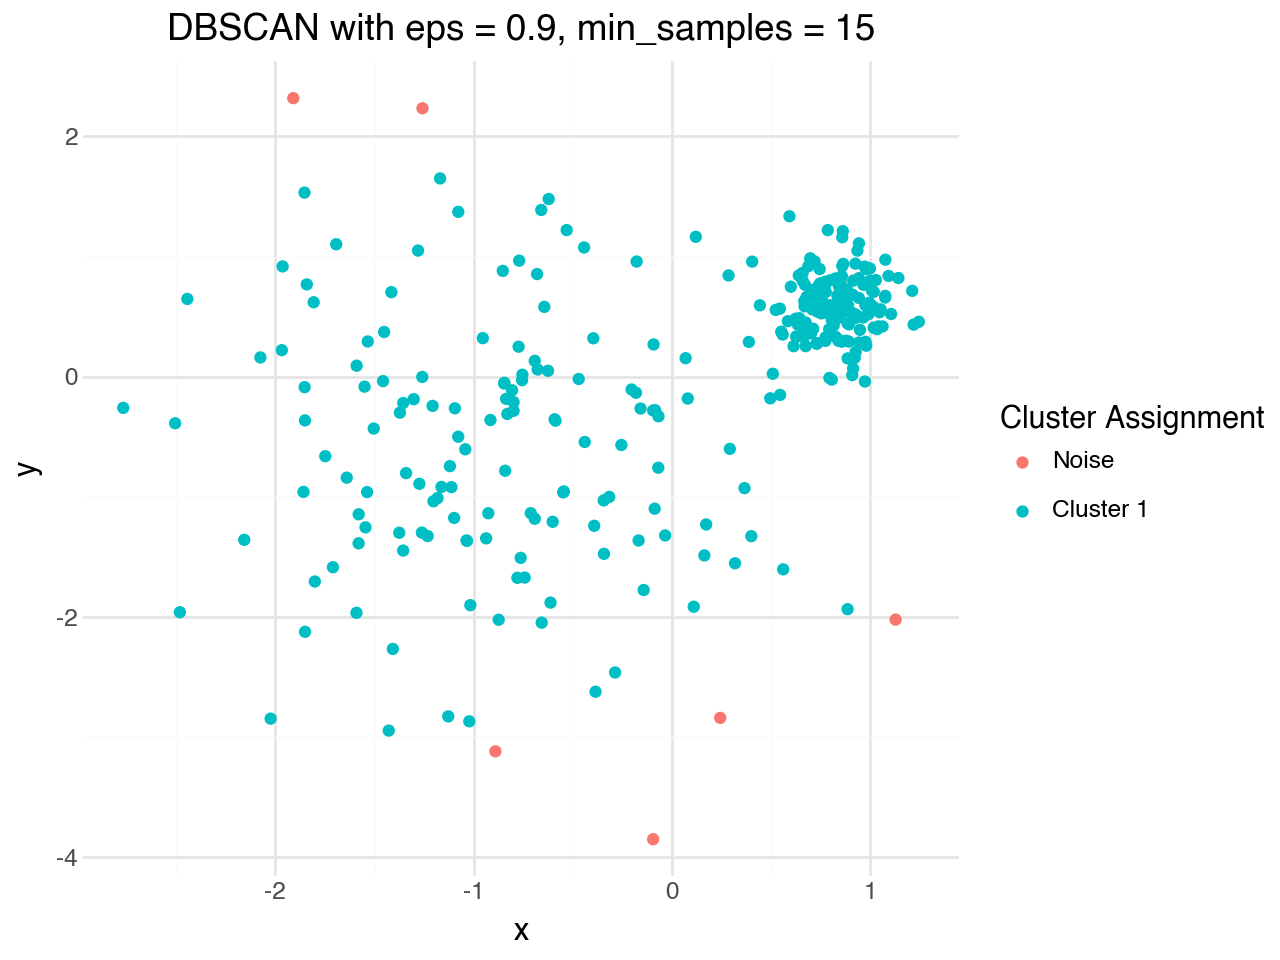

In [118]:
db6 = DBSCAN(eps = 0.9, min_samples = 15).fit(d6)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

d6["assignments"] = db6.labels_

(ggplot(d6, aes(x = "x", y = "y", color = "factor(assignments)")) +
geom_point() +
theme_minimal() +
scale_color_discrete(name = "Cluster Assignment",
                    labels = labsList) +
labs(title = "DBSCAN with eps = 0.9, min_samples = 15"))

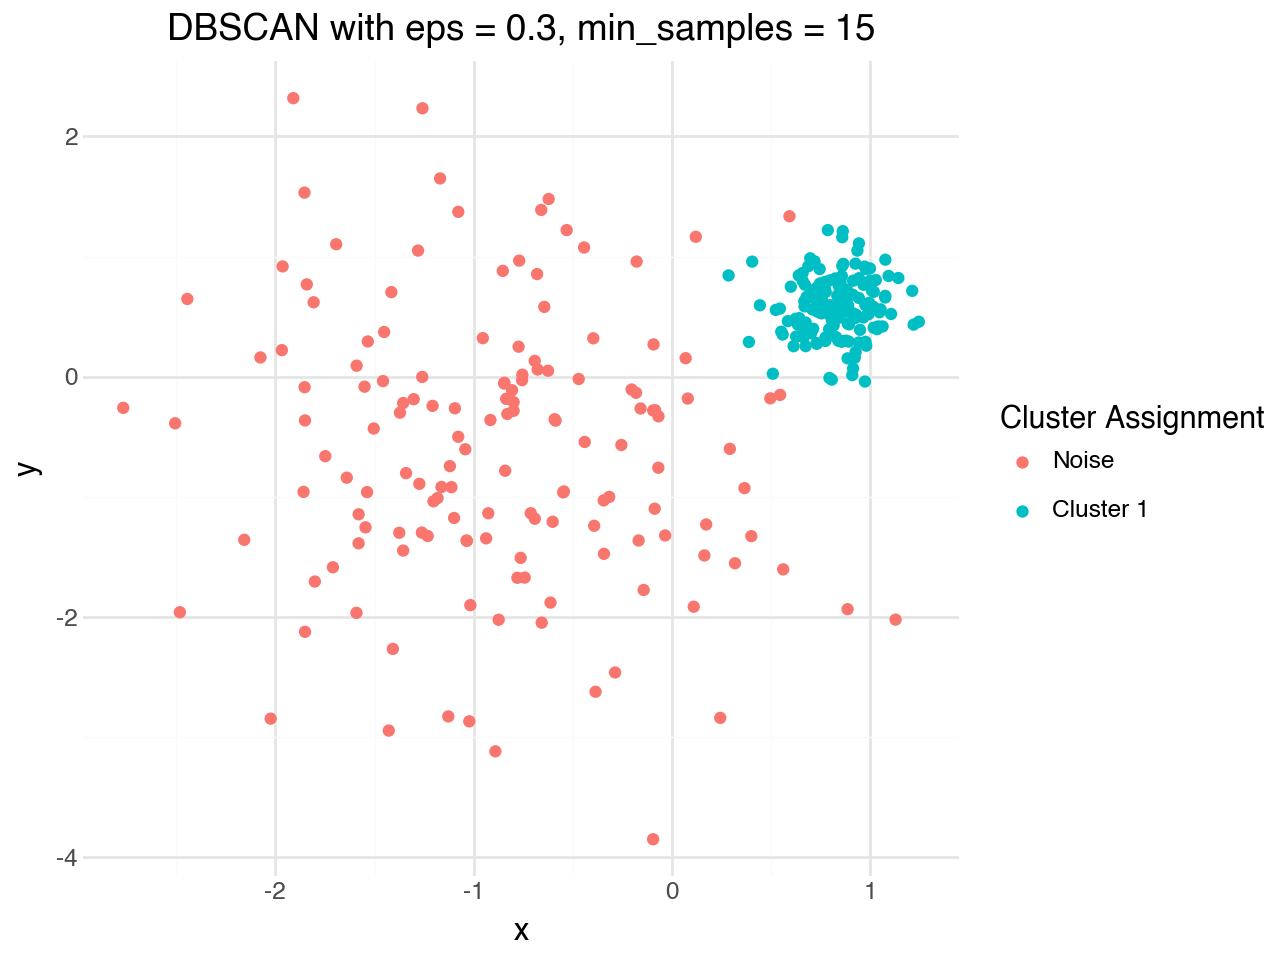

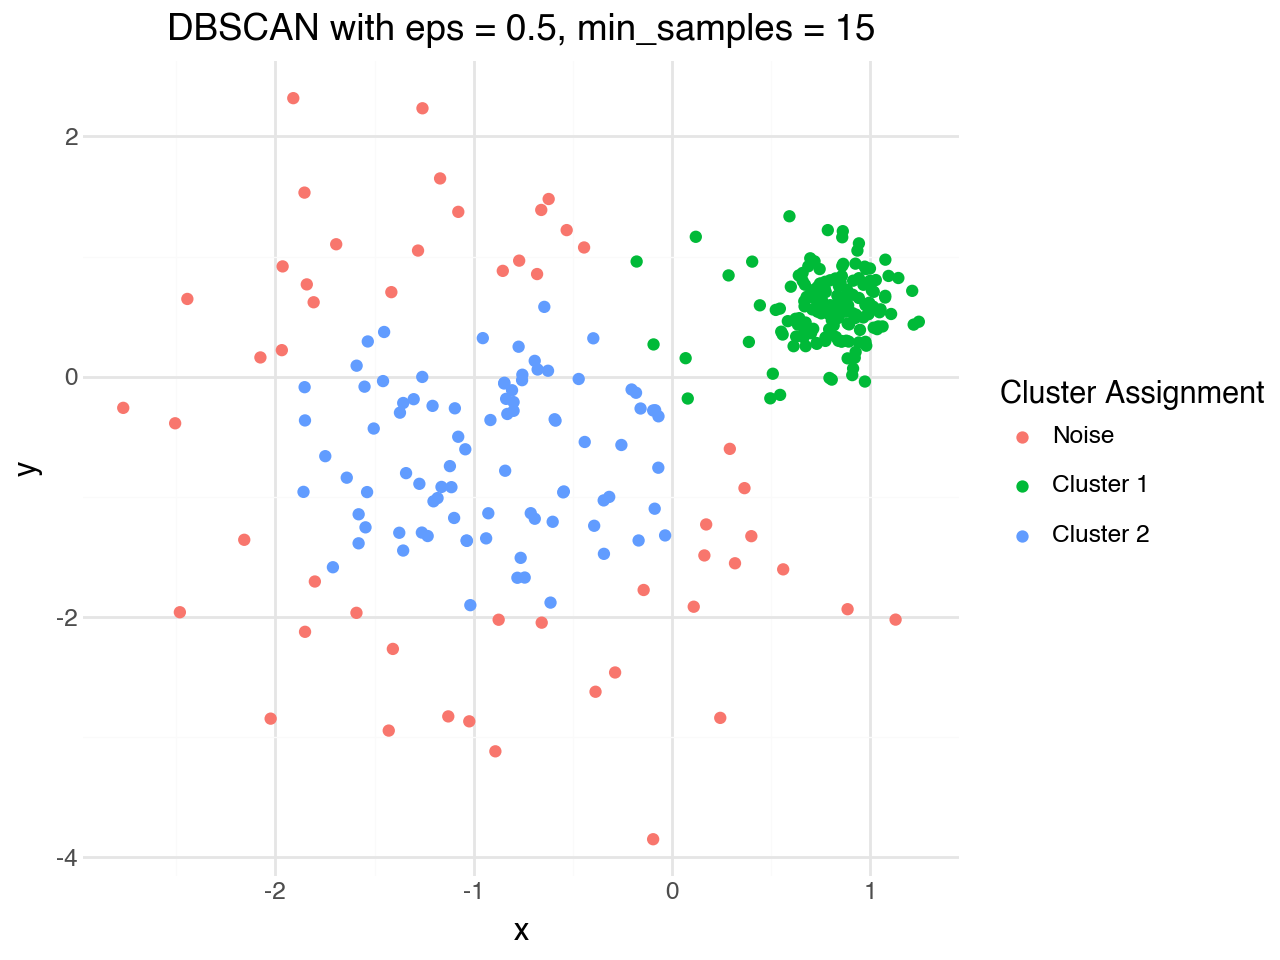

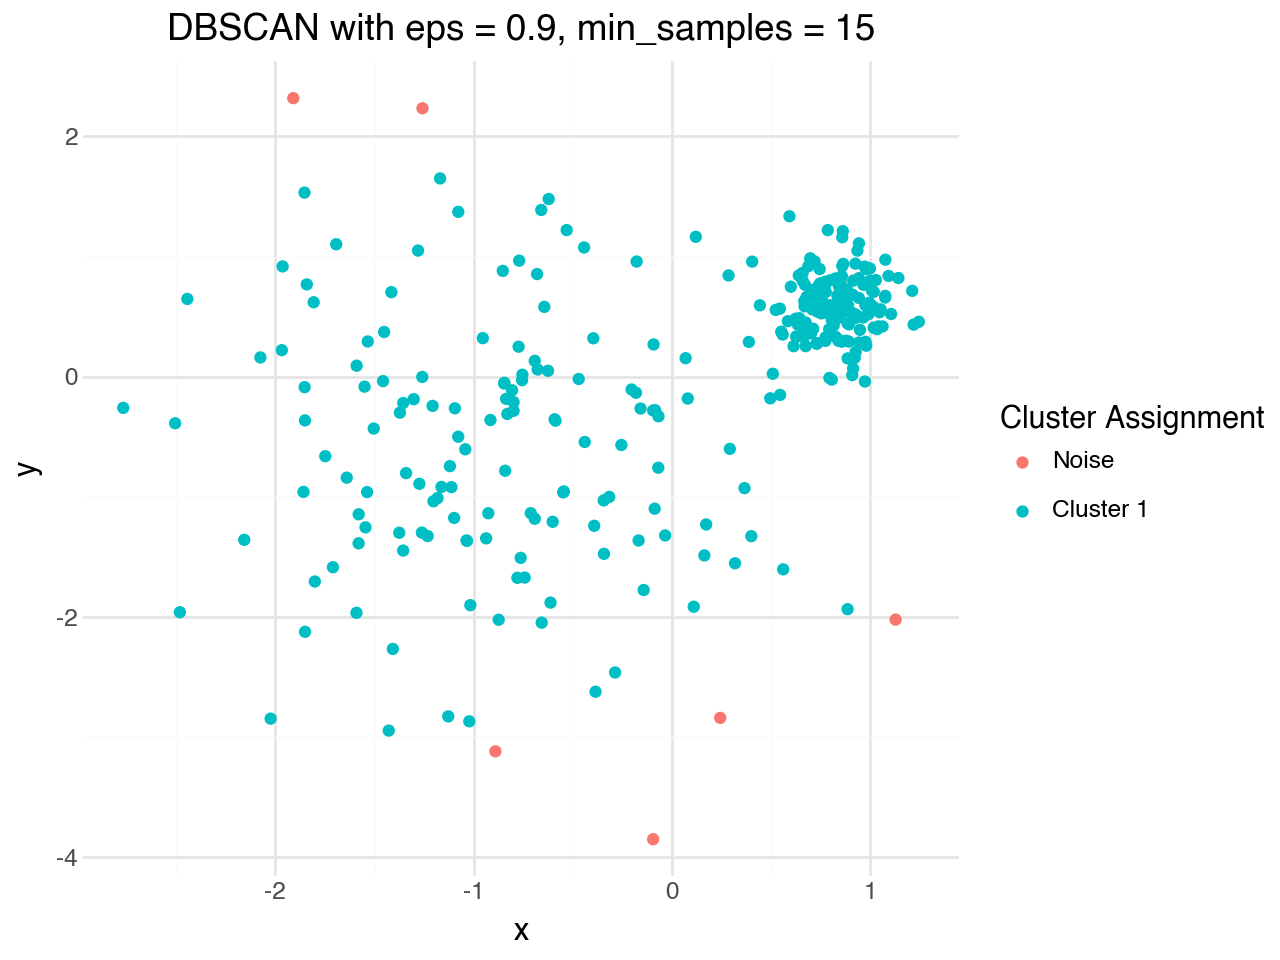

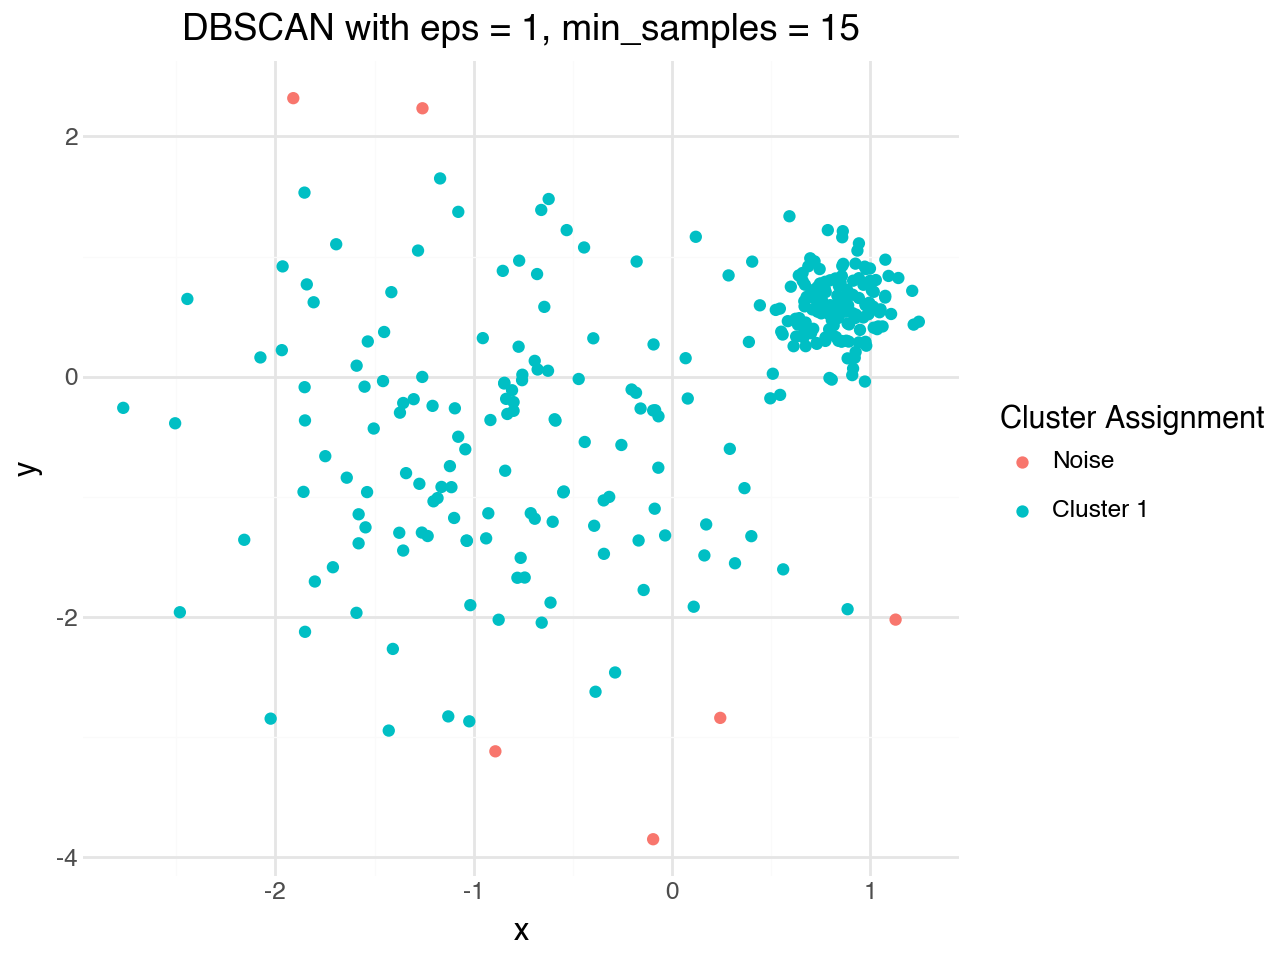

In [125]:
eps = [0.3, 0.5, 0.9, 1]

for ep in eps:
    db6 = DBSCAN(eps = ep, min_samples = 15).fit(d6)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

    plot_df = d6.copy()
    plot_df["assignments"] = db6.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = {ep}, min_samples = 15"))

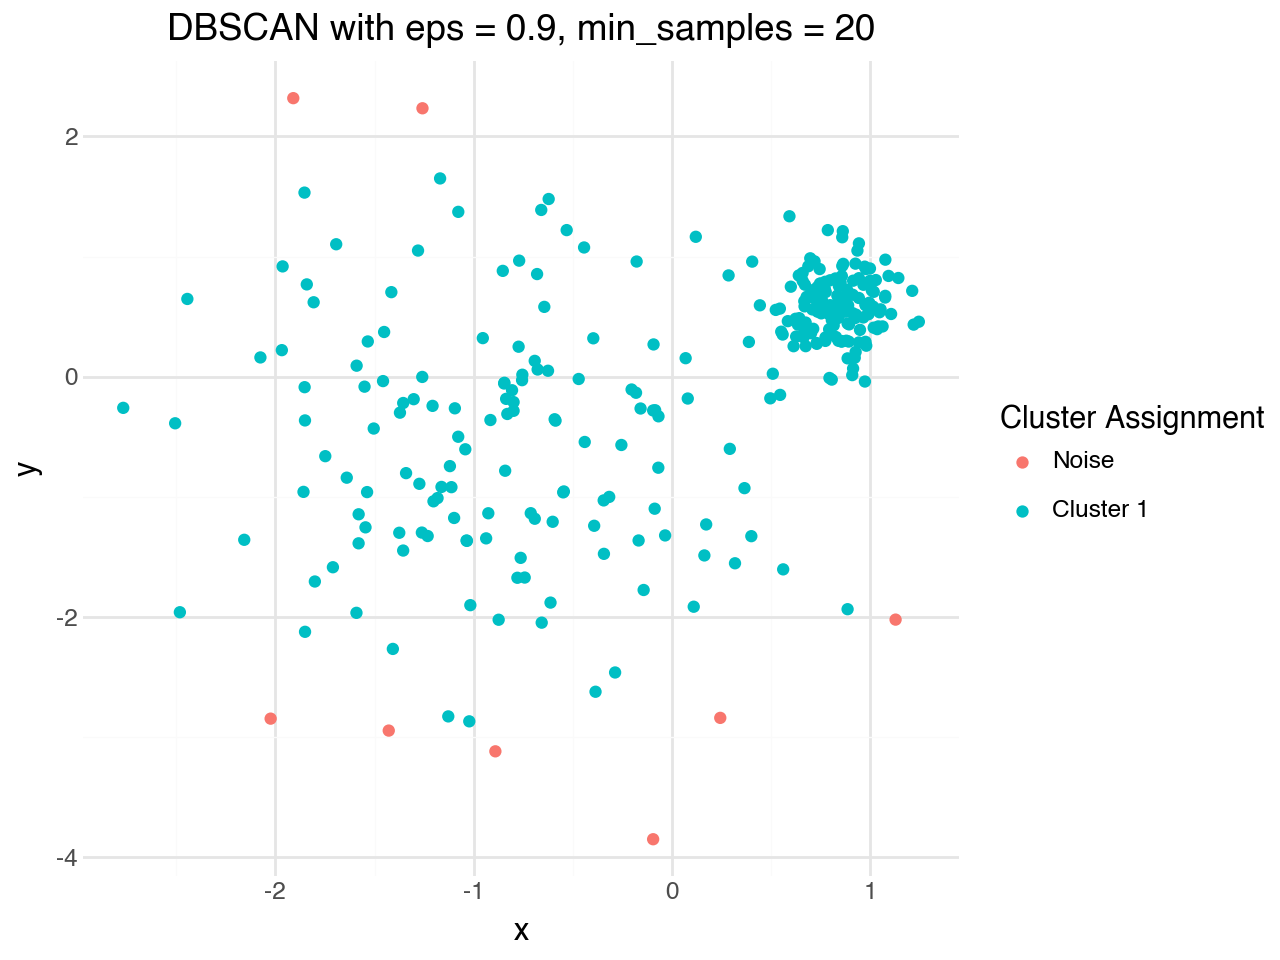

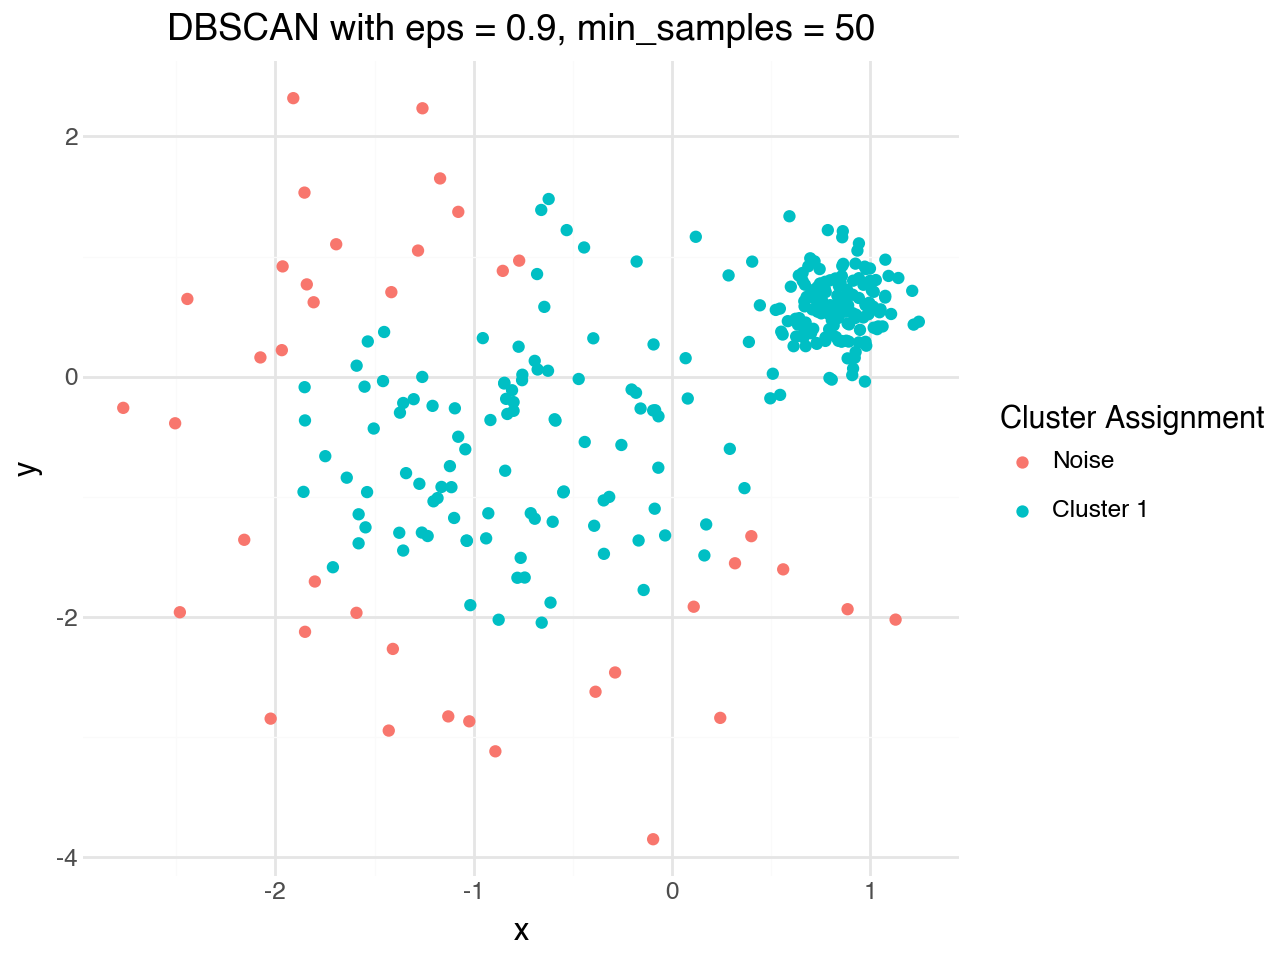

In [124]:
min_samples = [ 20, 50]

for sample in min_samples:

    db6 = DBSCAN(eps = 0.9, min_samples = sample).fit(d6)

    labsList = ["Noise"]
    labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db6.labels_)))]

    plot_df = d6.copy()
    plot_df["assignments"] = db6.labels_

    display(ggplot(plot_df, aes(x = "x", y = "y", color = "factor(assignments)")) +
    geom_point() +
    theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
    labs(title = f"DBSCAN with eps = 0.9, min_samples = {sample}"))